# Model Procedure

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1) Train part for the model
## It's a necessary part for using these pre-trained model to different spieces

In this part, you can train model to match your dataset.<br /> For example, the pre-trained model is based on the human brain, if you want to use it on mice brains,
 you should train it using your own dataset

### Part 1: import necessary packages

In [ ]:
!pip install nilearn
!pip install SimpleITK

     |████████████████████████████████| 10.1 MB 4.1 MB/s 
     |████████████████████████████████| 48.4 MB 1.7 MB/s 


In [ ]:
import os, sys, pickle
sys.path.append('/content/drive/MyDrive/UNet_Model')
from arguments import Args, Args_test
from orientation import orientation
from Train import Train
from Test import Test
import numpy as np
import nilearn as nil
import nibabel as nib
from nilearn import plotting
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Part 2: set the parameters we need

#### The followings are the parameters we can set:
|Parameters|Meaning|Default value|Whether the input is required|
| :----: | :------: | :----: | :----:|
|train_t1w|Train T1w Directory|None|Yes|
|train_msk|Train Mask Directory|None|Yes|
|out_dir|Output Directory|None|Yes|
|validate_t1w|Validation T1w Directory|None|Yes|
|validate_msk|Validation Mask Directory|None|Yes|
|init_model|Initial Model Directory or Filename|None|Yes|
|conv_block|Num of UNet Blocks|5|Optional|
|input_slice|Num of Slices for Model Input|3|Optional|
|kernel_root|Num of the Root of Kernel|16|Optional|
|rescale_dim|Dimension to Rescale|256|Optional|
|num_epoch|Num of Epoch|40|Optional|
|learning_rate|Learning Rate of the Model|0.0001|Optional|
|optimizerSs|Optimizer|Adam|Can't be set|

#### Also, we can change some parameters individually
|Parameters|Function to Change it|
| :----: | :------: |
|train_t1w|change_train_t1w|
|train_msk|change_train_msk|
|out_dir|change_out_dir|
|validate_t1w|change_validate_t1w|
|validate_msk|change_validate_msk|
|init_model|change_init_model|

### Here is a brief introduction for each pretrained model we provide
1. **Site-All-T-epoch_36.model**: Trained on 12 macaques across 6 sites (2 macaques per site) from PRIME-DE. Six sites include newcastle, ucdavis, oxford, ion, ecnu-chen, and sbri.

2. **Site-All-T-epoch_36_update_with_Site_6_plus_7-epoch_09.model**: Trained on 19 macaques across 13 sites from PRIME-DE (12 macaques across 6 sites used in the first model and 7 macaques across 7 additional sites) Seven sites include NIMH, ecnu-k, nin, rockefeller, uwo, mountsinai-S, and lyon.

3. **Site-All-T-epoch_36_update_with_Site_*.model**: Site-specific model for NIMH, ecnu-k, nin, rockefeller, uwo, mountsinai-S, and lyon.

4. **Site-All-T-epoch_36_update_with_Site_Pigs_09.model**: The **pig** model - Trained on 12 macaques and updated with the pig data (N=3).

#### [Download the models](https://github.com/HumanBrainED/NHP-BrainExtraction/tree/master/UNet_Model)

In [4]:
args = Args(train_t1w="/content/drive/MyDrive/Train_3/Train_data"
           , train_msk="/content/drive/MyDrive/Train_Val_Test_model_3/Train_data.zip (Unzipped Files)/Train_msk_2"
           , out_dir="/content/drive/MyDrive/Train_Val_Test_model_3/Train_data.zip (Unzipped Files)/Out_Dir/model_noba_model"
           , validate_t1w="/content/drive/MyDrive/Train_3/Val_data"
           , validate_msk="/content/drive/MyDrive/Train_Val_Test_model_3/Train_data.zip (Unzipped Files)/Val_msk_2"
           , init_model="/content/drive/MyDrive/UNet_Model/models/Site-Human-epoch_08.model"
           , num_epoch=50
           , rotation=True)

### Part 3: Check the Orientation & Resample the Image

In [ ]:
ort = orientation(t1_path = args.train_t1w)
if ort.check() == False:
    args.train_t1w = ort.orient()

ort.path = args.train_msk
if ort.check() == False:
    args.train_msk = ort.orient(mode='mask')

ort.path = args.validate_t1w
if ort.check() == False:
    args.validate_t1w = ort.orient()
    
ort.path = args.validate_msk
if ort.check() == False:
    args.validate_msk = ort.orient(mode='mask')

image : 4_6_d_163930.nii
original shape: (256, 256, 30) resample shape: (256, 108, 256)
image : 4_12_d_183819.nii
original shape: (256, 256, 23) resample shape: (256, 82, 256)
image : 1_1_d.nii
original shape: (256, 256, 30) resample shape: (256, 187, 256)
image : 2_1_d.nii
original shape: (256, 256, 30) resample shape: (256, 187, 256)
image : 3_d (1).nii
original shape: (360, 320, 36) resample shape: (360, 351, 360)
image : 3_d (4).nii
original shape: (360, 320, 36) resample shape: (360, 351, 360)
mask : 4_12_m_183819.nii.gz
original shape: (256, 256, 34) resample shape: (256, 122, 257)
mask : 4_6_m_163930.nii.gz
original shape: (256, 256, 30) resample shape: (256, 108, 257)
mask : 1_1_m.nii
original shape: (256, 256, 30) resample shape: (256, 187, 257)
mask : 2_1_m.nii
original shape: (256, 256, 30) resample shape: (256, 187, 257)
mask : 3_m (1).nii.gz
original shape: (360, 320, 36) resample shape: (360, 352, 360)
mask : 3_m (4).nii


### Part 4: Train the Model & Save it

In [5]:
model_train = Train(args=args)
Dict_DL = model_train.train()

===================================Training Model===================================
new_1_6_d.nii
new_1_6_m.nii
new_1_7_d.nii
new_1_7_m.nii
new_2_5_d.nii
new_2_5_m.nii
new_2_6_d.nii
new_2_6_m.nii
new_2_7_d.nii
new_2_7_m.nii
new_3_d (2).nii
new_3_m (2).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
Origin Dice: 0.5081 +/- 0.2542
Begin Epoch 0
new_1_1_d.nii
new_1_1_m.nii
	Epoch:00 [000/005 (0000/0693)]	Loss Ss: 0.972990
	Epoch:00 [000/005 (0020/0693)]	Loss Ss: 0.424823
	Epoch:00 [000/005 (0040/0693)]	Loss Ss: 0.327961
	Epoch:00 [000/005 (0060/0693)]	Loss Ss: 0.140530
	Epoch:00 [000/005 (0080/0693)]	Loss Ss: 0.182452
	Epoch:00 [000/005 (0100/0693)]	Loss Ss: 0.074634
	Epoch:00 [000/005 (0120/0693)]	Loss Ss: 0.057483
	Epoch:00 [000/005 (0140/0693)]	Loss Ss: 0.125943
	Epoch:00 [000/005 (0160/0693)]	Loss Ss: 0.068048
	Epoch:00 [000/005 (0180/0693)]	Loss Ss: 0.082251
	Epoch:00 [000/005 (0200/0693)]	Loss Ss: 0.050789
	Epoch:00 [000/005 (0220/0693)]	Loss Ss: 0.061721
	Epoch:00 [000/005 (0240/0693)]	Loss Ss: 0.050418
	Epoch:00 [000/005 (0260/0693)]	Loss Ss: 0.09037

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:00 [001/005 (0000/0755)]	Loss Ss: 0.275101
	Epoch:00 [001/005 (0020/0755)]	Loss Ss: 0.253684
	Epoch:00 [001/005 (0040/0755)]	Loss Ss: 0.222353
	Epoch:00 [001/005 (0060/0755)]	Loss Ss: 0.417945
	Epoch:00 [001/005 (0080/0755)]	Loss Ss: 0.201162
	Epoch:00 [001/005 (0100/0755)]	Loss Ss: 0.158406
	Epoch:00 [001/005 (0120/0755)]	Loss Ss: 0.091589
	Epoch:00 [001/005 (0140/0755)]	Loss Ss: 0.089605
	Epoch:00 [001/005 (0160/0755)]	Loss Ss: 0.156790
	Epoch:00 [001/005 (0180/0755)]	Loss Ss: 0.095152
	Epoch:00 [001/005 (0200/0755)]	Loss Ss: 0.077092
	Epoch:00 [001/005 (0220/0755)]	Loss Ss: 0.081601
	Epoch:00 [001/005 (0240/0755)]	Loss Ss: 0.060678
	Epoch:00 [001/005 (0260/0755)]	Loss Ss: 0.047732
	Epoch:00 [001/005 (0280/0755)]	Loss Ss: 0.059225
	Epoch:00 [001/005 (0300/0755)]	Loss Ss: 0.065364
	Epoch:00 [001/005 (0320/0755)]	Loss Ss: 0.114882
	Epoch:00 [001/005 (0340/0755)]	Loss Ss: 0.066255
	Epoch:00 [001/005 (0360/0755)]	Loss Ss: 0.076075
	Epoch:00 [001/005 (0380/0755)]	Loss Ss: 0.069229


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:00 [002/005 (0000/0755)]	Loss Ss: 0.034449
	Epoch:00 [002/005 (0020/0755)]	Loss Ss: 0.014454
	Epoch:00 [002/005 (0040/0755)]	Loss Ss: 0.030710
	Epoch:00 [002/005 (0060/0755)]	Loss Ss: 0.037479
	Epoch:00 [002/005 (0080/0755)]	Loss Ss: 0.033224
	Epoch:00 [002/005 (0100/0755)]	Loss Ss: 0.028228
	Epoch:00 [002/005 (0120/0755)]	Loss Ss: 0.033560
	Epoch:00 [002/005 (0140/0755)]	Loss Ss: 0.029662
	Epoch:00 [002/005 (0160/0755)]	Loss Ss: 0.041732
	Epoch:00 [002/005 (0180/0755)]	Loss Ss: 0.037844
	Epoch:00 [002/005 (0200/0755)]	Loss Ss: 0.057560
	Epoch:00 [002/005 (0220/0755)]	Loss Ss: 0.035967
	Epoch:00 [002/005 (0240/0755)]	Loss Ss: 0.040015
	Epoch:00 [002/005 (0260/0755)]	Loss Ss: 0.104989
	Epoch:00 [002/005 (0280/0755)]	Loss Ss: 0.022709
	Epoch:00 [002/005 (0300/0755)]	Loss Ss: 0.026297
	Epoch:00 [002/005 (0320/0755)]	Loss Ss: 0.033492
	Epoch:00 [002/005 (0340/0755)]	Loss Ss: 0.035266
	Epoch:00 [002/005 (0360/0755)]	Loss Ss: 0.028664
	Epoch:00 [002/005 (0380/0755)]	Loss Ss: 0.055237


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:00 [000/005 (0000/0755)]	Loss Ss: 0.068972
	Rotated_Epoch:00 [000/005 (0020/0755)]	Loss Ss: 0.058909
	Rotated_Epoch:00 [000/005 (0040/0755)]	Loss Ss: 0.049610
	Rotated_Epoch:00 [000/005 (0060/0755)]	Loss Ss: 0.031299
	Rotated_Epoch:00 [000/005 (0080/0755)]	Loss Ss: 0.105010
	Rotated_Epoch:00 [000/005 (0100/0755)]	Loss Ss: 0.065514
	Rotated_Epoch:00 [000/005 (0120/0755)]	Loss Ss: 0.034577
	Rotated_Epoch:00 [000/005 (0140/0755)]	Loss Ss: 0.050136
	Rotated_Epoch:00 [000/005 (0160/0755)]	Loss Ss: 0.043690
	Rotated_Epoch:00 [000/005 (0180/0755)]	Loss Ss: 0.042354
	Rotated_Epoch:00 [000/005 (0200/0755)]	Loss Ss: 0.036586
	Rotated_Epoch:00 [000/005 (0220/0755)]	Loss Ss: 0.053314
	Rotated_Epoch:00 [000/005 (0240/0755)]	Loss Ss: 0.037285
	Rotated_Epoch:00 [000/005 (0260/0755)]	Loss Ss: 0.127033
	Rotated_Epoch:00 [000/005 (0280/0755)]	Loss Ss: 0.036934
	Rotated_Epoch:00 [000/005 (0300/0755)]	Loss Ss: 0.043608
	Rotated_Epoch:00 [000/005 (0320/0755)]	Loss Ss: 0.038084
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:00 [005/005 (0000/0755)]	Loss Ss: 0.440295
	Rotated_Epoch:00 [005/005 (0020/0755)]	Loss Ss: 0.503108
	Rotated_Epoch:00 [005/005 (0040/0755)]	Loss Ss: 0.593960
	Rotated_Epoch:00 [005/005 (0060/0755)]	Loss Ss: 0.407852
	Rotated_Epoch:00 [005/005 (0080/0755)]	Loss Ss: 0.209275
	Rotated_Epoch:00 [005/005 (0100/0755)]	Loss Ss: 0.182411
	Rotated_Epoch:00 [005/005 (0120/0755)]	Loss Ss: 0.386112
	Rotated_Epoch:00 [005/005 (0140/0755)]	Loss Ss: 0.288808
	Rotated_Epoch:00 [005/005 (0160/0755)]	Loss Ss: 0.223070
	Rotated_Epoch:00 [005/005 (0180/0755)]	Loss Ss: 0.210161
	Rotated_Epoch:00 [005/005 (0200/0755)]	Loss Ss: 0.197671
	Rotated_Epoch:00 [005/005 (0220/0755)]	Loss Ss: 0.295651
	Rotated_Epoch:00 [005/005 (0240/0755)]	Loss Ss: 0.148927
	Rotated_Epoch:00 [005/005 (0260/0755)]	Loss Ss: 0.216510
	Rotated_Epoch:00 [005/005 (0280/0755)]	Loss Ss: 0.160649
	Rotated_Epoch:00 [005/005 (0300/0755)]	Loss Ss: 0.192338
	Rotated_Epoch:00 [005/005 (0320/0755)]	Loss Ss: 0.165619
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 0; Dice: 0.7926 +/- 0.2155; Loss: 32.9633
Begin Epoch 1
new_3_d (4).nii
new_3_m (4).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:01 [000/005 (0000/0755)]	Loss Ss: 0.084965
	Epoch:01 [000/005 (0020/0755)]	Loss Ss: 0.087523
	Epoch:01 [000/005 (0040/0755)]	Loss Ss: 0.097166
	Epoch:01 [000/005 (0060/0755)]	Loss Ss: 0.070243
	Epoch:01 [000/005 (0080/0755)]	Loss Ss: 0.076473
	Epoch:01 [000/005 (0100/0755)]	Loss Ss: 0.065090
	Epoch:01 [000/005 (0120/0755)]	Loss Ss: 0.069663
	Epoch:01 [000/005 (0140/0755)]	Loss Ss: 0.072625
	Epoch:01 [000/005 (0160/0755)]	Loss Ss: 0.068130
	Epoch:01 [000/005 (0180/0755)]	Loss Ss: 0.057659
	Epoch:01 [000/005 (0200/0755)]	Loss Ss: 0.074874
	Epoch:01 [000/005 (0220/0755)]	Loss Ss: 0.075423
	Epoch:01 [000/005 (0240/0755)]	Loss Ss: 0.069045
	Epoch:01 [000/005 (0260/0755)]	Loss Ss: 0.059034
	Epoch:01 [000/005 (0280/0755)]	Loss Ss: 0.066422
	Epoch:01 [000/005 (0300/0755)]	Loss Ss: 0.058130
	Epoch:01 [000/005 (0320/0755)]	Loss Ss: 0.060860
	Epoch:01 [000/005 (0340/0755)]	Loss Ss: 0.062619
	Epoch:01 [000/005 (0360/0755)]	Loss Ss: 0.069419
	Epoch:01 [000/005 (0380/0755)]	Loss Ss: 0.054722


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:01 [005/005 (0000/0755)]	Loss Ss: 0.034017
	Epoch:01 [005/005 (0020/0755)]	Loss Ss: 0.023779
	Epoch:01 [005/005 (0040/0755)]	Loss Ss: 0.036133
	Epoch:01 [005/005 (0060/0755)]	Loss Ss: 0.025340
	Epoch:01 [005/005 (0080/0755)]	Loss Ss: 0.032544
	Epoch:01 [005/005 (0100/0755)]	Loss Ss: 0.040800
	Epoch:01 [005/005 (0120/0755)]	Loss Ss: 0.031472
	Epoch:01 [005/005 (0140/0755)]	Loss Ss: 0.046597
	Epoch:01 [005/005 (0160/0755)]	Loss Ss: 0.031461
	Epoch:01 [005/005 (0180/0755)]	Loss Ss: 0.029202
	Epoch:01 [005/005 (0200/0755)]	Loss Ss: 0.031117
	Epoch:01 [005/005 (0220/0755)]	Loss Ss: 0.025454
	Epoch:01 [005/005 (0240/0755)]	Loss Ss: 0.021087
	Epoch:01 [005/005 (0260/0755)]	Loss Ss: 0.024815
	Epoch:01 [005/005 (0280/0755)]	Loss Ss: 0.061506
	Epoch:01 [005/005 (0300/0755)]	Loss Ss: 0.023406
	Epoch:01 [005/005 (0320/0755)]	Loss Ss: 0.033038
	Epoch:01 [005/005 (0340/0755)]	Loss Ss: 0.030813
	Epoch:01 [005/005 (0360/0755)]	Loss Ss: 0.050697
	Epoch:01 [005/005 (0380/0755)]	Loss Ss: 0.019536


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:01 [000/005 (0000/0755)]	Loss Ss: 0.277876
	Rotated_Epoch:01 [000/005 (0020/0755)]	Loss Ss: 0.528603
	Rotated_Epoch:01 [000/005 (0040/0755)]	Loss Ss: 0.222731
	Rotated_Epoch:01 [000/005 (0060/0755)]	Loss Ss: 0.459409
	Rotated_Epoch:01 [000/005 (0080/0755)]	Loss Ss: 0.405973
	Rotated_Epoch:01 [000/005 (0100/0755)]	Loss Ss: 0.230387
	Rotated_Epoch:01 [000/005 (0120/0755)]	Loss Ss: 0.234586
	Rotated_Epoch:01 [000/005 (0140/0755)]	Loss Ss: 0.451956
	Rotated_Epoch:01 [000/005 (0160/0755)]	Loss Ss: 0.353657
	Rotated_Epoch:01 [000/005 (0180/0755)]	Loss Ss: 0.159420
	Rotated_Epoch:01 [000/005 (0200/0755)]	Loss Ss: 0.163847
	Rotated_Epoch:01 [000/005 (0220/0755)]	Loss Ss: 0.167679
	Rotated_Epoch:01 [000/005 (0240/0755)]	Loss Ss: 0.235315
	Rotated_Epoch:01 [000/005 (0260/0755)]	Loss Ss: 0.133822
	Rotated_Epoch:01 [000/005 (0280/0755)]	Loss Ss: 0.100060
	Rotated_Epoch:01 [000/005 (0300/0755)]	Loss Ss: 0.088574
	Rotated_Epoch:01 [000/005 (0320/0755)]	Loss Ss: 0.141347
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:01 [004/005 (0000/0755)]	Loss Ss: 0.040132
	Rotated_Epoch:01 [004/005 (0020/0755)]	Loss Ss: 0.043102
	Rotated_Epoch:01 [004/005 (0040/0755)]	Loss Ss: 0.043484
	Rotated_Epoch:01 [004/005 (0060/0755)]	Loss Ss: 0.035714
	Rotated_Epoch:01 [004/005 (0080/0755)]	Loss Ss: 0.033648
	Rotated_Epoch:01 [004/005 (0100/0755)]	Loss Ss: 0.037588
	Rotated_Epoch:01 [004/005 (0120/0755)]	Loss Ss: 0.030292
	Rotated_Epoch:01 [004/005 (0140/0755)]	Loss Ss: 0.031022
	Rotated_Epoch:01 [004/005 (0160/0755)]	Loss Ss: 0.029171
	Rotated_Epoch:01 [004/005 (0180/0755)]	Loss Ss: 0.065150
	Rotated_Epoch:01 [004/005 (0200/0755)]	Loss Ss: 0.037372
	Rotated_Epoch:01 [004/005 (0220/0755)]	Loss Ss: 0.031786
	Rotated_Epoch:01 [004/005 (0240/0755)]	Loss Ss: 0.031149
	Rotated_Epoch:01 [004/005 (0260/0755)]	Loss Ss: 0.035772
	Rotated_Epoch:01 [004/005 (0280/0755)]	Loss Ss: 0.029867
	Rotated_Epoch:01 [004/005 (0300/0755)]	Loss Ss: 0.031852
	Rotated_Epoch:01 [004/005 (0320/0755)]	Loss Ss: 0.024035
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 1; Dice: 0.5056 +/- 0.1539; Loss: 22.5428
Begin Epoch 2
new_4_6_d_163930.nii
new_4_6_m_163930.nii.gz
	Epoch:02 [000/005 (0000/0614)]	Loss Ss: 0.191276
	Epoch:02 [000/005 (0020/0614)]	Loss Ss: 0.249881
	Epoch:02 [000/005 (0040/0614)]	Loss Ss: 0.262955
	Epoch:02 [000/005 (0060/0614)]	Loss Ss: 0.149846
	Epoch:02 [000/005 (0080/0614)]	Loss Ss: 0.171352
	Epoch:02 [000/005 (0100/0614)]	Loss Ss: 0.079413
	Epoch:02 [000/005 (0120/0614)]	Loss Ss: 0.081043
	Epoch:02 [000/005 (0140/0614)]	Loss Ss: 0.085971
	Epoch:02 [000/005 (0160/0614)]	Loss Ss: 0.067792
	Epoch:02 [000/005 (0180/0614)]	Loss Ss: 0.045995
	Epoch:02 [000/005 (0200/0614)]	Loss Ss: 0.053791
	Epoch:02 [000/005 (0220/0614)]	Loss Ss: 0.048556
	Epoch:02 [000/005 (0240/0614)]	Loss Ss: 0.052290
	Epoch:02 [0

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:02 [004/005 (0000/0755)]	Loss Ss: 0.034396
	Epoch:02 [004/005 (0020/0755)]	Loss Ss: 0.035534
	Epoch:02 [004/005 (0040/0755)]	Loss Ss: 0.024228
	Epoch:02 [004/005 (0060/0755)]	Loss Ss: 0.030068
	Epoch:02 [004/005 (0080/0755)]	Loss Ss: 0.031902
	Epoch:02 [004/005 (0100/0755)]	Loss Ss: 0.028801
	Epoch:02 [004/005 (0120/0755)]	Loss Ss: 0.037485
	Epoch:02 [004/005 (0140/0755)]	Loss Ss: 0.032371
	Epoch:02 [004/005 (0160/0755)]	Loss Ss: 0.055877
	Epoch:02 [004/005 (0180/0755)]	Loss Ss: 0.041007
	Epoch:02 [004/005 (0200/0755)]	Loss Ss: 0.031352
	Epoch:02 [004/005 (0220/0755)]	Loss Ss: 0.025480
	Epoch:02 [004/005 (0240/0755)]	Loss Ss: 0.025577
	Epoch:02 [004/005 (0260/0755)]	Loss Ss: 0.026581
	Epoch:02 [004/005 (0280/0755)]	Loss Ss: 0.028543
	Epoch:02 [004/005 (0300/0755)]	Loss Ss: 0.052887
	Epoch:02 [004/005 (0320/0755)]	Loss Ss: 0.044888
	Epoch:02 [004/005 (0340/0755)]	Loss Ss: 0.029117
	Epoch:02 [004/005 (0360/0755)]	Loss Ss: 0.028902
	Epoch:02 [004/005 (0380/0755)]	Loss Ss: 0.040421


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:02 [005/005 (0000/0755)]	Loss Ss: 0.043436
	Epoch:02 [005/005 (0020/0755)]	Loss Ss: 0.020794
	Epoch:02 [005/005 (0040/0755)]	Loss Ss: 0.030892
	Epoch:02 [005/005 (0060/0755)]	Loss Ss: 0.023781
	Epoch:02 [005/005 (0080/0755)]	Loss Ss: 0.027954
	Epoch:02 [005/005 (0100/0755)]	Loss Ss: 0.028811
	Epoch:02 [005/005 (0120/0755)]	Loss Ss: 0.039709
	Epoch:02 [005/005 (0140/0755)]	Loss Ss: 0.032546
	Epoch:02 [005/005 (0160/0755)]	Loss Ss: 0.026945
	Epoch:02 [005/005 (0180/0755)]	Loss Ss: 0.015755
	Epoch:02 [005/005 (0200/0755)]	Loss Ss: 0.077026
	Epoch:02 [005/005 (0220/0755)]	Loss Ss: 0.033536
	Epoch:02 [005/005 (0240/0755)]	Loss Ss: 0.018421
	Epoch:02 [005/005 (0260/0755)]	Loss Ss: 0.036519
	Epoch:02 [005/005 (0280/0755)]	Loss Ss: 0.049480
	Epoch:02 [005/005 (0300/0755)]	Loss Ss: 0.028745
	Epoch:02 [005/005 (0320/0755)]	Loss Ss: 0.025262
	Epoch:02 [005/005 (0340/0755)]	Loss Ss: 0.029181
	Epoch:02 [005/005 (0360/0755)]	Loss Ss: 0.028520
	Epoch:02 [005/005 (0380/0755)]	Loss Ss: 0.026421


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:02 [003/005 (0000/0755)]	Loss Ss: 0.269111
	Rotated_Epoch:02 [003/005 (0020/0755)]	Loss Ss: 0.336437
	Rotated_Epoch:02 [003/005 (0040/0755)]	Loss Ss: 0.285619
	Rotated_Epoch:02 [003/005 (0060/0755)]	Loss Ss: 0.350029
	Rotated_Epoch:02 [003/005 (0080/0755)]	Loss Ss: 0.246960
	Rotated_Epoch:02 [003/005 (0100/0755)]	Loss Ss: 0.199704
	Rotated_Epoch:02 [003/005 (0120/0755)]	Loss Ss: 0.225829
	Rotated_Epoch:02 [003/005 (0140/0755)]	Loss Ss: 0.183069
	Rotated_Epoch:02 [003/005 (0160/0755)]	Loss Ss: 0.264443
	Rotated_Epoch:02 [003/005 (0180/0755)]	Loss Ss: 0.209766
	Rotated_Epoch:02 [003/005 (0200/0755)]	Loss Ss: 0.196235
	Rotated_Epoch:02 [003/005 (0220/0755)]	Loss Ss: 0.162530
	Rotated_Epoch:02 [003/005 (0240/0755)]	Loss Ss: 0.245902
	Rotated_Epoch:02 [003/005 (0260/0755)]	Loss Ss: 0.185453
	Rotated_Epoch:02 [003/005 (0280/0755)]	Loss Ss: 0.195055
	Rotated_Epoch:02 [003/005 (0300/0755)]	Loss Ss: 0.225137
	Rotated_Epoch:02 [003/005 (0320/0755)]	Loss Ss: 0.201520
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:02 [004/005 (0000/0755)]	Loss Ss: 0.088216
	Rotated_Epoch:02 [004/005 (0020/0755)]	Loss Ss: 0.097484
	Rotated_Epoch:02 [004/005 (0040/0755)]	Loss Ss: 0.115555
	Rotated_Epoch:02 [004/005 (0060/0755)]	Loss Ss: 0.106137
	Rotated_Epoch:02 [004/005 (0080/0755)]	Loss Ss: 0.119681
	Rotated_Epoch:02 [004/005 (0100/0755)]	Loss Ss: 0.071064
	Rotated_Epoch:02 [004/005 (0120/0755)]	Loss Ss: 0.089255
	Rotated_Epoch:02 [004/005 (0140/0755)]	Loss Ss: 0.072168
	Rotated_Epoch:02 [004/005 (0160/0755)]	Loss Ss: 0.072330
	Rotated_Epoch:02 [004/005 (0180/0755)]	Loss Ss: 0.056501
	Rotated_Epoch:02 [004/005 (0200/0755)]	Loss Ss: 0.084711
	Rotated_Epoch:02 [004/005 (0220/0755)]	Loss Ss: 0.051376
	Rotated_Epoch:02 [004/005 (0240/0755)]	Loss Ss: 0.058478
	Rotated_Epoch:02 [004/005 (0260/0755)]	Loss Ss: 0.072241
	Rotated_Epoch:02 [004/005 (0280/0755)]	Loss Ss: 0.059696
	Rotated_Epoch:02 [004/005 (0300/0755)]	Loss Ss: 0.051179
	Rotated_Epoch:02 [004/005 (0320/0755)]	Loss Ss: 0.063220
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 2; Dice: 0.9169 +/- 0.0226; Loss: 25.9639
Begin Epoch 3
new_1_1_d.nii
new_1_1_m.nii
	Epoch:03 [000/005 (0000/0693)]	Loss Ss: 0.039038
	Epoch:03 [000/005 (0020/0693)]	Loss Ss: 0.027413
	Epoch:03 [000/005 (0040/0693)]	Loss Ss: 0.035364
	Epoch:03 [000/005 (0060/0693)]	Loss Ss: 0.028951
	Epoch:03 [000/005 (0080/0693)]	Loss Ss: 0.040354
	Epoch:03 [000/005 (0100/0693)]	Loss Ss: 0.022117
	Epoch:03 [000/005 (0120/0693)]	Loss Ss: 0.026432
	Epoch:03 [000/005 (0140/0693)]	Loss Ss: 0.024359
	Epoch:03 [000/005 (0160/0693)]	Loss Ss: 0.024247
	Epoch:03 [000/005 (0180/0693)]	Loss Ss: 0.019088
	Epoch:03 [000/005 (0200/0693)]	Loss Ss: 0.024932
	Epoch:03 [000/005 (0220/0693)]	Loss Ss: 0.035516
	Epoch:03 [000/005 (0240/0693)]	Loss Ss: 0.028675
	Epoch:03 [000/005 (0260/0693

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:03 [001/005 (0000/0755)]	Loss Ss: 0.045454
	Epoch:03 [001/005 (0020/0755)]	Loss Ss: 0.044771
	Epoch:03 [001/005 (0040/0755)]	Loss Ss: 0.036055
	Epoch:03 [001/005 (0060/0755)]	Loss Ss: 0.036101
	Epoch:03 [001/005 (0080/0755)]	Loss Ss: 0.037596
	Epoch:03 [001/005 (0100/0755)]	Loss Ss: 0.029963
	Epoch:03 [001/005 (0120/0755)]	Loss Ss: 0.038997
	Epoch:03 [001/005 (0140/0755)]	Loss Ss: 0.031414
	Epoch:03 [001/005 (0160/0755)]	Loss Ss: 0.030430
	Epoch:03 [001/005 (0180/0755)]	Loss Ss: 0.029460
	Epoch:03 [001/005 (0200/0755)]	Loss Ss: 0.035996
	Epoch:03 [001/005 (0220/0755)]	Loss Ss: 0.026663
	Epoch:03 [001/005 (0240/0755)]	Loss Ss: 0.034172
	Epoch:03 [001/005 (0260/0755)]	Loss Ss: 0.038024
	Epoch:03 [001/005 (0280/0755)]	Loss Ss: 0.026732
	Epoch:03 [001/005 (0300/0755)]	Loss Ss: 0.016904
	Epoch:03 [001/005 (0320/0755)]	Loss Ss: 0.035768
	Epoch:03 [001/005 (0340/0755)]	Loss Ss: 0.027243
	Epoch:03 [001/005 (0360/0755)]	Loss Ss: 0.021765
	Epoch:03 [001/005 (0380/0755)]	Loss Ss: 0.023319


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:03 [002/005 (0000/0755)]	Loss Ss: 0.035132
	Epoch:03 [002/005 (0020/0755)]	Loss Ss: 0.017212
	Epoch:03 [002/005 (0040/0755)]	Loss Ss: 0.020283
	Epoch:03 [002/005 (0060/0755)]	Loss Ss: 0.030438
	Epoch:03 [002/005 (0080/0755)]	Loss Ss: 0.037774
	Epoch:03 [002/005 (0100/0755)]	Loss Ss: 0.020347
	Epoch:03 [002/005 (0120/0755)]	Loss Ss: 0.019495
	Epoch:03 [002/005 (0140/0755)]	Loss Ss: 0.039421
	Epoch:03 [002/005 (0160/0755)]	Loss Ss: 0.016754
	Epoch:03 [002/005 (0180/0755)]	Loss Ss: 0.028966
	Epoch:03 [002/005 (0200/0755)]	Loss Ss: 0.026793
	Epoch:03 [002/005 (0220/0755)]	Loss Ss: 0.019335
	Epoch:03 [002/005 (0240/0755)]	Loss Ss: 0.027871
	Epoch:03 [002/005 (0260/0755)]	Loss Ss: 0.019141
	Epoch:03 [002/005 (0280/0755)]	Loss Ss: 0.024869
	Epoch:03 [002/005 (0300/0755)]	Loss Ss: 0.019156
	Epoch:03 [002/005 (0320/0755)]	Loss Ss: 0.022103
	Epoch:03 [002/005 (0340/0755)]	Loss Ss: 0.019783
	Epoch:03 [002/005 (0360/0755)]	Loss Ss: 0.028343
	Epoch:03 [002/005 (0380/0755)]	Loss Ss: 0.017453


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:03 [003/005 (0000/0755)]	Loss Ss: 0.041263
	Rotated_Epoch:03 [003/005 (0020/0755)]	Loss Ss: 0.029670
	Rotated_Epoch:03 [003/005 (0040/0755)]	Loss Ss: 0.036084
	Rotated_Epoch:03 [003/005 (0060/0755)]	Loss Ss: 0.043305
	Rotated_Epoch:03 [003/005 (0080/0755)]	Loss Ss: 0.027520
	Rotated_Epoch:03 [003/005 (0100/0755)]	Loss Ss: 0.033803
	Rotated_Epoch:03 [003/005 (0120/0755)]	Loss Ss: 0.030288
	Rotated_Epoch:03 [003/005 (0140/0755)]	Loss Ss: 0.036519
	Rotated_Epoch:03 [003/005 (0160/0755)]	Loss Ss: 0.030276
	Rotated_Epoch:03 [003/005 (0180/0755)]	Loss Ss: 0.042222
	Rotated_Epoch:03 [003/005 (0200/0755)]	Loss Ss: 0.041839
	Rotated_Epoch:03 [003/005 (0220/0755)]	Loss Ss: 0.025625
	Rotated_Epoch:03 [003/005 (0240/0755)]	Loss Ss: 0.026738
	Rotated_Epoch:03 [003/005 (0260/0755)]	Loss Ss: 0.040459
	Rotated_Epoch:03 [003/005 (0280/0755)]	Loss Ss: 0.036877
	Rotated_Epoch:03 [003/005 (0300/0755)]	Loss Ss: 0.022405
	Rotated_Epoch:03 [003/005 (0320/0755)]	Loss Ss: 0.035079
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:03 [004/005 (0000/0755)]	Loss Ss: 0.470817
	Rotated_Epoch:03 [004/005 (0020/0755)]	Loss Ss: 0.428030
	Rotated_Epoch:03 [004/005 (0040/0755)]	Loss Ss: 0.299418
	Rotated_Epoch:03 [004/005 (0060/0755)]	Loss Ss: 0.300869
	Rotated_Epoch:03 [004/005 (0080/0755)]	Loss Ss: 0.241992
	Rotated_Epoch:03 [004/005 (0100/0755)]	Loss Ss: 0.277263
	Rotated_Epoch:03 [004/005 (0120/0755)]	Loss Ss: 0.145024
	Rotated_Epoch:03 [004/005 (0140/0755)]	Loss Ss: 0.185306
	Rotated_Epoch:03 [004/005 (0160/0755)]	Loss Ss: 0.255254
	Rotated_Epoch:03 [004/005 (0180/0755)]	Loss Ss: 0.158156
	Rotated_Epoch:03 [004/005 (0200/0755)]	Loss Ss: 0.097261
	Rotated_Epoch:03 [004/005 (0220/0755)]	Loss Ss: 0.144031
	Rotated_Epoch:03 [004/005 (0240/0755)]	Loss Ss: 0.191818
	Rotated_Epoch:03 [004/005 (0260/0755)]	Loss Ss: 0.127057
	Rotated_Epoch:03 [004/005 (0280/0755)]	Loss Ss: 0.183094
	Rotated_Epoch:03 [004/005 (0300/0755)]	Loss Ss: 0.080495
	Rotated_Epoch:03 [004/005 (0320/0755)]	Loss Ss: 0.146985
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 3; Dice: 0.9169 +/- 0.0204; Loss: 21.2689
Begin Epoch 4
new_4_6_d_163930.nii
new_4_6_m_163930.nii.gz
	Epoch:04 [000/005 (0000/0614)]	Loss Ss: 0.014515
	Epoch:04 [000/005 (0020/0614)]	Loss Ss: 0.015477
	Epoch:04 [000/005 (0040/0614)]	Loss Ss: 0.016531
	Epoch:04 [000/005 (0060/0614)]	Loss Ss: 0.011446
	Epoch:04 [000/005 (0080/0614)]	Loss Ss: 0.016078
	Epoch:04 [000/005 (0100/0614)]	Loss Ss: 0.021710
	Epoch:04 [000/005 (0120/0614)]	Loss Ss: 0.012844
	Epoch:04 [000/005 (0140/0614)]	Loss Ss: 0.015404
	Epoch:04 [000/005 (0160/0614)]	Loss Ss: 0.015147
	Epoch:04 [000/005 (0180/0614)]	Loss Ss: 0.010934
	Epoch:04 [000/005 (0200/0614)]	Loss Ss: 0.013126
	Epoch:04 [000/005 (0220/0614)]	Loss Ss: 0.012998
	Epoch:04 [000/005 (0240/0614)]	Loss Ss: 0.012894
	Epoch:04 [0

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:04 [004/005 (0000/0755)]	Loss Ss: 0.028361
	Epoch:04 [004/005 (0020/0755)]	Loss Ss: 0.035782
	Epoch:04 [004/005 (0040/0755)]	Loss Ss: 0.031896
	Epoch:04 [004/005 (0060/0755)]	Loss Ss: 0.031038
	Epoch:04 [004/005 (0080/0755)]	Loss Ss: 0.036568
	Epoch:04 [004/005 (0100/0755)]	Loss Ss: 0.032530
	Epoch:04 [004/005 (0120/0755)]	Loss Ss: 0.031991
	Epoch:04 [004/005 (0140/0755)]	Loss Ss: 0.020674
	Epoch:04 [004/005 (0160/0755)]	Loss Ss: 0.031848
	Epoch:04 [004/005 (0180/0755)]	Loss Ss: 0.036535
	Epoch:04 [004/005 (0200/0755)]	Loss Ss: 0.025792
	Epoch:04 [004/005 (0220/0755)]	Loss Ss: 0.025744
	Epoch:04 [004/005 (0240/0755)]	Loss Ss: 0.031025
	Epoch:04 [004/005 (0260/0755)]	Loss Ss: 0.029202
	Epoch:04 [004/005 (0280/0755)]	Loss Ss: 0.016717
	Epoch:04 [004/005 (0300/0755)]	Loss Ss: 0.031840
	Epoch:04 [004/005 (0320/0755)]	Loss Ss: 0.032386
	Epoch:04 [004/005 (0340/0755)]	Loss Ss: 0.021269
	Epoch:04 [004/005 (0360/0755)]	Loss Ss: 0.020478
	Epoch:04 [004/005 (0380/0755)]	Loss Ss: 0.021464


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:04 [005/005 (0000/0755)]	Loss Ss: 0.014861
	Epoch:04 [005/005 (0020/0755)]	Loss Ss: 0.025299
	Epoch:04 [005/005 (0040/0755)]	Loss Ss: 0.025684
	Epoch:04 [005/005 (0060/0755)]	Loss Ss: 0.027428
	Epoch:04 [005/005 (0080/0755)]	Loss Ss: 0.035676
	Epoch:04 [005/005 (0100/0755)]	Loss Ss: 0.043382
	Epoch:04 [005/005 (0120/0755)]	Loss Ss: 0.034052
	Epoch:04 [005/005 (0140/0755)]	Loss Ss: 0.022839
	Epoch:04 [005/005 (0160/0755)]	Loss Ss: 0.018264
	Epoch:04 [005/005 (0180/0755)]	Loss Ss: 0.019916
	Epoch:04 [005/005 (0200/0755)]	Loss Ss: 0.024696
	Epoch:04 [005/005 (0220/0755)]	Loss Ss: 0.019115
	Epoch:04 [005/005 (0240/0755)]	Loss Ss: 0.025566
	Epoch:04 [005/005 (0260/0755)]	Loss Ss: 0.021525
	Epoch:04 [005/005 (0280/0755)]	Loss Ss: 0.016214
	Epoch:04 [005/005 (0300/0755)]	Loss Ss: 0.019366
	Epoch:04 [005/005 (0320/0755)]	Loss Ss: 0.024953
	Epoch:04 [005/005 (0340/0755)]	Loss Ss: 0.026610
	Epoch:04 [005/005 (0360/0755)]	Loss Ss: 0.018714
	Epoch:04 [005/005 (0380/0755)]	Loss Ss: 0.024308


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:04 [003/005 (0000/0755)]	Loss Ss: 0.041471
	Rotated_Epoch:04 [003/005 (0020/0755)]	Loss Ss: 0.031121
	Rotated_Epoch:04 [003/005 (0040/0755)]	Loss Ss: 0.029450
	Rotated_Epoch:04 [003/005 (0060/0755)]	Loss Ss: 0.038068
	Rotated_Epoch:04 [003/005 (0080/0755)]	Loss Ss: 0.026992
	Rotated_Epoch:04 [003/005 (0100/0755)]	Loss Ss: 0.019565
	Rotated_Epoch:04 [003/005 (0120/0755)]	Loss Ss: 0.027421
	Rotated_Epoch:04 [003/005 (0140/0755)]	Loss Ss: 0.026129
	Rotated_Epoch:04 [003/005 (0160/0755)]	Loss Ss: 0.029978
	Rotated_Epoch:04 [003/005 (0180/0755)]	Loss Ss: 0.022700
	Rotated_Epoch:04 [003/005 (0200/0755)]	Loss Ss: 0.023162
	Rotated_Epoch:04 [003/005 (0220/0755)]	Loss Ss: 0.026805
	Rotated_Epoch:04 [003/005 (0240/0755)]	Loss Ss: 0.022199
	Rotated_Epoch:04 [003/005 (0260/0755)]	Loss Ss: 0.024861
	Rotated_Epoch:04 [003/005 (0280/0755)]	Loss Ss: 0.017924
	Rotated_Epoch:04 [003/005 (0300/0755)]	Loss Ss: 0.033211
	Rotated_Epoch:04 [003/005 (0320/0755)]	Loss Ss: 0.026268
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:04 [005/005 (0000/0755)]	Loss Ss: 0.170820
	Rotated_Epoch:04 [005/005 (0020/0755)]	Loss Ss: 0.199689
	Rotated_Epoch:04 [005/005 (0040/0755)]	Loss Ss: 0.175235
	Rotated_Epoch:04 [005/005 (0060/0755)]	Loss Ss: 0.363539
	Rotated_Epoch:04 [005/005 (0080/0755)]	Loss Ss: 0.350047
	Rotated_Epoch:04 [005/005 (0100/0755)]	Loss Ss: 0.203021
	Rotated_Epoch:04 [005/005 (0120/0755)]	Loss Ss: 0.118707
	Rotated_Epoch:04 [005/005 (0140/0755)]	Loss Ss: 0.170393
	Rotated_Epoch:04 [005/005 (0160/0755)]	Loss Ss: 0.159857
	Rotated_Epoch:04 [005/005 (0180/0755)]	Loss Ss: 0.141617
	Rotated_Epoch:04 [005/005 (0200/0755)]	Loss Ss: 0.180670
	Rotated_Epoch:04 [005/005 (0220/0755)]	Loss Ss: 0.174946
	Rotated_Epoch:04 [005/005 (0240/0755)]	Loss Ss: 0.169758
	Rotated_Epoch:04 [005/005 (0260/0755)]	Loss Ss: 0.181550
	Rotated_Epoch:04 [005/005 (0280/0755)]	Loss Ss: 0.147643
	Rotated_Epoch:04 [005/005 (0300/0755)]	Loss Ss: 0.134155
	Rotated_Epoch:04 [005/005 (0320/0755)]	Loss Ss: 0.131495
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 4; Dice: 0.4730 +/- 0.0722; Loss: 17.2689
Begin Epoch 5
new_1_1_d.nii
new_1_1_m.nii
	Epoch:05 [000/005 (0000/0693)]	Loss Ss: 0.157359
	Epoch:05 [000/005 (0020/0693)]	Loss Ss: 0.169021
	Epoch:05 [000/005 (0040/0693)]	Loss Ss: 0.143456
	Epoch:05 [000/005 (0060/0693)]	Loss Ss: 0.122840
	Epoch:05 [000/005 (0080/0693)]	Loss Ss: 0.092219
	Epoch:05 [000/005 (0100/0693)]	Loss Ss: 0.067006
	Epoch:05 [000/005 (0120/0693)]	Loss Ss: 0.055539
	Epoch:05 [000/005 (0140/0693)]	Loss Ss: 0.045531
	Epoch:05 [000/005 (0160/0693)]	Loss Ss: 0.031141
	Epoch:05 [000/005 (0180/0693)]	Loss Ss: 0.038618
	Epoch:05 [000/005 (0200/0693)]	Loss Ss: 0.041756
	Epoch:05 [000/005 (0220/0693)]	Loss Ss: 0.043112
	Epoch:05 [000/005 (0240/0693)]	Loss Ss: 0.027786
	Epoch:05 [000/005 (0260/0693

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:05 [003/005 (0000/0755)]	Loss Ss: 0.042818
	Epoch:05 [003/005 (0020/0755)]	Loss Ss: 0.045319
	Epoch:05 [003/005 (0040/0755)]	Loss Ss: 0.028057
	Epoch:05 [003/005 (0060/0755)]	Loss Ss: 0.035579
	Epoch:05 [003/005 (0080/0755)]	Loss Ss: 0.039392
	Epoch:05 [003/005 (0100/0755)]	Loss Ss: 0.039766
	Epoch:05 [003/005 (0120/0755)]	Loss Ss: 0.025340
	Epoch:05 [003/005 (0140/0755)]	Loss Ss: 0.022254
	Epoch:05 [003/005 (0160/0755)]	Loss Ss: 0.027667
	Epoch:05 [003/005 (0180/0755)]	Loss Ss: 0.021122
	Epoch:05 [003/005 (0200/0755)]	Loss Ss: 0.027865
	Epoch:05 [003/005 (0220/0755)]	Loss Ss: 0.018840
	Epoch:05 [003/005 (0240/0755)]	Loss Ss: 0.032331
	Epoch:05 [003/005 (0260/0755)]	Loss Ss: 0.031901
	Epoch:05 [003/005 (0280/0755)]	Loss Ss: 0.024160
	Epoch:05 [003/005 (0300/0755)]	Loss Ss: 0.030265
	Epoch:05 [003/005 (0320/0755)]	Loss Ss: 0.024941
	Epoch:05 [003/005 (0340/0755)]	Loss Ss: 0.029364
	Epoch:05 [003/005 (0360/0755)]	Loss Ss: 0.011205
	Epoch:05 [003/005 (0380/0755)]	Loss Ss: 0.032178


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:05 [004/005 (0000/0755)]	Loss Ss: 0.020785
	Epoch:05 [004/005 (0020/0755)]	Loss Ss: 0.021176
	Epoch:05 [004/005 (0040/0755)]	Loss Ss: 0.021478
	Epoch:05 [004/005 (0060/0755)]	Loss Ss: 0.020025
	Epoch:05 [004/005 (0080/0755)]	Loss Ss: 0.021360
	Epoch:05 [004/005 (0100/0755)]	Loss Ss: 0.018861
	Epoch:05 [004/005 (0120/0755)]	Loss Ss: 0.024264
	Epoch:05 [004/005 (0140/0755)]	Loss Ss: 0.019489
	Epoch:05 [004/005 (0160/0755)]	Loss Ss: 0.015224
	Epoch:05 [004/005 (0180/0755)]	Loss Ss: 0.023890
	Epoch:05 [004/005 (0200/0755)]	Loss Ss: 0.025810
	Epoch:05 [004/005 (0220/0755)]	Loss Ss: 0.017895
	Epoch:05 [004/005 (0240/0755)]	Loss Ss: 0.016851
	Epoch:05 [004/005 (0260/0755)]	Loss Ss: 0.027395
	Epoch:05 [004/005 (0280/0755)]	Loss Ss: 0.012059
	Epoch:05 [004/005 (0300/0755)]	Loss Ss: 0.030657
	Epoch:05 [004/005 (0320/0755)]	Loss Ss: 0.019286
	Epoch:05 [004/005 (0340/0755)]	Loss Ss: 0.022407
	Epoch:05 [004/005 (0360/0755)]	Loss Ss: 0.015476
	Epoch:05 [004/005 (0380/0755)]	Loss Ss: 0.016042


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:05 [003/005 (0000/0755)]	Loss Ss: 0.149201
	Rotated_Epoch:05 [003/005 (0020/0755)]	Loss Ss: 0.205812
	Rotated_Epoch:05 [003/005 (0040/0755)]	Loss Ss: 0.217270
	Rotated_Epoch:05 [003/005 (0060/0755)]	Loss Ss: 0.240375
	Rotated_Epoch:05 [003/005 (0080/0755)]	Loss Ss: 0.289464
	Rotated_Epoch:05 [003/005 (0100/0755)]	Loss Ss: 0.211054
	Rotated_Epoch:05 [003/005 (0120/0755)]	Loss Ss: 0.139424
	Rotated_Epoch:05 [003/005 (0140/0755)]	Loss Ss: 0.240284
	Rotated_Epoch:05 [003/005 (0160/0755)]	Loss Ss: 0.149968
	Rotated_Epoch:05 [003/005 (0180/0755)]	Loss Ss: 0.072231
	Rotated_Epoch:05 [003/005 (0200/0755)]	Loss Ss: 0.139913
	Rotated_Epoch:05 [003/005 (0220/0755)]	Loss Ss: 0.152299
	Rotated_Epoch:05 [003/005 (0240/0755)]	Loss Ss: 0.136007
	Rotated_Epoch:05 [003/005 (0260/0755)]	Loss Ss: 0.116300
	Rotated_Epoch:05 [003/005 (0280/0755)]	Loss Ss: 0.179960
	Rotated_Epoch:05 [003/005 (0300/0755)]	Loss Ss: 0.185455
	Rotated_Epoch:05 [003/005 (0320/0755)]	Loss Ss: 0.151956
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:05 [005/005 (0000/0755)]	Loss Ss: 0.064164
	Rotated_Epoch:05 [005/005 (0020/0755)]	Loss Ss: 0.042784
	Rotated_Epoch:05 [005/005 (0040/0755)]	Loss Ss: 0.070667
	Rotated_Epoch:05 [005/005 (0060/0755)]	Loss Ss: 0.061060
	Rotated_Epoch:05 [005/005 (0080/0755)]	Loss Ss: 0.058860
	Rotated_Epoch:05 [005/005 (0100/0755)]	Loss Ss: 0.052849
	Rotated_Epoch:05 [005/005 (0120/0755)]	Loss Ss: 0.037790
	Rotated_Epoch:05 [005/005 (0140/0755)]	Loss Ss: 0.052909
	Rotated_Epoch:05 [005/005 (0160/0755)]	Loss Ss: 0.044633
	Rotated_Epoch:05 [005/005 (0180/0755)]	Loss Ss: 0.032264
	Rotated_Epoch:05 [005/005 (0200/0755)]	Loss Ss: 0.041410
	Rotated_Epoch:05 [005/005 (0220/0755)]	Loss Ss: 0.033274
	Rotated_Epoch:05 [005/005 (0240/0755)]	Loss Ss: 0.031614
	Rotated_Epoch:05 [005/005 (0260/0755)]	Loss Ss: 0.047539
	Rotated_Epoch:05 [005/005 (0280/0755)]	Loss Ss: 0.031936
	Rotated_Epoch:05 [005/005 (0300/0755)]	Loss Ss: 0.037994
	Rotated_Epoch:05 [005/005 (0320/0755)]	Loss Ss: 0.039165
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 5; Dice: 0.9294 +/- 0.0216; Loss: 20.1408
Begin Epoch 6
new_4_6_d_163930.nii
new_4_6_m_163930.nii.gz
	Epoch:06 [000/005 (0000/0614)]	Loss Ss: 0.026977
	Epoch:06 [000/005 (0020/0614)]	Loss Ss: 0.034819
	Epoch:06 [000/005 (0040/0614)]	Loss Ss: 0.033805
	Epoch:06 [000/005 (0060/0614)]	Loss Ss: 0.026830
	Epoch:06 [000/005 (0080/0614)]	Loss Ss: 0.028876
	Epoch:06 [000/005 (0100/0614)]	Loss Ss: 0.054799
	Epoch:06 [000/005 (0120/0614)]	Loss Ss: 0.026569
	Epoch:06 [000/005 (0140/0614)]	Loss Ss: 0.022961
	Epoch:06 [000/005 (0160/0614)]	Loss Ss: 0.024368
	Epoch:06 [000/005 (0180/0614)]	Loss Ss: 0.016651
	Epoch:06 [000/005 (0200/0614)]	Loss Ss: 0.017692
	Epoch:06 [000/005 (0220/0614)]	Loss Ss: 0.022240
	Epoch:06 [000/005 (0240/0614)]	Loss Ss: 0.019239
	Epoch:06 [0

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:06 [002/005 (0000/0755)]	Loss Ss: 0.023796
	Epoch:06 [002/005 (0020/0755)]	Loss Ss: 0.025389
	Epoch:06 [002/005 (0040/0755)]	Loss Ss: 0.022531
	Epoch:06 [002/005 (0060/0755)]	Loss Ss: 0.030003
	Epoch:06 [002/005 (0080/0755)]	Loss Ss: 0.021933
	Epoch:06 [002/005 (0100/0755)]	Loss Ss: 0.027459
	Epoch:06 [002/005 (0120/0755)]	Loss Ss: 0.026615
	Epoch:06 [002/005 (0140/0755)]	Loss Ss: 0.020147
	Epoch:06 [002/005 (0160/0755)]	Loss Ss: 0.022846
	Epoch:06 [002/005 (0180/0755)]	Loss Ss: 0.027755
	Epoch:06 [002/005 (0200/0755)]	Loss Ss: 0.018105
	Epoch:06 [002/005 (0220/0755)]	Loss Ss: 0.019431
	Epoch:06 [002/005 (0240/0755)]	Loss Ss: 0.022162
	Epoch:06 [002/005 (0260/0755)]	Loss Ss: 0.018634
	Epoch:06 [002/005 (0280/0755)]	Loss Ss: 0.018236
	Epoch:06 [002/005 (0300/0755)]	Loss Ss: 0.028412
	Epoch:06 [002/005 (0320/0755)]	Loss Ss: 0.024658
	Epoch:06 [002/005 (0340/0755)]	Loss Ss: 0.020008
	Epoch:06 [002/005 (0360/0755)]	Loss Ss: 0.024092
	Epoch:06 [002/005 (0380/0755)]	Loss Ss: 0.016901


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:06 [005/005 (0000/0755)]	Loss Ss: 0.034646
	Epoch:06 [005/005 (0020/0755)]	Loss Ss: 0.040586
	Epoch:06 [005/005 (0040/0755)]	Loss Ss: 0.033925
	Epoch:06 [005/005 (0060/0755)]	Loss Ss: 0.046482
	Epoch:06 [005/005 (0080/0755)]	Loss Ss: 0.018965
	Epoch:06 [005/005 (0100/0755)]	Loss Ss: 0.030636
	Epoch:06 [005/005 (0120/0755)]	Loss Ss: 0.015859
	Epoch:06 [005/005 (0140/0755)]	Loss Ss: 0.024731
	Epoch:06 [005/005 (0160/0755)]	Loss Ss: 0.031809
	Epoch:06 [005/005 (0180/0755)]	Loss Ss: 0.025562
	Epoch:06 [005/005 (0200/0755)]	Loss Ss: 0.017687
	Epoch:06 [005/005 (0220/0755)]	Loss Ss: 0.023121
	Epoch:06 [005/005 (0240/0755)]	Loss Ss: 0.021864
	Epoch:06 [005/005 (0260/0755)]	Loss Ss: 0.020702
	Epoch:06 [005/005 (0280/0755)]	Loss Ss: 0.024923
	Epoch:06 [005/005 (0300/0755)]	Loss Ss: 0.048059
	Epoch:06 [005/005 (0320/0755)]	Loss Ss: 0.018175
	Epoch:06 [005/005 (0340/0755)]	Loss Ss: 0.021848
	Epoch:06 [005/005 (0360/0755)]	Loss Ss: 0.023853
	Epoch:06 [005/005 (0380/0755)]	Loss Ss: 0.026887


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:06 [003/005 (0000/0755)]	Loss Ss: 0.159917
	Rotated_Epoch:06 [003/005 (0020/0755)]	Loss Ss: 0.109523
	Rotated_Epoch:06 [003/005 (0040/0755)]	Loss Ss: 0.079254
	Rotated_Epoch:06 [003/005 (0060/0755)]	Loss Ss: 0.033079
	Rotated_Epoch:06 [003/005 (0080/0755)]	Loss Ss: 0.039125
	Rotated_Epoch:06 [003/005 (0100/0755)]	Loss Ss: 0.051033
	Rotated_Epoch:06 [003/005 (0120/0755)]	Loss Ss: 0.027975
	Rotated_Epoch:06 [003/005 (0140/0755)]	Loss Ss: 0.047438
	Rotated_Epoch:06 [003/005 (0160/0755)]	Loss Ss: 0.025530
	Rotated_Epoch:06 [003/005 (0180/0755)]	Loss Ss: 0.036221
	Rotated_Epoch:06 [003/005 (0200/0755)]	Loss Ss: 0.046023
	Rotated_Epoch:06 [003/005 (0220/0755)]	Loss Ss: 0.064435
	Rotated_Epoch:06 [003/005 (0240/0755)]	Loss Ss: 0.044761
	Rotated_Epoch:06 [003/005 (0260/0755)]	Loss Ss: 0.037096
	Rotated_Epoch:06 [003/005 (0280/0755)]	Loss Ss: 0.037044
	Rotated_Epoch:06 [003/005 (0300/0755)]	Loss Ss: 0.035878
	Rotated_Epoch:06 [003/005 (0320/0755)]	Loss Ss: 0.023593
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:06 [005/005 (0000/0755)]	Loss Ss: 0.273367
	Rotated_Epoch:06 [005/005 (0020/0755)]	Loss Ss: 0.278156
	Rotated_Epoch:06 [005/005 (0040/0755)]	Loss Ss: 0.261450
	Rotated_Epoch:06 [005/005 (0060/0755)]	Loss Ss: 0.544333
	Rotated_Epoch:06 [005/005 (0080/0755)]	Loss Ss: 0.282794
	Rotated_Epoch:06 [005/005 (0100/0755)]	Loss Ss: 0.185378
	Rotated_Epoch:06 [005/005 (0120/0755)]	Loss Ss: 0.324324
	Rotated_Epoch:06 [005/005 (0140/0755)]	Loss Ss: 0.234652
	Rotated_Epoch:06 [005/005 (0160/0755)]	Loss Ss: 0.217634
	Rotated_Epoch:06 [005/005 (0180/0755)]	Loss Ss: 0.100245
	Rotated_Epoch:06 [005/005 (0200/0755)]	Loss Ss: 0.139537
	Rotated_Epoch:06 [005/005 (0220/0755)]	Loss Ss: 0.134773
	Rotated_Epoch:06 [005/005 (0240/0755)]	Loss Ss: 0.138396
	Rotated_Epoch:06 [005/005 (0260/0755)]	Loss Ss: 0.196954
	Rotated_Epoch:06 [005/005 (0280/0755)]	Loss Ss: 0.175969
	Rotated_Epoch:06 [005/005 (0300/0755)]	Loss Ss: 0.129425
	Rotated_Epoch:06 [005/005 (0320/0755)]	Loss Ss: 0.148733
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 6; Dice: 0.8664 +/- 0.0287; Loss: 18.1094
Begin Epoch 7
new_4_6_d_163930.nii
new_4_6_m_163930.nii.gz
	Epoch:07 [000/005 (0000/0614)]	Loss Ss: 0.063155
	Epoch:07 [000/005 (0020/0614)]	Loss Ss: 0.049400
	Epoch:07 [000/005 (0040/0614)]	Loss Ss: 0.046387
	Epoch:07 [000/005 (0060/0614)]	Loss Ss: 0.053233
	Epoch:07 [000/005 (0080/0614)]	Loss Ss: 0.044417
	Epoch:07 [000/005 (0100/0614)]	Loss Ss: 0.044602
	Epoch:07 [000/005 (0120/0614)]	Loss Ss: 0.031690
	Epoch:07 [000/005 (0140/0614)]	Loss Ss: 0.029014
	Epoch:07 [000/005 (0160/0614)]	Loss Ss: 0.027003
	Epoch:07 [000/005 (0180/0614)]	Loss Ss: 0.028269
	Epoch:07 [000/005 (0200/0614)]	Loss Ss: 0.023478
	Epoch:07 [000/005 (0220/0614)]	Loss Ss: 0.027251
	Epoch:07 [000/005 (0240/0614)]	Loss Ss: 0.020946
	Epoch:07 [0

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:07 [004/005 (0000/0755)]	Loss Ss: 0.034612
	Epoch:07 [004/005 (0020/0755)]	Loss Ss: 0.045249
	Epoch:07 [004/005 (0040/0755)]	Loss Ss: 0.038376
	Epoch:07 [004/005 (0060/0755)]	Loss Ss: 0.030869
	Epoch:07 [004/005 (0080/0755)]	Loss Ss: 0.037243
	Epoch:07 [004/005 (0100/0755)]	Loss Ss: 0.032391
	Epoch:07 [004/005 (0120/0755)]	Loss Ss: 0.028454
	Epoch:07 [004/005 (0140/0755)]	Loss Ss: 0.028963
	Epoch:07 [004/005 (0160/0755)]	Loss Ss: 0.038266
	Epoch:07 [004/005 (0180/0755)]	Loss Ss: 0.023520
	Epoch:07 [004/005 (0200/0755)]	Loss Ss: 0.018623
	Epoch:07 [004/005 (0220/0755)]	Loss Ss: 0.022875
	Epoch:07 [004/005 (0240/0755)]	Loss Ss: 0.021058
	Epoch:07 [004/005 (0260/0755)]	Loss Ss: 0.028957
	Epoch:07 [004/005 (0280/0755)]	Loss Ss: 0.027176
	Epoch:07 [004/005 (0300/0755)]	Loss Ss: 0.033201
	Epoch:07 [004/005 (0320/0755)]	Loss Ss: 0.025022
	Epoch:07 [004/005 (0340/0755)]	Loss Ss: 0.021430
	Epoch:07 [004/005 (0360/0755)]	Loss Ss: 0.019797
	Epoch:07 [004/005 (0380/0755)]	Loss Ss: 0.026929


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:07 [005/005 (0000/0755)]	Loss Ss: 0.027883
	Epoch:07 [005/005 (0020/0755)]	Loss Ss: 0.024823
	Epoch:07 [005/005 (0040/0755)]	Loss Ss: 0.024459
	Epoch:07 [005/005 (0060/0755)]	Loss Ss: 0.018696
	Epoch:07 [005/005 (0080/0755)]	Loss Ss: 0.016408
	Epoch:07 [005/005 (0100/0755)]	Loss Ss: 0.027859
	Epoch:07 [005/005 (0120/0755)]	Loss Ss: 0.024139
	Epoch:07 [005/005 (0140/0755)]	Loss Ss: 0.015530
	Epoch:07 [005/005 (0160/0755)]	Loss Ss: 0.023593
	Epoch:07 [005/005 (0180/0755)]	Loss Ss: 0.024018
	Epoch:07 [005/005 (0200/0755)]	Loss Ss: 0.021897
	Epoch:07 [005/005 (0220/0755)]	Loss Ss: 0.018021
	Epoch:07 [005/005 (0240/0755)]	Loss Ss: 0.017874
	Epoch:07 [005/005 (0260/0755)]	Loss Ss: 0.012120
	Epoch:07 [005/005 (0280/0755)]	Loss Ss: 0.028301
	Epoch:07 [005/005 (0300/0755)]	Loss Ss: 0.019714
	Epoch:07 [005/005 (0320/0755)]	Loss Ss: 0.018396
	Epoch:07 [005/005 (0340/0755)]	Loss Ss: 0.016501
	Epoch:07 [005/005 (0360/0755)]	Loss Ss: 0.019745
	Epoch:07 [005/005 (0380/0755)]	Loss Ss: 0.022373


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:07 [001/005 (0000/0755)]	Loss Ss: 0.023672
	Rotated_Epoch:07 [001/005 (0020/0755)]	Loss Ss: 0.021424
	Rotated_Epoch:07 [001/005 (0040/0755)]	Loss Ss: 0.020229
	Rotated_Epoch:07 [001/005 (0060/0755)]	Loss Ss: 0.024118
	Rotated_Epoch:07 [001/005 (0080/0755)]	Loss Ss: 0.018664
	Rotated_Epoch:07 [001/005 (0100/0755)]	Loss Ss: 0.016577
	Rotated_Epoch:07 [001/005 (0120/0755)]	Loss Ss: 0.020242
	Rotated_Epoch:07 [001/005 (0140/0755)]	Loss Ss: 0.018389
	Rotated_Epoch:07 [001/005 (0160/0755)]	Loss Ss: 0.017539
	Rotated_Epoch:07 [001/005 (0180/0755)]	Loss Ss: 0.030023
	Rotated_Epoch:07 [001/005 (0200/0755)]	Loss Ss: 0.023312
	Rotated_Epoch:07 [001/005 (0220/0755)]	Loss Ss: 0.022677
	Rotated_Epoch:07 [001/005 (0240/0755)]	Loss Ss: 0.012925
	Rotated_Epoch:07 [001/005 (0260/0755)]	Loss Ss: 0.026136
	Rotated_Epoch:07 [001/005 (0280/0755)]	Loss Ss: 0.026118
	Rotated_Epoch:07 [001/005 (0300/0755)]	Loss Ss: 0.017798
	Rotated_Epoch:07 [001/005 (0320/0755)]	Loss Ss: 0.024890
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:07 [003/005 (0000/0755)]	Loss Ss: 0.171974
	Rotated_Epoch:07 [003/005 (0020/0755)]	Loss Ss: 0.195811
	Rotated_Epoch:07 [003/005 (0040/0755)]	Loss Ss: 0.162949
	Rotated_Epoch:07 [003/005 (0060/0755)]	Loss Ss: 0.203790
	Rotated_Epoch:07 [003/005 (0080/0755)]	Loss Ss: 0.156614
	Rotated_Epoch:07 [003/005 (0100/0755)]	Loss Ss: 0.147344
	Rotated_Epoch:07 [003/005 (0120/0755)]	Loss Ss: 0.163038
	Rotated_Epoch:07 [003/005 (0140/0755)]	Loss Ss: 0.148854
	Rotated_Epoch:07 [003/005 (0160/0755)]	Loss Ss: 0.120344
	Rotated_Epoch:07 [003/005 (0180/0755)]	Loss Ss: 0.103346
	Rotated_Epoch:07 [003/005 (0200/0755)]	Loss Ss: 0.133555
	Rotated_Epoch:07 [003/005 (0220/0755)]	Loss Ss: 0.119901
	Rotated_Epoch:07 [003/005 (0240/0755)]	Loss Ss: 0.146871
	Rotated_Epoch:07 [003/005 (0260/0755)]	Loss Ss: 0.112236
	Rotated_Epoch:07 [003/005 (0280/0755)]	Loss Ss: 0.104947
	Rotated_Epoch:07 [003/005 (0300/0755)]	Loss Ss: 0.078433
	Rotated_Epoch:07 [003/005 (0320/0755)]	Loss Ss: 0.130172
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 7; Dice: 0.9500 +/- 0.0150; Loss: 15.4222
Begin Epoch 8
new_4_12_d_183819.nii
new_4_12_m_183819.nii.gz
	Epoch:08 [000/005 (0000/0588)]	Loss Ss: 0.020802
	Epoch:08 [000/005 (0020/0588)]	Loss Ss: 0.025723
	Epoch:08 [000/005 (0040/0588)]	Loss Ss: 0.017383
	Epoch:08 [000/005 (0060/0588)]	Loss Ss: 0.021099
	Epoch:08 [000/005 (0080/0588)]	Loss Ss: 0.020347
	Epoch:08 [000/005 (0100/0588)]	Loss Ss: 0.013173
	Epoch:08 [000/005 (0120/0588)]	Loss Ss: 0.019282
	Epoch:08 [000/005 (0140/0588)]	Loss Ss: 0.018340
	Epoch:08 [000/005 (0160/0588)]	Loss Ss: 0.012623
	Epoch:08 [000/005 (0180/0588)]	Loss Ss: 0.010359
	Epoch:08 [000/005 (0200/0588)]	Loss Ss: 0.015937
	Epoch:08 [000/005 (0220/0588)]	Loss Ss: 0.010553
	Epoch:08 [000/005 (0240/0588)]	Loss Ss: 0.011648
	Epoch:08 

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:08 [002/005 (0000/0755)]	Loss Ss: 0.049086
	Epoch:08 [002/005 (0020/0755)]	Loss Ss: 0.044408
	Epoch:08 [002/005 (0040/0755)]	Loss Ss: 0.034342
	Epoch:08 [002/005 (0060/0755)]	Loss Ss: 0.037718
	Epoch:08 [002/005 (0080/0755)]	Loss Ss: 0.041604
	Epoch:08 [002/005 (0100/0755)]	Loss Ss: 0.028396
	Epoch:08 [002/005 (0120/0755)]	Loss Ss: 0.025606
	Epoch:08 [002/005 (0140/0755)]	Loss Ss: 0.036052
	Epoch:08 [002/005 (0160/0755)]	Loss Ss: 0.049060
	Epoch:08 [002/005 (0180/0755)]	Loss Ss: 0.023281
	Epoch:08 [002/005 (0200/0755)]	Loss Ss: 0.053319
	Epoch:08 [002/005 (0220/0755)]	Loss Ss: 0.035941
	Epoch:08 [002/005 (0240/0755)]	Loss Ss: 0.027721
	Epoch:08 [002/005 (0260/0755)]	Loss Ss: 0.028993
	Epoch:08 [002/005 (0280/0755)]	Loss Ss: 0.018576
	Epoch:08 [002/005 (0300/0755)]	Loss Ss: 0.022015
	Epoch:08 [002/005 (0320/0755)]	Loss Ss: 0.021415
	Epoch:08 [002/005 (0340/0755)]	Loss Ss: 0.039213
	Epoch:08 [002/005 (0360/0755)]	Loss Ss: 0.018393
	Epoch:08 [002/005 (0380/0755)]	Loss Ss: 0.032608


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:08 [005/005 (0000/0755)]	Loss Ss: 0.018183
	Epoch:08 [005/005 (0020/0755)]	Loss Ss: 0.015830
	Epoch:08 [005/005 (0040/0755)]	Loss Ss: 0.016719
	Epoch:08 [005/005 (0060/0755)]	Loss Ss: 0.022573
	Epoch:08 [005/005 (0080/0755)]	Loss Ss: 0.016078
	Epoch:08 [005/005 (0100/0755)]	Loss Ss: 0.021370
	Epoch:08 [005/005 (0120/0755)]	Loss Ss: 0.018171
	Epoch:08 [005/005 (0140/0755)]	Loss Ss: 0.027487
	Epoch:08 [005/005 (0160/0755)]	Loss Ss: 0.017512
	Epoch:08 [005/005 (0180/0755)]	Loss Ss: 0.023402
	Epoch:08 [005/005 (0200/0755)]	Loss Ss: 0.015958
	Epoch:08 [005/005 (0220/0755)]	Loss Ss: 0.014187
	Epoch:08 [005/005 (0240/0755)]	Loss Ss: 0.015222
	Epoch:08 [005/005 (0260/0755)]	Loss Ss: 0.022057
	Epoch:08 [005/005 (0280/0755)]	Loss Ss: 0.015289
	Epoch:08 [005/005 (0300/0755)]	Loss Ss: 0.016328
	Epoch:08 [005/005 (0320/0755)]	Loss Ss: 0.019223
	Epoch:08 [005/005 (0340/0755)]	Loss Ss: 0.016073
	Epoch:08 [005/005 (0360/0755)]	Loss Ss: 0.036977
	Epoch:08 [005/005 (0380/0755)]	Loss Ss: 0.016872


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:08 [001/005 (0000/0755)]	Loss Ss: 0.122902
	Rotated_Epoch:08 [001/005 (0020/0755)]	Loss Ss: 0.136462
	Rotated_Epoch:08 [001/005 (0040/0755)]	Loss Ss: 0.125934
	Rotated_Epoch:08 [001/005 (0060/0755)]	Loss Ss: 0.063293
	Rotated_Epoch:08 [001/005 (0080/0755)]	Loss Ss: 0.077577
	Rotated_Epoch:08 [001/005 (0100/0755)]	Loss Ss: 0.035718
	Rotated_Epoch:08 [001/005 (0120/0755)]	Loss Ss: 0.042977
	Rotated_Epoch:08 [001/005 (0140/0755)]	Loss Ss: 0.046746
	Rotated_Epoch:08 [001/005 (0160/0755)]	Loss Ss: 0.045443
	Rotated_Epoch:08 [001/005 (0180/0755)]	Loss Ss: 0.037180
	Rotated_Epoch:08 [001/005 (0200/0755)]	Loss Ss: 0.046250
	Rotated_Epoch:08 [001/005 (0220/0755)]	Loss Ss: 0.027207
	Rotated_Epoch:08 [001/005 (0240/0755)]	Loss Ss: 0.035390
	Rotated_Epoch:08 [001/005 (0260/0755)]	Loss Ss: 0.031295
	Rotated_Epoch:08 [001/005 (0280/0755)]	Loss Ss: 0.037123
	Rotated_Epoch:08 [001/005 (0300/0755)]	Loss Ss: 0.031559
	Rotated_Epoch:08 [001/005 (0320/0755)]	Loss Ss: 0.029116
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:08 [002/005 (0000/0755)]	Loss Ss: 0.336028
	Rotated_Epoch:08 [002/005 (0020/0755)]	Loss Ss: 0.424276
	Rotated_Epoch:08 [002/005 (0040/0755)]	Loss Ss: 0.211867
	Rotated_Epoch:08 [002/005 (0060/0755)]	Loss Ss: 0.249637
	Rotated_Epoch:08 [002/005 (0080/0755)]	Loss Ss: 0.182850
	Rotated_Epoch:08 [002/005 (0100/0755)]	Loss Ss: 0.273979
	Rotated_Epoch:08 [002/005 (0120/0755)]	Loss Ss: 0.078049
	Rotated_Epoch:08 [002/005 (0140/0755)]	Loss Ss: 0.203473
	Rotated_Epoch:08 [002/005 (0160/0755)]	Loss Ss: 0.279132
	Rotated_Epoch:08 [002/005 (0180/0755)]	Loss Ss: 0.176029
	Rotated_Epoch:08 [002/005 (0200/0755)]	Loss Ss: 0.183100
	Rotated_Epoch:08 [002/005 (0220/0755)]	Loss Ss: 0.107175
	Rotated_Epoch:08 [002/005 (0240/0755)]	Loss Ss: 0.154781
	Rotated_Epoch:08 [002/005 (0260/0755)]	Loss Ss: 0.119379
	Rotated_Epoch:08 [002/005 (0280/0755)]	Loss Ss: 0.191914
	Rotated_Epoch:08 [002/005 (0300/0755)]	Loss Ss: 0.187437
	Rotated_Epoch:08 [002/005 (0320/0755)]	Loss Ss: 0.191128
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 8; Dice: 0.9095 +/- 0.0301; Loss: 17.9150
Begin Epoch 9
new_2_1_d.nii
new_2_1_m.nii
	Epoch:09 [000/005 (0000/0693)]	Loss Ss: 0.017170
	Epoch:09 [000/005 (0020/0693)]	Loss Ss: 0.023041
	Epoch:09 [000/005 (0040/0693)]	Loss Ss: 0.024689
	Epoch:09 [000/005 (0060/0693)]	Loss Ss: 0.028197
	Epoch:09 [000/005 (0080/0693)]	Loss Ss: 0.022948
	Epoch:09 [000/005 (0100/0693)]	Loss Ss: 0.023116
	Epoch:09 [000/005 (0120/0693)]	Loss Ss: 0.020682
	Epoch:09 [000/005 (0140/0693)]	Loss Ss: 0.015921
	Epoch:09 [000/005 (0160/0693)]	Loss Ss: 0.015698
	Epoch:09 [000/005 (0180/0693)]	Loss Ss: 0.013072
	Epoch:09 [000/005 (0200/0693)]	Loss Ss: 0.010600
	Epoch:09 [000/005 (0220/0693)]	Loss Ss: 0.021486
	Epoch:09 [000/005 (0240/0693)]	Loss Ss: 0.018253
	Epoch:09 [000/005 (0260/0693

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:09 [002/005 (0000/0755)]	Loss Ss: 0.061140
	Epoch:09 [002/005 (0020/0755)]	Loss Ss: 0.046275
	Epoch:09 [002/005 (0040/0755)]	Loss Ss: 0.048009
	Epoch:09 [002/005 (0060/0755)]	Loss Ss: 0.052673
	Epoch:09 [002/005 (0080/0755)]	Loss Ss: 0.036838
	Epoch:09 [002/005 (0100/0755)]	Loss Ss: 0.029333
	Epoch:09 [002/005 (0120/0755)]	Loss Ss: 0.031156
	Epoch:09 [002/005 (0140/0755)]	Loss Ss: 0.028269
	Epoch:09 [002/005 (0160/0755)]	Loss Ss: 0.026298
	Epoch:09 [002/005 (0180/0755)]	Loss Ss: 0.033468
	Epoch:09 [002/005 (0200/0755)]	Loss Ss: 0.028056
	Epoch:09 [002/005 (0220/0755)]	Loss Ss: 0.025070
	Epoch:09 [002/005 (0240/0755)]	Loss Ss: 0.025904
	Epoch:09 [002/005 (0260/0755)]	Loss Ss: 0.015273
	Epoch:09 [002/005 (0280/0755)]	Loss Ss: 0.034657
	Epoch:09 [002/005 (0300/0755)]	Loss Ss: 0.016390
	Epoch:09 [002/005 (0320/0755)]	Loss Ss: 0.024692
	Epoch:09 [002/005 (0340/0755)]	Loss Ss: 0.025210
	Epoch:09 [002/005 (0360/0755)]	Loss Ss: 0.034323
	Epoch:09 [002/005 (0380/0755)]	Loss Ss: 0.016034


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:09 [003/005 (0000/0755)]	Loss Ss: 0.021591
	Epoch:09 [003/005 (0020/0755)]	Loss Ss: 0.019249
	Epoch:09 [003/005 (0040/0755)]	Loss Ss: 0.021085
	Epoch:09 [003/005 (0060/0755)]	Loss Ss: 0.011391
	Epoch:09 [003/005 (0080/0755)]	Loss Ss: 0.019826
	Epoch:09 [003/005 (0100/0755)]	Loss Ss: 0.020409
	Epoch:09 [003/005 (0120/0755)]	Loss Ss: 0.026650
	Epoch:09 [003/005 (0140/0755)]	Loss Ss: 0.019424
	Epoch:09 [003/005 (0160/0755)]	Loss Ss: 0.025639
	Epoch:09 [003/005 (0180/0755)]	Loss Ss: 0.021848
	Epoch:09 [003/005 (0200/0755)]	Loss Ss: 0.016787
	Epoch:09 [003/005 (0220/0755)]	Loss Ss: 0.017878
	Epoch:09 [003/005 (0240/0755)]	Loss Ss: 0.014836
	Epoch:09 [003/005 (0260/0755)]	Loss Ss: 0.021387
	Epoch:09 [003/005 (0280/0755)]	Loss Ss: 0.023668
	Epoch:09 [003/005 (0300/0755)]	Loss Ss: 0.024805
	Epoch:09 [003/005 (0320/0755)]	Loss Ss: 0.017590
	Epoch:09 [003/005 (0340/0755)]	Loss Ss: 0.019690
	Epoch:09 [003/005 (0360/0755)]	Loss Ss: 0.015314
	Epoch:09 [003/005 (0380/0755)]	Loss Ss: 0.016528


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:09 [002/005 (0000/0755)]	Loss Ss: 0.184295
	Rotated_Epoch:09 [002/005 (0020/0755)]	Loss Ss: 0.141153
	Rotated_Epoch:09 [002/005 (0040/0755)]	Loss Ss: 0.114882
	Rotated_Epoch:09 [002/005 (0060/0755)]	Loss Ss: 0.130551
	Rotated_Epoch:09 [002/005 (0080/0755)]	Loss Ss: 0.109885
	Rotated_Epoch:09 [002/005 (0100/0755)]	Loss Ss: 0.123426
	Rotated_Epoch:09 [002/005 (0120/0755)]	Loss Ss: 0.089830
	Rotated_Epoch:09 [002/005 (0140/0755)]	Loss Ss: 0.162601
	Rotated_Epoch:09 [002/005 (0160/0755)]	Loss Ss: 0.086125
	Rotated_Epoch:09 [002/005 (0180/0755)]	Loss Ss: 0.085877
	Rotated_Epoch:09 [002/005 (0200/0755)]	Loss Ss: 0.102607
	Rotated_Epoch:09 [002/005 (0220/0755)]	Loss Ss: 0.104295
	Rotated_Epoch:09 [002/005 (0240/0755)]	Loss Ss: 0.087447
	Rotated_Epoch:09 [002/005 (0260/0755)]	Loss Ss: 0.087814
	Rotated_Epoch:09 [002/005 (0280/0755)]	Loss Ss: 0.060133
	Rotated_Epoch:09 [002/005 (0300/0755)]	Loss Ss: 0.080609
	Rotated_Epoch:09 [002/005 (0320/0755)]	Loss Ss: 0.075735
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:09 [004/005 (0000/0755)]	Loss Ss: 0.053391
	Rotated_Epoch:09 [004/005 (0020/0755)]	Loss Ss: 0.047107
	Rotated_Epoch:09 [004/005 (0040/0755)]	Loss Ss: 0.042041
	Rotated_Epoch:09 [004/005 (0060/0755)]	Loss Ss: 0.063839
	Rotated_Epoch:09 [004/005 (0080/0755)]	Loss Ss: 0.047299
	Rotated_Epoch:09 [004/005 (0100/0755)]	Loss Ss: 0.028345
	Rotated_Epoch:09 [004/005 (0120/0755)]	Loss Ss: 0.038270
	Rotated_Epoch:09 [004/005 (0140/0755)]	Loss Ss: 0.044297
	Rotated_Epoch:09 [004/005 (0160/0755)]	Loss Ss: 0.057081
	Rotated_Epoch:09 [004/005 (0180/0755)]	Loss Ss: 0.031019
	Rotated_Epoch:09 [004/005 (0200/0755)]	Loss Ss: 0.039381
	Rotated_Epoch:09 [004/005 (0220/0755)]	Loss Ss: 0.022098
	Rotated_Epoch:09 [004/005 (0240/0755)]	Loss Ss: 0.040220
	Rotated_Epoch:09 [004/005 (0260/0755)]	Loss Ss: 0.027296
	Rotated_Epoch:09 [004/005 (0280/0755)]	Loss Ss: 0.031565
	Rotated_Epoch:09 [004/005 (0300/0755)]	Loss Ss: 0.026041
	Rotated_Epoch:09 [004/005 (0320/0755)]	Loss Ss: 0.023660
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 9; Dice: 0.9398 +/- 0.0160; Loss: 14.9763
Begin Epoch 10
new_4_12_d_183819.nii
new_4_12_m_183819.nii.gz
	Epoch:10 [000/005 (0000/0588)]	Loss Ss: 0.025793
	Epoch:10 [000/005 (0020/0588)]	Loss Ss: 0.036635
	Epoch:10 [000/005 (0040/0588)]	Loss Ss: 0.023051
	Epoch:10 [000/005 (0060/0588)]	Loss Ss: 0.022478
	Epoch:10 [000/005 (0080/0588)]	Loss Ss: 0.019909
	Epoch:10 [000/005 (0100/0588)]	Loss Ss: 0.022395
	Epoch:10 [000/005 (0120/0588)]	Loss Ss: 0.017223
	Epoch:10 [000/005 (0140/0588)]	Loss Ss: 0.015025
	Epoch:10 [000/005 (0160/0588)]	Loss Ss: 0.013543
	Epoch:10 [000/005 (0180/0588)]	Loss Ss: 0.021712
	Epoch:10 [000/005 (0200/0588)]	Loss Ss: 0.015684
	Epoch:10 [000/005 (0220/0588)]	Loss Ss: 0.016142
	Epoch:10 [000/005 (0240/0588)]	Loss Ss: 0.011539
	Epoch:10

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:10 [003/005 (0000/0755)]	Loss Ss: 0.023958
	Epoch:10 [003/005 (0020/0755)]	Loss Ss: 0.015862
	Epoch:10 [003/005 (0040/0755)]	Loss Ss: 0.019809
	Epoch:10 [003/005 (0060/0755)]	Loss Ss: 0.031416
	Epoch:10 [003/005 (0080/0755)]	Loss Ss: 0.009259
	Epoch:10 [003/005 (0100/0755)]	Loss Ss: 0.015354
	Epoch:10 [003/005 (0120/0755)]	Loss Ss: 0.027802
	Epoch:10 [003/005 (0140/0755)]	Loss Ss: 0.020272
	Epoch:10 [003/005 (0160/0755)]	Loss Ss: 0.021289
	Epoch:10 [003/005 (0180/0755)]	Loss Ss: 0.019662
	Epoch:10 [003/005 (0200/0755)]	Loss Ss: 0.022113
	Epoch:10 [003/005 (0220/0755)]	Loss Ss: 0.017216
	Epoch:10 [003/005 (0240/0755)]	Loss Ss: 0.019741
	Epoch:10 [003/005 (0260/0755)]	Loss Ss: 0.015614
	Epoch:10 [003/005 (0280/0755)]	Loss Ss: 0.024206
	Epoch:10 [003/005 (0300/0755)]	Loss Ss: 0.017139
	Epoch:10 [003/005 (0320/0755)]	Loss Ss: 0.020704
	Epoch:10 [003/005 (0340/0755)]	Loss Ss: 0.013437
	Epoch:10 [003/005 (0360/0755)]	Loss Ss: 0.022314
	Epoch:10 [003/005 (0380/0755)]	Loss Ss: 0.013066


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:10 [004/005 (0000/0755)]	Loss Ss: 0.023155
	Epoch:10 [004/005 (0020/0755)]	Loss Ss: 0.032571
	Epoch:10 [004/005 (0040/0755)]	Loss Ss: 0.022026
	Epoch:10 [004/005 (0060/0755)]	Loss Ss: 0.027758
	Epoch:10 [004/005 (0080/0755)]	Loss Ss: 0.033467
	Epoch:10 [004/005 (0100/0755)]	Loss Ss: 0.019319
	Epoch:10 [004/005 (0120/0755)]	Loss Ss: 0.029856
	Epoch:10 [004/005 (0140/0755)]	Loss Ss: 0.019561
	Epoch:10 [004/005 (0160/0755)]	Loss Ss: 0.015126
	Epoch:10 [004/005 (0180/0755)]	Loss Ss: 0.020130
	Epoch:10 [004/005 (0200/0755)]	Loss Ss: 0.020240
	Epoch:10 [004/005 (0220/0755)]	Loss Ss: 0.016360
	Epoch:10 [004/005 (0240/0755)]	Loss Ss: 0.029629
	Epoch:10 [004/005 (0260/0755)]	Loss Ss: 0.029123
	Epoch:10 [004/005 (0280/0755)]	Loss Ss: 0.018253
	Epoch:10 [004/005 (0300/0755)]	Loss Ss: 0.020511
	Epoch:10 [004/005 (0320/0755)]	Loss Ss: 0.016644
	Epoch:10 [004/005 (0340/0755)]	Loss Ss: 0.014330
	Epoch:10 [004/005 (0360/0755)]	Loss Ss: 0.011304
	Epoch:10 [004/005 (0380/0755)]	Loss Ss: 0.020187


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:10 [000/005 (0000/0755)]	Loss Ss: 0.417845
	Rotated_Epoch:10 [000/005 (0020/0755)]	Loss Ss: 0.260892
	Rotated_Epoch:10 [000/005 (0040/0755)]	Loss Ss: 0.378929
	Rotated_Epoch:10 [000/005 (0060/0755)]	Loss Ss: 0.433753
	Rotated_Epoch:10 [000/005 (0080/0755)]	Loss Ss: 0.306163
	Rotated_Epoch:10 [000/005 (0100/0755)]	Loss Ss: 0.266421
	Rotated_Epoch:10 [000/005 (0120/0755)]	Loss Ss: 0.264689
	Rotated_Epoch:10 [000/005 (0140/0755)]	Loss Ss: 0.352486
	Rotated_Epoch:10 [000/005 (0160/0755)]	Loss Ss: 0.292854
	Rotated_Epoch:10 [000/005 (0180/0755)]	Loss Ss: 0.197790
	Rotated_Epoch:10 [000/005 (0200/0755)]	Loss Ss: 0.108801
	Rotated_Epoch:10 [000/005 (0220/0755)]	Loss Ss: 0.243152
	Rotated_Epoch:10 [000/005 (0240/0755)]	Loss Ss: 0.200917
	Rotated_Epoch:10 [000/005 (0260/0755)]	Loss Ss: 0.146322
	Rotated_Epoch:10 [000/005 (0280/0755)]	Loss Ss: 0.137371
	Rotated_Epoch:10 [000/005 (0300/0755)]	Loss Ss: 0.096511
	Rotated_Epoch:10 [000/005 (0320/0755)]	Loss Ss: 0.144863
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:10 [003/005 (0000/0755)]	Loss Ss: 0.082587
	Rotated_Epoch:10 [003/005 (0020/0755)]	Loss Ss: 0.067982
	Rotated_Epoch:10 [003/005 (0040/0755)]	Loss Ss: 0.056971
	Rotated_Epoch:10 [003/005 (0060/0755)]	Loss Ss: 0.046336
	Rotated_Epoch:10 [003/005 (0080/0755)]	Loss Ss: 0.034125
	Rotated_Epoch:10 [003/005 (0100/0755)]	Loss Ss: 0.081345
	Rotated_Epoch:10 [003/005 (0120/0755)]	Loss Ss: 0.032901
	Rotated_Epoch:10 [003/005 (0140/0755)]	Loss Ss: 0.039051
	Rotated_Epoch:10 [003/005 (0160/0755)]	Loss Ss: 0.045212
	Rotated_Epoch:10 [003/005 (0180/0755)]	Loss Ss: 0.027302
	Rotated_Epoch:10 [003/005 (0200/0755)]	Loss Ss: 0.033729
	Rotated_Epoch:10 [003/005 (0220/0755)]	Loss Ss: 0.044502
	Rotated_Epoch:10 [003/005 (0240/0755)]	Loss Ss: 0.029092
	Rotated_Epoch:10 [003/005 (0260/0755)]	Loss Ss: 0.039755
	Rotated_Epoch:10 [003/005 (0280/0755)]	Loss Ss: 0.030393
	Rotated_Epoch:10 [003/005 (0300/0755)]	Loss Ss: 0.041327
	Rotated_Epoch:10 [003/005 (0320/0755)]	Loss Ss: 0.031223
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 10; Dice: 0.9496 +/- 0.0290; Loss: 16.8308
Begin Epoch 11
new_4_12_d_183819.nii
new_4_12_m_183819.nii.gz
	Epoch:11 [000/005 (0000/0588)]	Loss Ss: 0.011586
	Epoch:11 [000/005 (0020/0588)]	Loss Ss: 0.012209
	Epoch:11 [000/005 (0040/0588)]	Loss Ss: 0.016969
	Epoch:11 [000/005 (0060/0588)]	Loss Ss: 0.013970
	Epoch:11 [000/005 (0080/0588)]	Loss Ss: 0.011640
	Epoch:11 [000/005 (0100/0588)]	Loss Ss: 0.013531
	Epoch:11 [000/005 (0120/0588)]	Loss Ss: 0.009935
	Epoch:11 [000/005 (0140/0588)]	Loss Ss: 0.009619
	Epoch:11 [000/005 (0160/0588)]	Loss Ss: 0.007540
	Epoch:11 [000/005 (0180/0588)]	Loss Ss: 0.008639
	Epoch:11 [000/005 (0200/0588)]	Loss Ss: 0.010827
	Epoch:11 [000/005 (0220/0588)]	Loss Ss: 0.009151
	Epoch:11 [000/005 (0240/0588)]	Loss Ss: 0.008684
	Epoch:1

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:11 [002/005 (0000/0755)]	Loss Ss: 0.022287
	Epoch:11 [002/005 (0020/0755)]	Loss Ss: 0.023906
	Epoch:11 [002/005 (0040/0755)]	Loss Ss: 0.022829
	Epoch:11 [002/005 (0060/0755)]	Loss Ss: 0.026985
	Epoch:11 [002/005 (0080/0755)]	Loss Ss: 0.023407
	Epoch:11 [002/005 (0100/0755)]	Loss Ss: 0.019137
	Epoch:11 [002/005 (0120/0755)]	Loss Ss: 0.025825
	Epoch:11 [002/005 (0140/0755)]	Loss Ss: 0.015043
	Epoch:11 [002/005 (0160/0755)]	Loss Ss: 0.022428
	Epoch:11 [002/005 (0180/0755)]	Loss Ss: 0.013976
	Epoch:11 [002/005 (0200/0755)]	Loss Ss: 0.010758
	Epoch:11 [002/005 (0220/0755)]	Loss Ss: 0.017739
	Epoch:11 [002/005 (0240/0755)]	Loss Ss: 0.032347
	Epoch:11 [002/005 (0260/0755)]	Loss Ss: 0.018065
	Epoch:11 [002/005 (0280/0755)]	Loss Ss: 0.022416
	Epoch:11 [002/005 (0300/0755)]	Loss Ss: 0.024123
	Epoch:11 [002/005 (0320/0755)]	Loss Ss: 0.014906
	Epoch:11 [002/005 (0340/0755)]	Loss Ss: 0.016946
	Epoch:11 [002/005 (0360/0755)]	Loss Ss: 0.023283
	Epoch:11 [002/005 (0380/0755)]	Loss Ss: 0.013487


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:11 [003/005 (0000/0755)]	Loss Ss: 0.030626
	Epoch:11 [003/005 (0020/0755)]	Loss Ss: 0.024597
	Epoch:11 [003/005 (0040/0755)]	Loss Ss: 0.029916
	Epoch:11 [003/005 (0060/0755)]	Loss Ss: 0.022248
	Epoch:11 [003/005 (0080/0755)]	Loss Ss: 0.018427
	Epoch:11 [003/005 (0100/0755)]	Loss Ss: 0.017622
	Epoch:11 [003/005 (0120/0755)]	Loss Ss: 0.018433
	Epoch:11 [003/005 (0140/0755)]	Loss Ss: 0.021246
	Epoch:11 [003/005 (0160/0755)]	Loss Ss: 0.018925
	Epoch:11 [003/005 (0180/0755)]	Loss Ss: 0.024923
	Epoch:11 [003/005 (0200/0755)]	Loss Ss: 0.022852
	Epoch:11 [003/005 (0220/0755)]	Loss Ss: 0.026569
	Epoch:11 [003/005 (0240/0755)]	Loss Ss: 0.016518
	Epoch:11 [003/005 (0260/0755)]	Loss Ss: 0.022259
	Epoch:11 [003/005 (0280/0755)]	Loss Ss: 0.014709
	Epoch:11 [003/005 (0300/0755)]	Loss Ss: 0.024195
	Epoch:11 [003/005 (0320/0755)]	Loss Ss: 0.016459
	Epoch:11 [003/005 (0340/0755)]	Loss Ss: 0.012028
	Epoch:11 [003/005 (0360/0755)]	Loss Ss: 0.023710
	Epoch:11 [003/005 (0380/0755)]	Loss Ss: 0.017246


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:11 [002/005 (0000/0755)]	Loss Ss: 0.111673
	Rotated_Epoch:11 [002/005 (0020/0755)]	Loss Ss: 0.102084
	Rotated_Epoch:11 [002/005 (0040/0755)]	Loss Ss: 0.078787
	Rotated_Epoch:11 [002/005 (0060/0755)]	Loss Ss: 0.076639
	Rotated_Epoch:11 [002/005 (0080/0755)]	Loss Ss: 0.081511
	Rotated_Epoch:11 [002/005 (0100/0755)]	Loss Ss: 0.048021
	Rotated_Epoch:11 [002/005 (0120/0755)]	Loss Ss: 0.038760
	Rotated_Epoch:11 [002/005 (0140/0755)]	Loss Ss: 0.046731
	Rotated_Epoch:11 [002/005 (0160/0755)]	Loss Ss: 0.030897
	Rotated_Epoch:11 [002/005 (0180/0755)]	Loss Ss: 0.040214
	Rotated_Epoch:11 [002/005 (0200/0755)]	Loss Ss: 0.039269
	Rotated_Epoch:11 [002/005 (0220/0755)]	Loss Ss: 0.034220
	Rotated_Epoch:11 [002/005 (0240/0755)]	Loss Ss: 0.044600
	Rotated_Epoch:11 [002/005 (0260/0755)]	Loss Ss: 0.045665
	Rotated_Epoch:11 [002/005 (0280/0755)]	Loss Ss: 0.048266
	Rotated_Epoch:11 [002/005 (0300/0755)]	Loss Ss: 0.031163
	Rotated_Epoch:11 [002/005 (0320/0755)]	Loss Ss: 0.049933
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:11 [004/005 (0000/0755)]	Loss Ss: 0.394340
	Rotated_Epoch:11 [004/005 (0020/0755)]	Loss Ss: 0.369346
	Rotated_Epoch:11 [004/005 (0040/0755)]	Loss Ss: 0.173319
	Rotated_Epoch:11 [004/005 (0060/0755)]	Loss Ss: 0.279945
	Rotated_Epoch:11 [004/005 (0080/0755)]	Loss Ss: 0.208233
	Rotated_Epoch:11 [004/005 (0100/0755)]	Loss Ss: 0.291416
	Rotated_Epoch:11 [004/005 (0120/0755)]	Loss Ss: 0.323705
	Rotated_Epoch:11 [004/005 (0140/0755)]	Loss Ss: 0.279070
	Rotated_Epoch:11 [004/005 (0160/0755)]	Loss Ss: 0.109513
	Rotated_Epoch:11 [004/005 (0180/0755)]	Loss Ss: 0.167819
	Rotated_Epoch:11 [004/005 (0200/0755)]	Loss Ss: 0.167596
	Rotated_Epoch:11 [004/005 (0220/0755)]	Loss Ss: 0.137076
	Rotated_Epoch:11 [004/005 (0240/0755)]	Loss Ss: 0.156626
	Rotated_Epoch:11 [004/005 (0260/0755)]	Loss Ss: 0.181294
	Rotated_Epoch:11 [004/005 (0280/0755)]	Loss Ss: 0.107473
	Rotated_Epoch:11 [004/005 (0300/0755)]	Loss Ss: 0.124427
	Rotated_Epoch:11 [004/005 (0320/0755)]	Loss Ss: 0.153031
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 11; Dice: 0.9336 +/- 0.0163; Loss: 16.7755
Begin Epoch 12
new_3_d (4).nii
new_3_m (4).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:12 [000/005 (0000/0755)]	Loss Ss: 0.057319
	Epoch:12 [000/005 (0020/0755)]	Loss Ss: 0.051574
	Epoch:12 [000/005 (0040/0755)]	Loss Ss: 0.046446
	Epoch:12 [000/005 (0060/0755)]	Loss Ss: 0.042592
	Epoch:12 [000/005 (0080/0755)]	Loss Ss: 0.029919
	Epoch:12 [000/005 (0100/0755)]	Loss Ss: 0.030771
	Epoch:12 [000/005 (0120/0755)]	Loss Ss: 0.037946
	Epoch:12 [000/005 (0140/0755)]	Loss Ss: 0.038474
	Epoch:12 [000/005 (0160/0755)]	Loss Ss: 0.032451
	Epoch:12 [000/005 (0180/0755)]	Loss Ss: 0.047037
	Epoch:12 [000/005 (0200/0755)]	Loss Ss: 0.031388
	Epoch:12 [000/005 (0220/0755)]	Loss Ss: 0.038493
	Epoch:12 [000/005 (0240/0755)]	Loss Ss: 0.024727
	Epoch:12 [000/005 (0260/0755)]	Loss Ss: 0.022089
	Epoch:12 [000/005 (0280/0755)]	Loss Ss: 0.021662
	Epoch:12 [000/005 (0300/0755)]	Loss Ss: 0.018668
	Epoch:12 [000/005 (0320/0755)]	Loss Ss: 0.025119
	Epoch:12 [000/005 (0340/0755)]	Loss Ss: 0.031422
	Epoch:12 [000/005 (0360/0755)]	Loss Ss: 0.036416
	Epoch:12 [000/005 (0380/0755)]	Loss Ss: 0.033707


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:12 [004/005 (0000/0755)]	Loss Ss: 0.036624
	Epoch:12 [004/005 (0020/0755)]	Loss Ss: 0.032134
	Epoch:12 [004/005 (0040/0755)]	Loss Ss: 0.037616
	Epoch:12 [004/005 (0060/0755)]	Loss Ss: 0.031968
	Epoch:12 [004/005 (0080/0755)]	Loss Ss: 0.024696
	Epoch:12 [004/005 (0100/0755)]	Loss Ss: 0.031982
	Epoch:12 [004/005 (0120/0755)]	Loss Ss: 0.020427
	Epoch:12 [004/005 (0140/0755)]	Loss Ss: 0.018665
	Epoch:12 [004/005 (0160/0755)]	Loss Ss: 0.022746
	Epoch:12 [004/005 (0180/0755)]	Loss Ss: 0.024528
	Epoch:12 [004/005 (0200/0755)]	Loss Ss: 0.025961
	Epoch:12 [004/005 (0220/0755)]	Loss Ss: 0.026077
	Epoch:12 [004/005 (0240/0755)]	Loss Ss: 0.022198
	Epoch:12 [004/005 (0260/0755)]	Loss Ss: 0.019703
	Epoch:12 [004/005 (0280/0755)]	Loss Ss: 0.049103
	Epoch:12 [004/005 (0300/0755)]	Loss Ss: 0.017801
	Epoch:12 [004/005 (0320/0755)]	Loss Ss: 0.015532
	Epoch:12 [004/005 (0340/0755)]	Loss Ss: 0.018135
	Epoch:12 [004/005 (0360/0755)]	Loss Ss: 0.023467
	Epoch:12 [004/005 (0380/0755)]	Loss Ss: 0.013872


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:12 [001/005 (0000/0755)]	Loss Ss: 0.210039
	Rotated_Epoch:12 [001/005 (0020/0755)]	Loss Ss: 0.203037
	Rotated_Epoch:12 [001/005 (0040/0755)]	Loss Ss: 0.156783
	Rotated_Epoch:12 [001/005 (0060/0755)]	Loss Ss: 0.112406
	Rotated_Epoch:12 [001/005 (0080/0755)]	Loss Ss: 0.145588
	Rotated_Epoch:12 [001/005 (0100/0755)]	Loss Ss: 0.085988
	Rotated_Epoch:12 [001/005 (0120/0755)]	Loss Ss: 0.095185
	Rotated_Epoch:12 [001/005 (0140/0755)]	Loss Ss: 0.098959
	Rotated_Epoch:12 [001/005 (0160/0755)]	Loss Ss: 0.132785
	Rotated_Epoch:12 [001/005 (0180/0755)]	Loss Ss: 0.073290
	Rotated_Epoch:12 [001/005 (0200/0755)]	Loss Ss: 0.072088
	Rotated_Epoch:12 [001/005 (0220/0755)]	Loss Ss: 0.084724
	Rotated_Epoch:12 [001/005 (0240/0755)]	Loss Ss: 0.086202
	Rotated_Epoch:12 [001/005 (0260/0755)]	Loss Ss: 0.092679
	Rotated_Epoch:12 [001/005 (0280/0755)]	Loss Ss: 0.075920
	Rotated_Epoch:12 [001/005 (0300/0755)]	Loss Ss: 0.094819
	Rotated_Epoch:12 [001/005 (0320/0755)]	Loss Ss: 0.083448
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:12 [004/005 (0000/0755)]	Loss Ss: 0.046715
	Rotated_Epoch:12 [004/005 (0020/0755)]	Loss Ss: 0.054810
	Rotated_Epoch:12 [004/005 (0040/0755)]	Loss Ss: 0.042581
	Rotated_Epoch:12 [004/005 (0060/0755)]	Loss Ss: 0.043405
	Rotated_Epoch:12 [004/005 (0080/0755)]	Loss Ss: 0.037342
	Rotated_Epoch:12 [004/005 (0100/0755)]	Loss Ss: 0.045238
	Rotated_Epoch:12 [004/005 (0120/0755)]	Loss Ss: 0.034637
	Rotated_Epoch:12 [004/005 (0140/0755)]	Loss Ss: 0.035312
	Rotated_Epoch:12 [004/005 (0160/0755)]	Loss Ss: 0.025562
	Rotated_Epoch:12 [004/005 (0180/0755)]	Loss Ss: 0.022484
	Rotated_Epoch:12 [004/005 (0200/0755)]	Loss Ss: 0.016782
	Rotated_Epoch:12 [004/005 (0220/0755)]	Loss Ss: 0.038278
	Rotated_Epoch:12 [004/005 (0240/0755)]	Loss Ss: 0.036402
	Rotated_Epoch:12 [004/005 (0260/0755)]	Loss Ss: 0.035593
	Rotated_Epoch:12 [004/005 (0280/0755)]	Loss Ss: 0.026786
	Rotated_Epoch:12 [004/005 (0300/0755)]	Loss Ss: 0.028019
	Rotated_Epoch:12 [004/005 (0320/0755)]	Loss Ss: 0.018741
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 12; Dice: 0.9380 +/- 0.0188; Loss: 14.1304
Begin Epoch 13
new_3_d (1).nii
new_3_m (1).nii.gz


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:13 [000/005 (0000/0755)]	Loss Ss: 0.046708
	Epoch:13 [000/005 (0020/0755)]	Loss Ss: 0.037725
	Epoch:13 [000/005 (0040/0755)]	Loss Ss: 0.040801
	Epoch:13 [000/005 (0060/0755)]	Loss Ss: 0.022783
	Epoch:13 [000/005 (0080/0755)]	Loss Ss: 0.039085
	Epoch:13 [000/005 (0100/0755)]	Loss Ss: 0.031083
	Epoch:13 [000/005 (0120/0755)]	Loss Ss: 0.024076
	Epoch:13 [000/005 (0140/0755)]	Loss Ss: 0.028783
	Epoch:13 [000/005 (0160/0755)]	Loss Ss: 0.034075
	Epoch:13 [000/005 (0180/0755)]	Loss Ss: 0.015092
	Epoch:13 [000/005 (0200/0755)]	Loss Ss: 0.024991
	Epoch:13 [000/005 (0220/0755)]	Loss Ss: 0.029117
	Epoch:13 [000/005 (0240/0755)]	Loss Ss: 0.011177
	Epoch:13 [000/005 (0260/0755)]	Loss Ss: 0.017156
	Epoch:13 [000/005 (0280/0755)]	Loss Ss: 0.017861
	Epoch:13 [000/005 (0300/0755)]	Loss Ss: 0.020189
	Epoch:13 [000/005 (0320/0755)]	Loss Ss: 0.021099
	Epoch:13 [000/005 (0340/0755)]	Loss Ss: 0.013477
	Epoch:13 [000/005 (0360/0755)]	Loss Ss: 0.022978
	Epoch:13 [000/005 (0380/0755)]	Loss Ss: 0.032066


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:13 [004/005 (0000/0755)]	Loss Ss: 0.023847
	Epoch:13 [004/005 (0020/0755)]	Loss Ss: 0.015112
	Epoch:13 [004/005 (0040/0755)]	Loss Ss: 0.013687
	Epoch:13 [004/005 (0060/0755)]	Loss Ss: 0.018603
	Epoch:13 [004/005 (0080/0755)]	Loss Ss: 0.017168
	Epoch:13 [004/005 (0100/0755)]	Loss Ss: 0.019912
	Epoch:13 [004/005 (0120/0755)]	Loss Ss: 0.022946
	Epoch:13 [004/005 (0140/0755)]	Loss Ss: 0.015630
	Epoch:13 [004/005 (0160/0755)]	Loss Ss: 0.013411
	Epoch:13 [004/005 (0180/0755)]	Loss Ss: 0.017044
	Epoch:13 [004/005 (0200/0755)]	Loss Ss: 0.017133
	Epoch:13 [004/005 (0220/0755)]	Loss Ss: 0.012598
	Epoch:13 [004/005 (0240/0755)]	Loss Ss: 0.011533
	Epoch:13 [004/005 (0260/0755)]	Loss Ss: 0.011314
	Epoch:13 [004/005 (0280/0755)]	Loss Ss: 0.012391
	Epoch:13 [004/005 (0300/0755)]	Loss Ss: 0.018607
	Epoch:13 [004/005 (0320/0755)]	Loss Ss: 0.013016
	Epoch:13 [004/005 (0340/0755)]	Loss Ss: 0.017649
	Epoch:13 [004/005 (0360/0755)]	Loss Ss: 0.014782
	Epoch:13 [004/005 (0380/0755)]	Loss Ss: 0.016117


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:13 [000/005 (0000/0755)]	Loss Ss: 0.355885
	Rotated_Epoch:13 [000/005 (0020/0755)]	Loss Ss: 0.264971
	Rotated_Epoch:13 [000/005 (0040/0755)]	Loss Ss: 0.267781
	Rotated_Epoch:13 [000/005 (0060/0755)]	Loss Ss: 0.197094
	Rotated_Epoch:13 [000/005 (0080/0755)]	Loss Ss: 0.301689
	Rotated_Epoch:13 [000/005 (0100/0755)]	Loss Ss: 0.222740
	Rotated_Epoch:13 [000/005 (0120/0755)]	Loss Ss: 0.208190
	Rotated_Epoch:13 [000/005 (0140/0755)]	Loss Ss: 0.136965
	Rotated_Epoch:13 [000/005 (0160/0755)]	Loss Ss: 0.114029
	Rotated_Epoch:13 [000/005 (0180/0755)]	Loss Ss: 0.113697
	Rotated_Epoch:13 [000/005 (0200/0755)]	Loss Ss: 0.173255
	Rotated_Epoch:13 [000/005 (0220/0755)]	Loss Ss: 0.120342
	Rotated_Epoch:13 [000/005 (0240/0755)]	Loss Ss: 0.098869
	Rotated_Epoch:13 [000/005 (0260/0755)]	Loss Ss: 0.097950
	Rotated_Epoch:13 [000/005 (0280/0755)]	Loss Ss: 0.072671
	Rotated_Epoch:13 [000/005 (0300/0755)]	Loss Ss: 0.076959
	Rotated_Epoch:13 [000/005 (0320/0755)]	Loss Ss: 0.085147
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:13 [002/005 (0000/0755)]	Loss Ss: 0.203185
	Rotated_Epoch:13 [002/005 (0020/0755)]	Loss Ss: 0.169876
	Rotated_Epoch:13 [002/005 (0040/0755)]	Loss Ss: 0.143119
	Rotated_Epoch:13 [002/005 (0060/0755)]	Loss Ss: 0.136545
	Rotated_Epoch:13 [002/005 (0080/0755)]	Loss Ss: 0.126986
	Rotated_Epoch:13 [002/005 (0100/0755)]	Loss Ss: 0.078042
	Rotated_Epoch:13 [002/005 (0120/0755)]	Loss Ss: 0.065111
	Rotated_Epoch:13 [002/005 (0140/0755)]	Loss Ss: 0.066689
	Rotated_Epoch:13 [002/005 (0160/0755)]	Loss Ss: 0.063290
	Rotated_Epoch:13 [002/005 (0180/0755)]	Loss Ss: 0.064346
	Rotated_Epoch:13 [002/005 (0200/0755)]	Loss Ss: 0.081302
	Rotated_Epoch:13 [002/005 (0220/0755)]	Loss Ss: 0.069153
	Rotated_Epoch:13 [002/005 (0240/0755)]	Loss Ss: 0.046914
	Rotated_Epoch:13 [002/005 (0260/0755)]	Loss Ss: 0.044037
	Rotated_Epoch:13 [002/005 (0280/0755)]	Loss Ss: 0.056753
	Rotated_Epoch:13 [002/005 (0300/0755)]	Loss Ss: 0.052450
	Rotated_Epoch:13 [002/005 (0320/0755)]	Loss Ss: 0.069661
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 13; Dice: 0.9580 +/- 0.0095; Loss: 14.3103
Begin Epoch 14
new_1_1_d.nii
new_1_1_m.nii
	Epoch:14 [000/005 (0000/0693)]	Loss Ss: 0.017892
	Epoch:14 [000/005 (0020/0693)]	Loss Ss: 0.021504
	Epoch:14 [000/005 (0040/0693)]	Loss Ss: 0.017348
	Epoch:14 [000/005 (0060/0693)]	Loss Ss: 0.024269
	Epoch:14 [000/005 (0080/0693)]	Loss Ss: 0.017909
	Epoch:14 [000/005 (0100/0693)]	Loss Ss: 0.020413
	Epoch:14 [000/005 (0120/0693)]	Loss Ss: 0.016118
	Epoch:14 [000/005 (0140/0693)]	Loss Ss: 0.019602
	Epoch:14 [000/005 (0160/0693)]	Loss Ss: 0.015755
	Epoch:14 [000/005 (0180/0693)]	Loss Ss: 0.013991
	Epoch:14 [000/005 (0200/0693)]	Loss Ss: 0.016466
	Epoch:14 [000/005 (0220/0693)]	Loss Ss: 0.014693
	Epoch:14 [000/005 (0240/0693)]	Loss Ss: 0.017078
	Epoch:14 [000/005 (0260/06

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:14 [002/005 (0000/0755)]	Loss Ss: 0.031353
	Epoch:14 [002/005 (0020/0755)]	Loss Ss: 0.019214
	Epoch:14 [002/005 (0040/0755)]	Loss Ss: 0.030150
	Epoch:14 [002/005 (0060/0755)]	Loss Ss: 0.037193
	Epoch:14 [002/005 (0080/0755)]	Loss Ss: 0.025771
	Epoch:14 [002/005 (0100/0755)]	Loss Ss: 0.015076
	Epoch:14 [002/005 (0120/0755)]	Loss Ss: 0.016768
	Epoch:14 [002/005 (0140/0755)]	Loss Ss: 0.026615
	Epoch:14 [002/005 (0160/0755)]	Loss Ss: 0.018659
	Epoch:14 [002/005 (0180/0755)]	Loss Ss: 0.024452
	Epoch:14 [002/005 (0200/0755)]	Loss Ss: 0.015184
	Epoch:14 [002/005 (0220/0755)]	Loss Ss: 0.024313
	Epoch:14 [002/005 (0240/0755)]	Loss Ss: 0.024495
	Epoch:14 [002/005 (0260/0755)]	Loss Ss: 0.015392
	Epoch:14 [002/005 (0280/0755)]	Loss Ss: 0.016326
	Epoch:14 [002/005 (0300/0755)]	Loss Ss: 0.016921
	Epoch:14 [002/005 (0320/0755)]	Loss Ss: 0.014056
	Epoch:14 [002/005 (0340/0755)]	Loss Ss: 0.015049
	Epoch:14 [002/005 (0360/0755)]	Loss Ss: 0.018018
	Epoch:14 [002/005 (0380/0755)]	Loss Ss: 0.016096


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:14 [004/005 (0000/0755)]	Loss Ss: 0.028212
	Epoch:14 [004/005 (0020/0755)]	Loss Ss: 0.027530
	Epoch:14 [004/005 (0040/0755)]	Loss Ss: 0.019451
	Epoch:14 [004/005 (0060/0755)]	Loss Ss: 0.020170
	Epoch:14 [004/005 (0080/0755)]	Loss Ss: 0.021182
	Epoch:14 [004/005 (0100/0755)]	Loss Ss: 0.025141
	Epoch:14 [004/005 (0120/0755)]	Loss Ss: 0.025982
	Epoch:14 [004/005 (0140/0755)]	Loss Ss: 0.018650
	Epoch:14 [004/005 (0160/0755)]	Loss Ss: 0.021693
	Epoch:14 [004/005 (0180/0755)]	Loss Ss: 0.018878
	Epoch:14 [004/005 (0200/0755)]	Loss Ss: 0.021444
	Epoch:14 [004/005 (0220/0755)]	Loss Ss: 0.017205
	Epoch:14 [004/005 (0240/0755)]	Loss Ss: 0.016297
	Epoch:14 [004/005 (0260/0755)]	Loss Ss: 0.015221
	Epoch:14 [004/005 (0280/0755)]	Loss Ss: 0.012880
	Epoch:14 [004/005 (0300/0755)]	Loss Ss: 0.025901
	Epoch:14 [004/005 (0320/0755)]	Loss Ss: 0.015832
	Epoch:14 [004/005 (0340/0755)]	Loss Ss: 0.017154
	Epoch:14 [004/005 (0360/0755)]	Loss Ss: 0.020722
	Epoch:14 [004/005 (0380/0755)]	Loss Ss: 0.012213


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:14 [002/005 (0000/0755)]	Loss Ss: 0.342793
	Rotated_Epoch:14 [002/005 (0020/0755)]	Loss Ss: 0.402422
	Rotated_Epoch:14 [002/005 (0040/0755)]	Loss Ss: 0.350939
	Rotated_Epoch:14 [002/005 (0060/0755)]	Loss Ss: 0.187874
	Rotated_Epoch:14 [002/005 (0080/0755)]	Loss Ss: 0.232972
	Rotated_Epoch:14 [002/005 (0100/0755)]	Loss Ss: 0.286528
	Rotated_Epoch:14 [002/005 (0120/0755)]	Loss Ss: 0.126319
	Rotated_Epoch:14 [002/005 (0140/0755)]	Loss Ss: 0.239160
	Rotated_Epoch:14 [002/005 (0160/0755)]	Loss Ss: 0.104653
	Rotated_Epoch:14 [002/005 (0180/0755)]	Loss Ss: 0.092468
	Rotated_Epoch:14 [002/005 (0200/0755)]	Loss Ss: 0.082970
	Rotated_Epoch:14 [002/005 (0220/0755)]	Loss Ss: 0.196978
	Rotated_Epoch:14 [002/005 (0240/0755)]	Loss Ss: 0.060361
	Rotated_Epoch:14 [002/005 (0260/0755)]	Loss Ss: 0.065881
	Rotated_Epoch:14 [002/005 (0280/0755)]	Loss Ss: 0.050002
	Rotated_Epoch:14 [002/005 (0300/0755)]	Loss Ss: 0.113805
	Rotated_Epoch:14 [002/005 (0320/0755)]	Loss Ss: 0.095879
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:14 [003/005 (0000/0755)]	Loss Ss: 0.150520
	Rotated_Epoch:14 [003/005 (0020/0755)]	Loss Ss: 0.103520
	Rotated_Epoch:14 [003/005 (0040/0755)]	Loss Ss: 0.146402
	Rotated_Epoch:14 [003/005 (0060/0755)]	Loss Ss: 0.077219
	Rotated_Epoch:14 [003/005 (0080/0755)]	Loss Ss: 0.105337
	Rotated_Epoch:14 [003/005 (0100/0755)]	Loss Ss: 0.071574
	Rotated_Epoch:14 [003/005 (0120/0755)]	Loss Ss: 0.063351
	Rotated_Epoch:14 [003/005 (0140/0755)]	Loss Ss: 0.065845
	Rotated_Epoch:14 [003/005 (0160/0755)]	Loss Ss: 0.059108
	Rotated_Epoch:14 [003/005 (0180/0755)]	Loss Ss: 0.072657
	Rotated_Epoch:14 [003/005 (0200/0755)]	Loss Ss: 0.063347
	Rotated_Epoch:14 [003/005 (0220/0755)]	Loss Ss: 0.051925
	Rotated_Epoch:14 [003/005 (0240/0755)]	Loss Ss: 0.063964
	Rotated_Epoch:14 [003/005 (0260/0755)]	Loss Ss: 0.041408
	Rotated_Epoch:14 [003/005 (0280/0755)]	Loss Ss: 0.034840
	Rotated_Epoch:14 [003/005 (0300/0755)]	Loss Ss: 0.050558
	Rotated_Epoch:14 [003/005 (0320/0755)]	Loss Ss: 0.040767
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 14; Dice: 0.9593 +/- 0.0057; Loss: 14.4258
Begin Epoch 15
new_4_6_d_163930.nii
new_4_6_m_163930.nii.gz
	Epoch:15 [000/005 (0000/0614)]	Loss Ss: 0.041808
	Epoch:15 [000/005 (0020/0614)]	Loss Ss: 0.022123
	Epoch:15 [000/005 (0040/0614)]	Loss Ss: 0.039422
	Epoch:15 [000/005 (0060/0614)]	Loss Ss: 0.016176
	Epoch:15 [000/005 (0080/0614)]	Loss Ss: 0.017576
	Epoch:15 [000/005 (0100/0614)]	Loss Ss: 0.014642
	Epoch:15 [000/005 (0120/0614)]	Loss Ss: 0.015155
	Epoch:15 [000/005 (0140/0614)]	Loss Ss: 0.011635
	Epoch:15 [000/005 (0160/0614)]	Loss Ss: 0.012270
	Epoch:15 [000/005 (0180/0614)]	Loss Ss: 0.015827
	Epoch:15 [000/005 (0200/0614)]	Loss Ss: 0.018766
	Epoch:15 [000/005 (0220/0614)]	Loss Ss: 0.008036
	Epoch:15 [000/005 (0240/0614)]	Loss Ss: 0.013708
	Epoch:15 

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:15 [003/005 (0000/0755)]	Loss Ss: 0.025650
	Epoch:15 [003/005 (0020/0755)]	Loss Ss: 0.028617
	Epoch:15 [003/005 (0040/0755)]	Loss Ss: 0.026787
	Epoch:15 [003/005 (0060/0755)]	Loss Ss: 0.026306
	Epoch:15 [003/005 (0080/0755)]	Loss Ss: 0.044218
	Epoch:15 [003/005 (0100/0755)]	Loss Ss: 0.022160
	Epoch:15 [003/005 (0120/0755)]	Loss Ss: 0.018955
	Epoch:15 [003/005 (0140/0755)]	Loss Ss: 0.023359
	Epoch:15 [003/005 (0160/0755)]	Loss Ss: 0.020255
	Epoch:15 [003/005 (0180/0755)]	Loss Ss: 0.020051
	Epoch:15 [003/005 (0200/0755)]	Loss Ss: 0.019205
	Epoch:15 [003/005 (0220/0755)]	Loss Ss: 0.012726
	Epoch:15 [003/005 (0240/0755)]	Loss Ss: 0.016684
	Epoch:15 [003/005 (0260/0755)]	Loss Ss: 0.020029
	Epoch:15 [003/005 (0280/0755)]	Loss Ss: 0.026992
	Epoch:15 [003/005 (0300/0755)]	Loss Ss: 0.014783
	Epoch:15 [003/005 (0320/0755)]	Loss Ss: 0.016127
	Epoch:15 [003/005 (0340/0755)]	Loss Ss: 0.014421
	Epoch:15 [003/005 (0360/0755)]	Loss Ss: 0.017628
	Epoch:15 [003/005 (0380/0755)]	Loss Ss: 0.017079


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:15 [004/005 (0000/0755)]	Loss Ss: 0.025645
	Epoch:15 [004/005 (0020/0755)]	Loss Ss: 0.029512
	Epoch:15 [004/005 (0040/0755)]	Loss Ss: 0.021679
	Epoch:15 [004/005 (0060/0755)]	Loss Ss: 0.029020
	Epoch:15 [004/005 (0080/0755)]	Loss Ss: 0.014207
	Epoch:15 [004/005 (0100/0755)]	Loss Ss: 0.021032
	Epoch:15 [004/005 (0120/0755)]	Loss Ss: 0.019652
	Epoch:15 [004/005 (0140/0755)]	Loss Ss: 0.026066
	Epoch:15 [004/005 (0160/0755)]	Loss Ss: 0.029086
	Epoch:15 [004/005 (0180/0755)]	Loss Ss: 0.019752
	Epoch:15 [004/005 (0200/0755)]	Loss Ss: 0.018064
	Epoch:15 [004/005 (0220/0755)]	Loss Ss: 0.019677
	Epoch:15 [004/005 (0240/0755)]	Loss Ss: 0.019682
	Epoch:15 [004/005 (0260/0755)]	Loss Ss: 0.017707
	Epoch:15 [004/005 (0280/0755)]	Loss Ss: 0.030931
	Epoch:15 [004/005 (0300/0755)]	Loss Ss: 0.016752
	Epoch:15 [004/005 (0320/0755)]	Loss Ss: 0.015582
	Epoch:15 [004/005 (0340/0755)]	Loss Ss: 0.020382
	Epoch:15 [004/005 (0360/0755)]	Loss Ss: 0.016210
	Epoch:15 [004/005 (0380/0755)]	Loss Ss: 0.018744


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:15 [000/005 (0000/0755)]	Loss Ss: 0.024540
	Rotated_Epoch:15 [000/005 (0020/0755)]	Loss Ss: 0.030725
	Rotated_Epoch:15 [000/005 (0040/0755)]	Loss Ss: 0.030058
	Rotated_Epoch:15 [000/005 (0060/0755)]	Loss Ss: 0.026349
	Rotated_Epoch:15 [000/005 (0080/0755)]	Loss Ss: 0.018619
	Rotated_Epoch:15 [000/005 (0100/0755)]	Loss Ss: 0.021307
	Rotated_Epoch:15 [000/005 (0120/0755)]	Loss Ss: 0.029276
	Rotated_Epoch:15 [000/005 (0140/0755)]	Loss Ss: 0.019870
	Rotated_Epoch:15 [000/005 (0160/0755)]	Loss Ss: 0.016423
	Rotated_Epoch:15 [000/005 (0180/0755)]	Loss Ss: 0.032183
	Rotated_Epoch:15 [000/005 (0200/0755)]	Loss Ss: 0.020451
	Rotated_Epoch:15 [000/005 (0220/0755)]	Loss Ss: 0.027740
	Rotated_Epoch:15 [000/005 (0240/0755)]	Loss Ss: 0.020216
	Rotated_Epoch:15 [000/005 (0260/0755)]	Loss Ss: 0.023043
	Rotated_Epoch:15 [000/005 (0280/0755)]	Loss Ss: 0.023056
	Rotated_Epoch:15 [000/005 (0300/0755)]	Loss Ss: 0.021002
	Rotated_Epoch:15 [000/005 (0320/0755)]	Loss Ss: 0.016250
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:15 [005/005 (0000/0755)]	Loss Ss: 0.355660
	Rotated_Epoch:15 [005/005 (0020/0755)]	Loss Ss: 0.283648
	Rotated_Epoch:15 [005/005 (0040/0755)]	Loss Ss: 0.233886
	Rotated_Epoch:15 [005/005 (0060/0755)]	Loss Ss: 0.242814
	Rotated_Epoch:15 [005/005 (0080/0755)]	Loss Ss: 0.197679
	Rotated_Epoch:15 [005/005 (0100/0755)]	Loss Ss: 0.227512
	Rotated_Epoch:15 [005/005 (0120/0755)]	Loss Ss: 0.201218
	Rotated_Epoch:15 [005/005 (0140/0755)]	Loss Ss: 0.137025
	Rotated_Epoch:15 [005/005 (0160/0755)]	Loss Ss: 0.154151
	Rotated_Epoch:15 [005/005 (0180/0755)]	Loss Ss: 0.114455
	Rotated_Epoch:15 [005/005 (0200/0755)]	Loss Ss: 0.127209
	Rotated_Epoch:15 [005/005 (0220/0755)]	Loss Ss: 0.132883
	Rotated_Epoch:15 [005/005 (0240/0755)]	Loss Ss: 0.127752
	Rotated_Epoch:15 [005/005 (0260/0755)]	Loss Ss: 0.120390
	Rotated_Epoch:15 [005/005 (0280/0755)]	Loss Ss: 0.111643
	Rotated_Epoch:15 [005/005 (0300/0755)]	Loss Ss: 0.123971
	Rotated_Epoch:15 [005/005 (0320/0755)]	Loss Ss: 0.099161
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 15; Dice: 0.8092 +/- 0.0510; Loss: 13.8868
Begin Epoch 16
new_1_1_d.nii
new_1_1_m.nii
	Epoch:16 [000/005 (0000/0693)]	Loss Ss: 0.125569
	Epoch:16 [000/005 (0020/0693)]	Loss Ss: 0.082284
	Epoch:16 [000/005 (0040/0693)]	Loss Ss: 0.042858
	Epoch:16 [000/005 (0060/0693)]	Loss Ss: 0.050712
	Epoch:16 [000/005 (0080/0693)]	Loss Ss: 0.035274
	Epoch:16 [000/005 (0100/0693)]	Loss Ss: 0.032336
	Epoch:16 [000/005 (0120/0693)]	Loss Ss: 0.026611
	Epoch:16 [000/005 (0140/0693)]	Loss Ss: 0.015893
	Epoch:16 [000/005 (0160/0693)]	Loss Ss: 0.018749
	Epoch:16 [000/005 (0180/0693)]	Loss Ss: 0.021311
	Epoch:16 [000/005 (0200/0693)]	Loss Ss: 0.014757
	Epoch:16 [000/005 (0220/0693)]	Loss Ss: 0.015493
	Epoch:16 [000/005 (0240/0693)]	Loss Ss: 0.023217
	Epoch:16 [000/005 (0260/06

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:16 [004/005 (0000/0755)]	Loss Ss: 0.028105
	Epoch:16 [004/005 (0020/0755)]	Loss Ss: 0.028872
	Epoch:16 [004/005 (0040/0755)]	Loss Ss: 0.029545
	Epoch:16 [004/005 (0060/0755)]	Loss Ss: 0.019467
	Epoch:16 [004/005 (0080/0755)]	Loss Ss: 0.022848
	Epoch:16 [004/005 (0100/0755)]	Loss Ss: 0.022786
	Epoch:16 [004/005 (0120/0755)]	Loss Ss: 0.018243
	Epoch:16 [004/005 (0140/0755)]	Loss Ss: 0.019361
	Epoch:16 [004/005 (0160/0755)]	Loss Ss: 0.017789
	Epoch:16 [004/005 (0180/0755)]	Loss Ss: 0.025589
	Epoch:16 [004/005 (0200/0755)]	Loss Ss: 0.024143
	Epoch:16 [004/005 (0220/0755)]	Loss Ss: 0.017846
	Epoch:16 [004/005 (0240/0755)]	Loss Ss: 0.022324
	Epoch:16 [004/005 (0260/0755)]	Loss Ss: 0.017802
	Epoch:16 [004/005 (0280/0755)]	Loss Ss: 0.020898
	Epoch:16 [004/005 (0300/0755)]	Loss Ss: 0.014469
	Epoch:16 [004/005 (0320/0755)]	Loss Ss: 0.013693
	Epoch:16 [004/005 (0340/0755)]	Loss Ss: 0.022628
	Epoch:16 [004/005 (0360/0755)]	Loss Ss: 0.022569
	Epoch:16 [004/005 (0380/0755)]	Loss Ss: 0.012792


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:16 [005/005 (0000/0755)]	Loss Ss: 0.025963
	Epoch:16 [005/005 (0020/0755)]	Loss Ss: 0.021380
	Epoch:16 [005/005 (0040/0755)]	Loss Ss: 0.031746
	Epoch:16 [005/005 (0060/0755)]	Loss Ss: 0.021321
	Epoch:16 [005/005 (0080/0755)]	Loss Ss: 0.022279
	Epoch:16 [005/005 (0100/0755)]	Loss Ss: 0.020467
	Epoch:16 [005/005 (0120/0755)]	Loss Ss: 0.018218
	Epoch:16 [005/005 (0140/0755)]	Loss Ss: 0.025557
	Epoch:16 [005/005 (0160/0755)]	Loss Ss: 0.020969
	Epoch:16 [005/005 (0180/0755)]	Loss Ss: 0.022811
	Epoch:16 [005/005 (0200/0755)]	Loss Ss: 0.035558
	Epoch:16 [005/005 (0220/0755)]	Loss Ss: 0.011452
	Epoch:16 [005/005 (0240/0755)]	Loss Ss: 0.018875
	Epoch:16 [005/005 (0260/0755)]	Loss Ss: 0.015847
	Epoch:16 [005/005 (0280/0755)]	Loss Ss: 0.021179
	Epoch:16 [005/005 (0300/0755)]	Loss Ss: 0.020447
	Epoch:16 [005/005 (0320/0755)]	Loss Ss: 0.012342
	Epoch:16 [005/005 (0340/0755)]	Loss Ss: 0.023461
	Epoch:16 [005/005 (0360/0755)]	Loss Ss: 0.015409
	Epoch:16 [005/005 (0380/0755)]	Loss Ss: 0.020621


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:16 [002/005 (0000/0755)]	Loss Ss: 0.288319
	Rotated_Epoch:16 [002/005 (0020/0755)]	Loss Ss: 0.146256
	Rotated_Epoch:16 [002/005 (0040/0755)]	Loss Ss: 0.111249
	Rotated_Epoch:16 [002/005 (0060/0755)]	Loss Ss: 0.128736
	Rotated_Epoch:16 [002/005 (0080/0755)]	Loss Ss: 0.107965
	Rotated_Epoch:16 [002/005 (0100/0755)]	Loss Ss: 0.079294
	Rotated_Epoch:16 [002/005 (0120/0755)]	Loss Ss: 0.068647
	Rotated_Epoch:16 [002/005 (0140/0755)]	Loss Ss: 0.053481
	Rotated_Epoch:16 [002/005 (0160/0755)]	Loss Ss: 0.042764
	Rotated_Epoch:16 [002/005 (0180/0755)]	Loss Ss: 0.077099
	Rotated_Epoch:16 [002/005 (0200/0755)]	Loss Ss: 0.044674
	Rotated_Epoch:16 [002/005 (0220/0755)]	Loss Ss: 0.112065
	Rotated_Epoch:16 [002/005 (0240/0755)]	Loss Ss: 0.103898
	Rotated_Epoch:16 [002/005 (0260/0755)]	Loss Ss: 0.048616
	Rotated_Epoch:16 [002/005 (0280/0755)]	Loss Ss: 0.046866
	Rotated_Epoch:16 [002/005 (0300/0755)]	Loss Ss: 0.092706
	Rotated_Epoch:16 [002/005 (0320/0755)]	Loss Ss: 0.065881
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:16 [005/005 (0000/0755)]	Loss Ss: 0.039574
	Rotated_Epoch:16 [005/005 (0020/0755)]	Loss Ss: 0.061633
	Rotated_Epoch:16 [005/005 (0040/0755)]	Loss Ss: 0.045657
	Rotated_Epoch:16 [005/005 (0060/0755)]	Loss Ss: 0.047013
	Rotated_Epoch:16 [005/005 (0080/0755)]	Loss Ss: 0.027034
	Rotated_Epoch:16 [005/005 (0100/0755)]	Loss Ss: 0.048841
	Rotated_Epoch:16 [005/005 (0120/0755)]	Loss Ss: 0.025038
	Rotated_Epoch:16 [005/005 (0140/0755)]	Loss Ss: 0.028584
	Rotated_Epoch:16 [005/005 (0160/0755)]	Loss Ss: 0.027225
	Rotated_Epoch:16 [005/005 (0180/0755)]	Loss Ss: 0.020060
	Rotated_Epoch:16 [005/005 (0200/0755)]	Loss Ss: 0.031496
	Rotated_Epoch:16 [005/005 (0220/0755)]	Loss Ss: 0.028555
	Rotated_Epoch:16 [005/005 (0240/0755)]	Loss Ss: 0.023353
	Rotated_Epoch:16 [005/005 (0260/0755)]	Loss Ss: 0.026367
	Rotated_Epoch:16 [005/005 (0280/0755)]	Loss Ss: 0.028064
	Rotated_Epoch:16 [005/005 (0300/0755)]	Loss Ss: 0.025199
	Rotated_Epoch:16 [005/005 (0320/0755)]	Loss Ss: 0.019986
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 16; Dice: 0.9314 +/- 0.0207; Loss: 12.1058
Begin Epoch 17
new_4_6_d_163930.nii
new_4_6_m_163930.nii.gz
	Epoch:17 [000/005 (0000/0614)]	Loss Ss: 0.033664
	Epoch:17 [000/005 (0020/0614)]	Loss Ss: 0.021398
	Epoch:17 [000/005 (0040/0614)]	Loss Ss: 0.022708
	Epoch:17 [000/005 (0060/0614)]	Loss Ss: 0.014975
	Epoch:17 [000/005 (0080/0614)]	Loss Ss: 0.018543
	Epoch:17 [000/005 (0100/0614)]	Loss Ss: 0.012938
	Epoch:17 [000/005 (0120/0614)]	Loss Ss: 0.010722
	Epoch:17 [000/005 (0140/0614)]	Loss Ss: 0.013187
	Epoch:17 [000/005 (0160/0614)]	Loss Ss: 0.013107
	Epoch:17 [000/005 (0180/0614)]	Loss Ss: 0.009638
	Epoch:17 [000/005 (0200/0614)]	Loss Ss: 0.010774
	Epoch:17 [000/005 (0220/0614)]	Loss Ss: 0.009480
	Epoch:17 [000/005 (0240/0614)]	Loss Ss: 0.008407
	Epoch:17 

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:17 [002/005 (0000/0755)]	Loss Ss: 0.019464
	Epoch:17 [002/005 (0020/0755)]	Loss Ss: 0.016966
	Epoch:17 [002/005 (0040/0755)]	Loss Ss: 0.016403
	Epoch:17 [002/005 (0060/0755)]	Loss Ss: 0.025442
	Epoch:17 [002/005 (0080/0755)]	Loss Ss: 0.024349
	Epoch:17 [002/005 (0100/0755)]	Loss Ss: 0.036715
	Epoch:17 [002/005 (0120/0755)]	Loss Ss: 0.015448
	Epoch:17 [002/005 (0140/0755)]	Loss Ss: 0.021560
	Epoch:17 [002/005 (0160/0755)]	Loss Ss: 0.018664
	Epoch:17 [002/005 (0180/0755)]	Loss Ss: 0.016091
	Epoch:17 [002/005 (0200/0755)]	Loss Ss: 0.015591
	Epoch:17 [002/005 (0220/0755)]	Loss Ss: 0.009271
	Epoch:17 [002/005 (0240/0755)]	Loss Ss: 0.013464
	Epoch:17 [002/005 (0260/0755)]	Loss Ss: 0.011971
	Epoch:17 [002/005 (0280/0755)]	Loss Ss: 0.015927
	Epoch:17 [002/005 (0300/0755)]	Loss Ss: 0.017314
	Epoch:17 [002/005 (0320/0755)]	Loss Ss: 0.020755
	Epoch:17 [002/005 (0340/0755)]	Loss Ss: 0.018059
	Epoch:17 [002/005 (0360/0755)]	Loss Ss: 0.015222
	Epoch:17 [002/005 (0380/0755)]	Loss Ss: 0.016744


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:17 [005/005 (0000/0755)]	Loss Ss: 0.021196
	Epoch:17 [005/005 (0020/0755)]	Loss Ss: 0.019975
	Epoch:17 [005/005 (0040/0755)]	Loss Ss: 0.021791
	Epoch:17 [005/005 (0060/0755)]	Loss Ss: 0.028255
	Epoch:17 [005/005 (0080/0755)]	Loss Ss: 0.024959
	Epoch:17 [005/005 (0100/0755)]	Loss Ss: 0.026988
	Epoch:17 [005/005 (0120/0755)]	Loss Ss: 0.020074
	Epoch:17 [005/005 (0140/0755)]	Loss Ss: 0.023120
	Epoch:17 [005/005 (0160/0755)]	Loss Ss: 0.018545
	Epoch:17 [005/005 (0180/0755)]	Loss Ss: 0.017560
	Epoch:17 [005/005 (0200/0755)]	Loss Ss: 0.017477
	Epoch:17 [005/005 (0220/0755)]	Loss Ss: 0.027151
	Epoch:17 [005/005 (0240/0755)]	Loss Ss: 0.026276
	Epoch:17 [005/005 (0260/0755)]	Loss Ss: 0.017211
	Epoch:17 [005/005 (0280/0755)]	Loss Ss: 0.019952
	Epoch:17 [005/005 (0300/0755)]	Loss Ss: 0.014706
	Epoch:17 [005/005 (0320/0755)]	Loss Ss: 0.015075
	Epoch:17 [005/005 (0340/0755)]	Loss Ss: 0.019128
	Epoch:17 [005/005 (0360/0755)]	Loss Ss: 0.015343
	Epoch:17 [005/005 (0380/0755)]	Loss Ss: 0.017111


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:17 [000/005 (0000/0755)]	Loss Ss: 0.422509
	Rotated_Epoch:17 [000/005 (0020/0755)]	Loss Ss: 0.227500
	Rotated_Epoch:17 [000/005 (0040/0755)]	Loss Ss: 0.191993
	Rotated_Epoch:17 [000/005 (0060/0755)]	Loss Ss: 0.247482
	Rotated_Epoch:17 [000/005 (0080/0755)]	Loss Ss: 0.152340
	Rotated_Epoch:17 [000/005 (0100/0755)]	Loss Ss: 0.141660
	Rotated_Epoch:17 [000/005 (0120/0755)]	Loss Ss: 0.143293
	Rotated_Epoch:17 [000/005 (0140/0755)]	Loss Ss: 0.099169
	Rotated_Epoch:17 [000/005 (0160/0755)]	Loss Ss: 0.100605
	Rotated_Epoch:17 [000/005 (0180/0755)]	Loss Ss: 0.070294
	Rotated_Epoch:17 [000/005 (0200/0755)]	Loss Ss: 0.034162
	Rotated_Epoch:17 [000/005 (0220/0755)]	Loss Ss: 0.101199
	Rotated_Epoch:17 [000/005 (0240/0755)]	Loss Ss: 0.073139
	Rotated_Epoch:17 [000/005 (0260/0755)]	Loss Ss: 0.102163
	Rotated_Epoch:17 [000/005 (0280/0755)]	Loss Ss: 0.079699
	Rotated_Epoch:17 [000/005 (0300/0755)]	Loss Ss: 0.066071
	Rotated_Epoch:17 [000/005 (0320/0755)]	Loss Ss: 0.054020
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:17 [005/005 (0000/0755)]	Loss Ss: 0.050348
	Rotated_Epoch:17 [005/005 (0020/0755)]	Loss Ss: 0.033363
	Rotated_Epoch:17 [005/005 (0040/0755)]	Loss Ss: 0.081321
	Rotated_Epoch:17 [005/005 (0060/0755)]	Loss Ss: 0.057407
	Rotated_Epoch:17 [005/005 (0080/0755)]	Loss Ss: 0.061921
	Rotated_Epoch:17 [005/005 (0100/0755)]	Loss Ss: 0.027556
	Rotated_Epoch:17 [005/005 (0120/0755)]	Loss Ss: 0.046035
	Rotated_Epoch:17 [005/005 (0140/0755)]	Loss Ss: 0.043734
	Rotated_Epoch:17 [005/005 (0160/0755)]	Loss Ss: 0.030728
	Rotated_Epoch:17 [005/005 (0180/0755)]	Loss Ss: 0.040087
	Rotated_Epoch:17 [005/005 (0200/0755)]	Loss Ss: 0.046740
	Rotated_Epoch:17 [005/005 (0220/0755)]	Loss Ss: 0.030191
	Rotated_Epoch:17 [005/005 (0240/0755)]	Loss Ss: 0.023930
	Rotated_Epoch:17 [005/005 (0260/0755)]	Loss Ss: 0.034624
	Rotated_Epoch:17 [005/005 (0280/0755)]	Loss Ss: 0.027118
	Rotated_Epoch:17 [005/005 (0300/0755)]	Loss Ss: 0.027259
	Rotated_Epoch:17 [005/005 (0320/0755)]	Loss Ss: 0.022075
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 17; Dice: 0.9296 +/- 0.0484; Loss: 12.0032
Begin Epoch 18
new_4_12_d_183819.nii
new_4_12_m_183819.nii.gz
	Epoch:18 [000/005 (0000/0588)]	Loss Ss: 0.032450
	Epoch:18 [000/005 (0020/0588)]	Loss Ss: 0.037141
	Epoch:18 [000/005 (0040/0588)]	Loss Ss: 0.037899
	Epoch:18 [000/005 (0060/0588)]	Loss Ss: 0.028995
	Epoch:18 [000/005 (0080/0588)]	Loss Ss: 0.029412
	Epoch:18 [000/005 (0100/0588)]	Loss Ss: 0.019024
	Epoch:18 [000/005 (0120/0588)]	Loss Ss: 0.018836
	Epoch:18 [000/005 (0140/0588)]	Loss Ss: 0.016321
	Epoch:18 [000/005 (0160/0588)]	Loss Ss: 0.010161
	Epoch:18 [000/005 (0180/0588)]	Loss Ss: 0.011479
	Epoch:18 [000/005 (0200/0588)]	Loss Ss: 0.011136
	Epoch:18 [000/005 (0220/0588)]	Loss Ss: 0.012697
	Epoch:18 [000/005 (0240/0588)]	Loss Ss: 0.010420
	Epoch:1

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:18 [001/005 (0000/0755)]	Loss Ss: 0.016584
	Epoch:18 [001/005 (0020/0755)]	Loss Ss: 0.019670
	Epoch:18 [001/005 (0040/0755)]	Loss Ss: 0.026572
	Epoch:18 [001/005 (0060/0755)]	Loss Ss: 0.028617
	Epoch:18 [001/005 (0080/0755)]	Loss Ss: 0.026760
	Epoch:18 [001/005 (0100/0755)]	Loss Ss: 0.020492
	Epoch:18 [001/005 (0120/0755)]	Loss Ss: 0.018515
	Epoch:18 [001/005 (0140/0755)]	Loss Ss: 0.014863
	Epoch:18 [001/005 (0160/0755)]	Loss Ss: 0.012367
	Epoch:18 [001/005 (0180/0755)]	Loss Ss: 0.014518
	Epoch:18 [001/005 (0200/0755)]	Loss Ss: 0.021177
	Epoch:18 [001/005 (0220/0755)]	Loss Ss: 0.014939
	Epoch:18 [001/005 (0240/0755)]	Loss Ss: 0.021372
	Epoch:18 [001/005 (0260/0755)]	Loss Ss: 0.020631
	Epoch:18 [001/005 (0280/0755)]	Loss Ss: 0.012311
	Epoch:18 [001/005 (0300/0755)]	Loss Ss: 0.013311
	Epoch:18 [001/005 (0320/0755)]	Loss Ss: 0.015180
	Epoch:18 [001/005 (0340/0755)]	Loss Ss: 0.013835
	Epoch:18 [001/005 (0360/0755)]	Loss Ss: 0.014993
	Epoch:18 [001/005 (0380/0755)]	Loss Ss: 0.008739


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:18 [002/005 (0000/0755)]	Loss Ss: 0.024482
	Epoch:18 [002/005 (0020/0755)]	Loss Ss: 0.024863
	Epoch:18 [002/005 (0040/0755)]	Loss Ss: 0.022925
	Epoch:18 [002/005 (0060/0755)]	Loss Ss: 0.019349
	Epoch:18 [002/005 (0080/0755)]	Loss Ss: 0.025262
	Epoch:18 [002/005 (0100/0755)]	Loss Ss: 0.028970
	Epoch:18 [002/005 (0120/0755)]	Loss Ss: 0.020924
	Epoch:18 [002/005 (0140/0755)]	Loss Ss: 0.019358
	Epoch:18 [002/005 (0160/0755)]	Loss Ss: 0.018748
	Epoch:18 [002/005 (0180/0755)]	Loss Ss: 0.021677
	Epoch:18 [002/005 (0200/0755)]	Loss Ss: 0.011085
	Epoch:18 [002/005 (0220/0755)]	Loss Ss: 0.027936
	Epoch:18 [002/005 (0240/0755)]	Loss Ss: 0.018533
	Epoch:18 [002/005 (0260/0755)]	Loss Ss: 0.018740
	Epoch:18 [002/005 (0280/0755)]	Loss Ss: 0.020307
	Epoch:18 [002/005 (0300/0755)]	Loss Ss: 0.016564
	Epoch:18 [002/005 (0320/0755)]	Loss Ss: 0.012345
	Epoch:18 [002/005 (0340/0755)]	Loss Ss: 0.022307
	Epoch:18 [002/005 (0360/0755)]	Loss Ss: 0.020239
	Epoch:18 [002/005 (0380/0755)]	Loss Ss: 0.015003


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:18 [001/005 (0000/0755)]	Loss Ss: 0.024149
	Rotated_Epoch:18 [001/005 (0020/0755)]	Loss Ss: 0.111278
	Rotated_Epoch:18 [001/005 (0040/0755)]	Loss Ss: 0.028195
	Rotated_Epoch:18 [001/005 (0060/0755)]	Loss Ss: 0.024546
	Rotated_Epoch:18 [001/005 (0080/0755)]	Loss Ss: 0.027863
	Rotated_Epoch:18 [001/005 (0100/0755)]	Loss Ss: 0.028513
	Rotated_Epoch:18 [001/005 (0120/0755)]	Loss Ss: 0.020015
	Rotated_Epoch:18 [001/005 (0140/0755)]	Loss Ss: 0.019126
	Rotated_Epoch:18 [001/005 (0160/0755)]	Loss Ss: 0.017155
	Rotated_Epoch:18 [001/005 (0180/0755)]	Loss Ss: 0.020158
	Rotated_Epoch:18 [001/005 (0200/0755)]	Loss Ss: 0.014739
	Rotated_Epoch:18 [001/005 (0220/0755)]	Loss Ss: 0.026186
	Rotated_Epoch:18 [001/005 (0240/0755)]	Loss Ss: 0.025068
	Rotated_Epoch:18 [001/005 (0260/0755)]	Loss Ss: 0.016401
	Rotated_Epoch:18 [001/005 (0280/0755)]	Loss Ss: 0.014001
	Rotated_Epoch:18 [001/005 (0300/0755)]	Loss Ss: 0.017168
	Rotated_Epoch:18 [001/005 (0320/0755)]	Loss Ss: 0.016198
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:18 [003/005 (0000/0755)]	Loss Ss: 0.342649
	Rotated_Epoch:18 [003/005 (0020/0755)]	Loss Ss: 0.284560
	Rotated_Epoch:18 [003/005 (0040/0755)]	Loss Ss: 0.120357
	Rotated_Epoch:18 [003/005 (0060/0755)]	Loss Ss: 0.192346
	Rotated_Epoch:18 [003/005 (0080/0755)]	Loss Ss: 0.163408
	Rotated_Epoch:18 [003/005 (0100/0755)]	Loss Ss: 0.163155
	Rotated_Epoch:18 [003/005 (0120/0755)]	Loss Ss: 0.069286
	Rotated_Epoch:18 [003/005 (0140/0755)]	Loss Ss: 0.069489
	Rotated_Epoch:18 [003/005 (0160/0755)]	Loss Ss: 0.072575
	Rotated_Epoch:18 [003/005 (0180/0755)]	Loss Ss: 0.086216
	Rotated_Epoch:18 [003/005 (0200/0755)]	Loss Ss: 0.065464
	Rotated_Epoch:18 [003/005 (0220/0755)]	Loss Ss: 0.062530
	Rotated_Epoch:18 [003/005 (0240/0755)]	Loss Ss: 0.038629
	Rotated_Epoch:18 [003/005 (0260/0755)]	Loss Ss: 0.047996
	Rotated_Epoch:18 [003/005 (0280/0755)]	Loss Ss: 0.049090
	Rotated_Epoch:18 [003/005 (0300/0755)]	Loss Ss: 0.090858
	Rotated_Epoch:18 [003/005 (0320/0755)]	Loss Ss: 0.053913
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 18; Dice: 0.9242 +/- 0.0217; Loss: 11.0355
Begin Epoch 19
new_3_d (4).nii
new_3_m (4).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:19 [000/005 (0000/0755)]	Loss Ss: 0.052499
	Epoch:19 [000/005 (0020/0755)]	Loss Ss: 0.055252
	Epoch:19 [000/005 (0040/0755)]	Loss Ss: 0.036437
	Epoch:19 [000/005 (0060/0755)]	Loss Ss: 0.029959
	Epoch:19 [000/005 (0080/0755)]	Loss Ss: 0.024598
	Epoch:19 [000/005 (0100/0755)]	Loss Ss: 0.024355
	Epoch:19 [000/005 (0120/0755)]	Loss Ss: 0.019936
	Epoch:19 [000/005 (0140/0755)]	Loss Ss: 0.018546
	Epoch:19 [000/005 (0160/0755)]	Loss Ss: 0.027658
	Epoch:19 [000/005 (0180/0755)]	Loss Ss: 0.025594
	Epoch:19 [000/005 (0200/0755)]	Loss Ss: 0.015831
	Epoch:19 [000/005 (0220/0755)]	Loss Ss: 0.016690
	Epoch:19 [000/005 (0240/0755)]	Loss Ss: 0.022958
	Epoch:19 [000/005 (0260/0755)]	Loss Ss: 0.021495
	Epoch:19 [000/005 (0280/0755)]	Loss Ss: 0.022274
	Epoch:19 [000/005 (0300/0755)]	Loss Ss: 0.033136
	Epoch:19 [000/005 (0320/0755)]	Loss Ss: 0.020169
	Epoch:19 [000/005 (0340/0755)]	Loss Ss: 0.023658
	Epoch:19 [000/005 (0360/0755)]	Loss Ss: 0.017983
	Epoch:19 [000/005 (0380/0755)]	Loss Ss: 0.023546


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:19 [005/005 (0000/0755)]	Loss Ss: 0.016969
	Epoch:19 [005/005 (0020/0755)]	Loss Ss: 0.018160
	Epoch:19 [005/005 (0040/0755)]	Loss Ss: 0.022365
	Epoch:19 [005/005 (0060/0755)]	Loss Ss: 0.020883
	Epoch:19 [005/005 (0080/0755)]	Loss Ss: 0.028355
	Epoch:19 [005/005 (0100/0755)]	Loss Ss: 0.022127
	Epoch:19 [005/005 (0120/0755)]	Loss Ss: 0.012416
	Epoch:19 [005/005 (0140/0755)]	Loss Ss: 0.023519
	Epoch:19 [005/005 (0160/0755)]	Loss Ss: 0.030719
	Epoch:19 [005/005 (0180/0755)]	Loss Ss: 0.019887
	Epoch:19 [005/005 (0200/0755)]	Loss Ss: 0.020296
	Epoch:19 [005/005 (0220/0755)]	Loss Ss: 0.021537
	Epoch:19 [005/005 (0240/0755)]	Loss Ss: 0.010331
	Epoch:19 [005/005 (0260/0755)]	Loss Ss: 0.023157
	Epoch:19 [005/005 (0280/0755)]	Loss Ss: 0.019185
	Epoch:19 [005/005 (0300/0755)]	Loss Ss: 0.023030
	Epoch:19 [005/005 (0320/0755)]	Loss Ss: 0.020157
	Epoch:19 [005/005 (0340/0755)]	Loss Ss: 0.014532
	Epoch:19 [005/005 (0360/0755)]	Loss Ss: 0.015103
	Epoch:19 [005/005 (0380/0755)]	Loss Ss: 0.019437


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:19 [000/005 (0000/0755)]	Loss Ss: 0.178263
	Rotated_Epoch:19 [000/005 (0020/0755)]	Loss Ss: 0.092410
	Rotated_Epoch:19 [000/005 (0040/0755)]	Loss Ss: 0.229192
	Rotated_Epoch:19 [000/005 (0060/0755)]	Loss Ss: 0.173429
	Rotated_Epoch:19 [000/005 (0080/0755)]	Loss Ss: 0.203887
	Rotated_Epoch:19 [000/005 (0100/0755)]	Loss Ss: 0.159311
	Rotated_Epoch:19 [000/005 (0120/0755)]	Loss Ss: 0.085094
	Rotated_Epoch:19 [000/005 (0140/0755)]	Loss Ss: 0.092279
	Rotated_Epoch:19 [000/005 (0160/0755)]	Loss Ss: 0.091616
	Rotated_Epoch:19 [000/005 (0180/0755)]	Loss Ss: 0.068366
	Rotated_Epoch:19 [000/005 (0200/0755)]	Loss Ss: 0.072574
	Rotated_Epoch:19 [000/005 (0220/0755)]	Loss Ss: 0.057358
	Rotated_Epoch:19 [000/005 (0240/0755)]	Loss Ss: 0.078512
	Rotated_Epoch:19 [000/005 (0260/0755)]	Loss Ss: 0.092083
	Rotated_Epoch:19 [000/005 (0280/0755)]	Loss Ss: 0.084008
	Rotated_Epoch:19 [000/005 (0300/0755)]	Loss Ss: 0.054762
	Rotated_Epoch:19 [000/005 (0320/0755)]	Loss Ss: 0.073929
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:19 [005/005 (0000/0755)]	Loss Ss: 0.070075
	Rotated_Epoch:19 [005/005 (0020/0755)]	Loss Ss: 0.071605
	Rotated_Epoch:19 [005/005 (0040/0755)]	Loss Ss: 0.042151
	Rotated_Epoch:19 [005/005 (0060/0755)]	Loss Ss: 0.070460
	Rotated_Epoch:19 [005/005 (0080/0755)]	Loss Ss: 0.073093
	Rotated_Epoch:19 [005/005 (0100/0755)]	Loss Ss: 0.034084
	Rotated_Epoch:19 [005/005 (0120/0755)]	Loss Ss: 0.053030
	Rotated_Epoch:19 [005/005 (0140/0755)]	Loss Ss: 0.023097
	Rotated_Epoch:19 [005/005 (0160/0755)]	Loss Ss: 0.027077
	Rotated_Epoch:19 [005/005 (0180/0755)]	Loss Ss: 0.037059
	Rotated_Epoch:19 [005/005 (0200/0755)]	Loss Ss: 0.026974
	Rotated_Epoch:19 [005/005 (0220/0755)]	Loss Ss: 0.021472
	Rotated_Epoch:19 [005/005 (0240/0755)]	Loss Ss: 0.037892
	Rotated_Epoch:19 [005/005 (0260/0755)]	Loss Ss: 0.022769
	Rotated_Epoch:19 [005/005 (0280/0755)]	Loss Ss: 0.021697
	Rotated_Epoch:19 [005/005 (0300/0755)]	Loss Ss: 0.028700
	Rotated_Epoch:19 [005/005 (0320/0755)]	Loss Ss: 0.024221
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 19; Dice: 0.9395 +/- 0.0349; Loss: 10.7352
Begin Epoch 20
new_4_12_d_183819.nii
new_4_12_m_183819.nii.gz
	Epoch:20 [000/005 (0000/0588)]	Loss Ss: 0.031817
	Epoch:20 [000/005 (0020/0588)]	Loss Ss: 0.021660
	Epoch:20 [000/005 (0040/0588)]	Loss Ss: 0.016813
	Epoch:20 [000/005 (0060/0588)]	Loss Ss: 0.016169
	Epoch:20 [000/005 (0080/0588)]	Loss Ss: 0.012019
	Epoch:20 [000/005 (0100/0588)]	Loss Ss: 0.010281
	Epoch:20 [000/005 (0120/0588)]	Loss Ss: 0.009161
	Epoch:20 [000/005 (0140/0588)]	Loss Ss: 0.015243
	Epoch:20 [000/005 (0160/0588)]	Loss Ss: 0.007186
	Epoch:20 [000/005 (0180/0588)]	Loss Ss: 0.009982
	Epoch:20 [000/005 (0200/0588)]	Loss Ss: 0.011848
	Epoch:20 [000/005 (0220/0588)]	Loss Ss: 0.011505
	Epoch:20 [000/005 (0240/0588)]	Loss Ss: 0.008364
	Epoch:2

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:20 [003/005 (0000/0755)]	Loss Ss: 0.018189
	Epoch:20 [003/005 (0020/0755)]	Loss Ss: 0.018290
	Epoch:20 [003/005 (0040/0755)]	Loss Ss: 0.017385
	Epoch:20 [003/005 (0060/0755)]	Loss Ss: 0.011929
	Epoch:20 [003/005 (0080/0755)]	Loss Ss: 0.012930
	Epoch:20 [003/005 (0100/0755)]	Loss Ss: 0.012247
	Epoch:20 [003/005 (0120/0755)]	Loss Ss: 0.017633
	Epoch:20 [003/005 (0140/0755)]	Loss Ss: 0.009911
	Epoch:20 [003/005 (0160/0755)]	Loss Ss: 0.023674
	Epoch:20 [003/005 (0180/0755)]	Loss Ss: 0.017247
	Epoch:20 [003/005 (0200/0755)]	Loss Ss: 0.018920
	Epoch:20 [003/005 (0220/0755)]	Loss Ss: 0.015913
	Epoch:20 [003/005 (0240/0755)]	Loss Ss: 0.009955
	Epoch:20 [003/005 (0260/0755)]	Loss Ss: 0.016262
	Epoch:20 [003/005 (0280/0755)]	Loss Ss: 0.016716
	Epoch:20 [003/005 (0300/0755)]	Loss Ss: 0.013295
	Epoch:20 [003/005 (0320/0755)]	Loss Ss: 0.018979
	Epoch:20 [003/005 (0340/0755)]	Loss Ss: 0.009039
	Epoch:20 [003/005 (0360/0755)]	Loss Ss: 0.015071
	Epoch:20 [003/005 (0380/0755)]	Loss Ss: 0.011354


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:20 [005/005 (0000/0755)]	Loss Ss: 0.026190
	Epoch:20 [005/005 (0020/0755)]	Loss Ss: 0.021474
	Epoch:20 [005/005 (0040/0755)]	Loss Ss: 0.017867
	Epoch:20 [005/005 (0060/0755)]	Loss Ss: 0.018451
	Epoch:20 [005/005 (0080/0755)]	Loss Ss: 0.017776
	Epoch:20 [005/005 (0100/0755)]	Loss Ss: 0.016284
	Epoch:20 [005/005 (0120/0755)]	Loss Ss: 0.024227
	Epoch:20 [005/005 (0140/0755)]	Loss Ss: 0.021732
	Epoch:20 [005/005 (0160/0755)]	Loss Ss: 0.019003
	Epoch:20 [005/005 (0180/0755)]	Loss Ss: 0.016540
	Epoch:20 [005/005 (0200/0755)]	Loss Ss: 0.008449
	Epoch:20 [005/005 (0220/0755)]	Loss Ss: 0.014114
	Epoch:20 [005/005 (0240/0755)]	Loss Ss: 0.014617
	Epoch:20 [005/005 (0260/0755)]	Loss Ss: 0.020900
	Epoch:20 [005/005 (0280/0755)]	Loss Ss: 0.016622
	Epoch:20 [005/005 (0300/0755)]	Loss Ss: 0.016902
	Epoch:20 [005/005 (0320/0755)]	Loss Ss: 0.017354
	Epoch:20 [005/005 (0340/0755)]	Loss Ss: 0.014172
	Epoch:20 [005/005 (0360/0755)]	Loss Ss: 0.016435
	Epoch:20 [005/005 (0380/0755)]	Loss Ss: 0.036711


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:20 [000/005 (0000/0755)]	Loss Ss: 0.228481
	Rotated_Epoch:20 [000/005 (0020/0755)]	Loss Ss: 0.206402
	Rotated_Epoch:20 [000/005 (0040/0755)]	Loss Ss: 0.313518
	Rotated_Epoch:20 [000/005 (0060/0755)]	Loss Ss: 0.202453
	Rotated_Epoch:20 [000/005 (0080/0755)]	Loss Ss: 0.190450
	Rotated_Epoch:20 [000/005 (0100/0755)]	Loss Ss: 0.163814
	Rotated_Epoch:20 [000/005 (0120/0755)]	Loss Ss: 0.177486
	Rotated_Epoch:20 [000/005 (0140/0755)]	Loss Ss: 0.118591
	Rotated_Epoch:20 [000/005 (0160/0755)]	Loss Ss: 0.121553
	Rotated_Epoch:20 [000/005 (0180/0755)]	Loss Ss: 0.107656
	Rotated_Epoch:20 [000/005 (0200/0755)]	Loss Ss: 0.110281
	Rotated_Epoch:20 [000/005 (0220/0755)]	Loss Ss: 0.114740
	Rotated_Epoch:20 [000/005 (0240/0755)]	Loss Ss: 0.093792
	Rotated_Epoch:20 [000/005 (0260/0755)]	Loss Ss: 0.066994
	Rotated_Epoch:20 [000/005 (0280/0755)]	Loss Ss: 0.056246
	Rotated_Epoch:20 [000/005 (0300/0755)]	Loss Ss: 0.057033
	Rotated_Epoch:20 [000/005 (0320/0755)]	Loss Ss: 0.066400
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:20 [002/005 (0000/0755)]	Loss Ss: 0.083688
	Rotated_Epoch:20 [002/005 (0020/0755)]	Loss Ss: 0.054270
	Rotated_Epoch:20 [002/005 (0040/0755)]	Loss Ss: 0.054414
	Rotated_Epoch:20 [002/005 (0060/0755)]	Loss Ss: 0.053371
	Rotated_Epoch:20 [002/005 (0080/0755)]	Loss Ss: 0.066556
	Rotated_Epoch:20 [002/005 (0100/0755)]	Loss Ss: 0.075944
	Rotated_Epoch:20 [002/005 (0120/0755)]	Loss Ss: 0.046353
	Rotated_Epoch:20 [002/005 (0140/0755)]	Loss Ss: 0.044636
	Rotated_Epoch:20 [002/005 (0160/0755)]	Loss Ss: 0.036580
	Rotated_Epoch:20 [002/005 (0180/0755)]	Loss Ss: 0.039285
	Rotated_Epoch:20 [002/005 (0200/0755)]	Loss Ss: 0.057071
	Rotated_Epoch:20 [002/005 (0220/0755)]	Loss Ss: 0.042124
	Rotated_Epoch:20 [002/005 (0240/0755)]	Loss Ss: 0.038976
	Rotated_Epoch:20 [002/005 (0260/0755)]	Loss Ss: 0.033743
	Rotated_Epoch:20 [002/005 (0280/0755)]	Loss Ss: 0.039287
	Rotated_Epoch:20 [002/005 (0300/0755)]	Loss Ss: 0.033114
	Rotated_Epoch:20 [002/005 (0320/0755)]	Loss Ss: 0.036712
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 20; Dice: 0.9611 +/- 0.0116; Loss: 11.7984
Begin Epoch 21
new_4_6_d_163930.nii
new_4_6_m_163930.nii.gz
	Epoch:21 [000/005 (0000/0614)]	Loss Ss: 0.011939
	Epoch:21 [000/005 (0020/0614)]	Loss Ss: 0.012202
	Epoch:21 [000/005 (0040/0614)]	Loss Ss: 0.010432
	Epoch:21 [000/005 (0060/0614)]	Loss Ss: 0.007956
	Epoch:21 [000/005 (0080/0614)]	Loss Ss: 0.006999
	Epoch:21 [000/005 (0100/0614)]	Loss Ss: 0.007483
	Epoch:21 [000/005 (0120/0614)]	Loss Ss: 0.004858
	Epoch:21 [000/005 (0140/0614)]	Loss Ss: 0.007106
	Epoch:21 [000/005 (0160/0614)]	Loss Ss: 0.006827
	Epoch:21 [000/005 (0180/0614)]	Loss Ss: 0.008928
	Epoch:21 [000/005 (0200/0614)]	Loss Ss: 0.005562
	Epoch:21 [000/005 (0220/0614)]	Loss Ss: 0.006643
	Epoch:21 [000/005 (0240/0614)]	Loss Ss: 0.005175
	Epoch:21 

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:21 [001/005 (0000/0755)]	Loss Ss: 0.021381
	Epoch:21 [001/005 (0020/0755)]	Loss Ss: 0.025369
	Epoch:21 [001/005 (0040/0755)]	Loss Ss: 0.020361
	Epoch:21 [001/005 (0060/0755)]	Loss Ss: 0.020734
	Epoch:21 [001/005 (0080/0755)]	Loss Ss: 0.022704
	Epoch:21 [001/005 (0100/0755)]	Loss Ss: 0.026966
	Epoch:21 [001/005 (0120/0755)]	Loss Ss: 0.021504
	Epoch:21 [001/005 (0140/0755)]	Loss Ss: 0.015110
	Epoch:21 [001/005 (0160/0755)]	Loss Ss: 0.020437
	Epoch:21 [001/005 (0180/0755)]	Loss Ss: 0.016973
	Epoch:21 [001/005 (0200/0755)]	Loss Ss: 0.017400
	Epoch:21 [001/005 (0220/0755)]	Loss Ss: 0.025333
	Epoch:21 [001/005 (0240/0755)]	Loss Ss: 0.019199
	Epoch:21 [001/005 (0260/0755)]	Loss Ss: 0.018970
	Epoch:21 [001/005 (0280/0755)]	Loss Ss: 0.018751
	Epoch:21 [001/005 (0300/0755)]	Loss Ss: 0.014884
	Epoch:21 [001/005 (0320/0755)]	Loss Ss: 0.011834
	Epoch:21 [001/005 (0340/0755)]	Loss Ss: 0.018948
	Epoch:21 [001/005 (0360/0755)]	Loss Ss: 0.016978
	Epoch:21 [001/005 (0380/0755)]	Loss Ss: 0.016972


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:21 [002/005 (0000/0755)]	Loss Ss: 0.027196
	Epoch:21 [002/005 (0020/0755)]	Loss Ss: 0.022129
	Epoch:21 [002/005 (0040/0755)]	Loss Ss: 0.022469
	Epoch:21 [002/005 (0060/0755)]	Loss Ss: 0.017168
	Epoch:21 [002/005 (0080/0755)]	Loss Ss: 0.021506
	Epoch:21 [002/005 (0100/0755)]	Loss Ss: 0.022767
	Epoch:21 [002/005 (0120/0755)]	Loss Ss: 0.021306
	Epoch:21 [002/005 (0140/0755)]	Loss Ss: 0.017191
	Epoch:21 [002/005 (0160/0755)]	Loss Ss: 0.016281
	Epoch:21 [002/005 (0180/0755)]	Loss Ss: 0.021486
	Epoch:21 [002/005 (0200/0755)]	Loss Ss: 0.010890
	Epoch:21 [002/005 (0220/0755)]	Loss Ss: 0.020156
	Epoch:21 [002/005 (0240/0755)]	Loss Ss: 0.014332
	Epoch:21 [002/005 (0260/0755)]	Loss Ss: 0.022905
	Epoch:21 [002/005 (0280/0755)]	Loss Ss: 0.032481
	Epoch:21 [002/005 (0300/0755)]	Loss Ss: 0.015160
	Epoch:21 [002/005 (0320/0755)]	Loss Ss: 0.021981
	Epoch:21 [002/005 (0340/0755)]	Loss Ss: 0.012943
	Epoch:21 [002/005 (0360/0755)]	Loss Ss: 0.016749
	Epoch:21 [002/005 (0380/0755)]	Loss Ss: 0.013522


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:21 [002/005 (0000/0755)]	Loss Ss: 0.233157
	Rotated_Epoch:21 [002/005 (0020/0755)]	Loss Ss: 0.207389
	Rotated_Epoch:21 [002/005 (0040/0755)]	Loss Ss: 0.145989
	Rotated_Epoch:21 [002/005 (0060/0755)]	Loss Ss: 0.161527
	Rotated_Epoch:21 [002/005 (0080/0755)]	Loss Ss: 0.129033
	Rotated_Epoch:21 [002/005 (0100/0755)]	Loss Ss: 0.057044
	Rotated_Epoch:21 [002/005 (0120/0755)]	Loss Ss: 0.077638
	Rotated_Epoch:21 [002/005 (0140/0755)]	Loss Ss: 0.087686
	Rotated_Epoch:21 [002/005 (0160/0755)]	Loss Ss: 0.174282
	Rotated_Epoch:21 [002/005 (0180/0755)]	Loss Ss: 0.077316
	Rotated_Epoch:21 [002/005 (0200/0755)]	Loss Ss: 0.077533
	Rotated_Epoch:21 [002/005 (0220/0755)]	Loss Ss: 0.088793
	Rotated_Epoch:21 [002/005 (0240/0755)]	Loss Ss: 0.069460
	Rotated_Epoch:21 [002/005 (0260/0755)]	Loss Ss: 0.054874
	Rotated_Epoch:21 [002/005 (0280/0755)]	Loss Ss: 0.067843
	Rotated_Epoch:21 [002/005 (0300/0755)]	Loss Ss: 0.095425
	Rotated_Epoch:21 [002/005 (0320/0755)]	Loss Ss: 0.058048
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:21 [004/005 (0000/0755)]	Loss Ss: 0.118017
	Rotated_Epoch:21 [004/005 (0020/0755)]	Loss Ss: 0.123211
	Rotated_Epoch:21 [004/005 (0040/0755)]	Loss Ss: 0.083400
	Rotated_Epoch:21 [004/005 (0060/0755)]	Loss Ss: 0.049025
	Rotated_Epoch:21 [004/005 (0080/0755)]	Loss Ss: 0.053299
	Rotated_Epoch:21 [004/005 (0100/0755)]	Loss Ss: 0.066196
	Rotated_Epoch:21 [004/005 (0120/0755)]	Loss Ss: 0.048274
	Rotated_Epoch:21 [004/005 (0140/0755)]	Loss Ss: 0.034745
	Rotated_Epoch:21 [004/005 (0160/0755)]	Loss Ss: 0.060563
	Rotated_Epoch:21 [004/005 (0180/0755)]	Loss Ss: 0.041687
	Rotated_Epoch:21 [004/005 (0200/0755)]	Loss Ss: 0.036235
	Rotated_Epoch:21 [004/005 (0220/0755)]	Loss Ss: 0.032565
	Rotated_Epoch:21 [004/005 (0240/0755)]	Loss Ss: 0.038507
	Rotated_Epoch:21 [004/005 (0260/0755)]	Loss Ss: 0.056255
	Rotated_Epoch:21 [004/005 (0280/0755)]	Loss Ss: 0.027741
	Rotated_Epoch:21 [004/005 (0300/0755)]	Loss Ss: 0.029061
	Rotated_Epoch:21 [004/005 (0320/0755)]	Loss Ss: 0.034925
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 21; Dice: 0.6671 +/- 0.1030; Loss: 10.6255
Begin Epoch 22
new_1_1_d.nii
new_1_1_m.nii
	Epoch:22 [000/005 (0000/0693)]	Loss Ss: 0.132907
	Epoch:22 [000/005 (0020/0693)]	Loss Ss: 0.137845
	Epoch:22 [000/005 (0040/0693)]	Loss Ss: 0.080258
	Epoch:22 [000/005 (0060/0693)]	Loss Ss: 0.037920
	Epoch:22 [000/005 (0080/0693)]	Loss Ss: 0.031321
	Epoch:22 [000/005 (0100/0693)]	Loss Ss: 0.022059
	Epoch:22 [000/005 (0120/0693)]	Loss Ss: 0.029990
	Epoch:22 [000/005 (0140/0693)]	Loss Ss: 0.033905
	Epoch:22 [000/005 (0160/0693)]	Loss Ss: 0.027105
	Epoch:22 [000/005 (0180/0693)]	Loss Ss: 0.028790
	Epoch:22 [000/005 (0200/0693)]	Loss Ss: 0.026298
	Epoch:22 [000/005 (0220/0693)]	Loss Ss: 0.025176
	Epoch:22 [000/005 (0240/0693)]	Loss Ss: 0.026693
	Epoch:22 [000/005 (0260/06

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:22 [003/005 (0000/0755)]	Loss Ss: 0.026406
	Epoch:22 [003/005 (0020/0755)]	Loss Ss: 0.016296
	Epoch:22 [003/005 (0040/0755)]	Loss Ss: 0.018103
	Epoch:22 [003/005 (0060/0755)]	Loss Ss: 0.027967
	Epoch:22 [003/005 (0080/0755)]	Loss Ss: 0.026258
	Epoch:22 [003/005 (0100/0755)]	Loss Ss: 0.017682
	Epoch:22 [003/005 (0120/0755)]	Loss Ss: 0.020580
	Epoch:22 [003/005 (0140/0755)]	Loss Ss: 0.028055
	Epoch:22 [003/005 (0160/0755)]	Loss Ss: 0.010686
	Epoch:22 [003/005 (0180/0755)]	Loss Ss: 0.021022
	Epoch:22 [003/005 (0200/0755)]	Loss Ss: 0.012521
	Epoch:22 [003/005 (0220/0755)]	Loss Ss: 0.015823
	Epoch:22 [003/005 (0240/0755)]	Loss Ss: 0.019323
	Epoch:22 [003/005 (0260/0755)]	Loss Ss: 0.021126
	Epoch:22 [003/005 (0280/0755)]	Loss Ss: 0.014899
	Epoch:22 [003/005 (0300/0755)]	Loss Ss: 0.021350
	Epoch:22 [003/005 (0320/0755)]	Loss Ss: 0.015729
	Epoch:22 [003/005 (0340/0755)]	Loss Ss: 0.022817
	Epoch:22 [003/005 (0360/0755)]	Loss Ss: 0.016486
	Epoch:22 [003/005 (0380/0755)]	Loss Ss: 0.013099


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:22 [005/005 (0000/0755)]	Loss Ss: 0.013791
	Epoch:22 [005/005 (0020/0755)]	Loss Ss: 0.013992
	Epoch:22 [005/005 (0040/0755)]	Loss Ss: 0.017047
	Epoch:22 [005/005 (0060/0755)]	Loss Ss: 0.018136
	Epoch:22 [005/005 (0080/0755)]	Loss Ss: 0.023175
	Epoch:22 [005/005 (0100/0755)]	Loss Ss: 0.010716
	Epoch:22 [005/005 (0120/0755)]	Loss Ss: 0.017303
	Epoch:22 [005/005 (0140/0755)]	Loss Ss: 0.010245
	Epoch:22 [005/005 (0160/0755)]	Loss Ss: 0.015050
	Epoch:22 [005/005 (0180/0755)]	Loss Ss: 0.014956
	Epoch:22 [005/005 (0200/0755)]	Loss Ss: 0.013076
	Epoch:22 [005/005 (0220/0755)]	Loss Ss: 0.019054
	Epoch:22 [005/005 (0240/0755)]	Loss Ss: 0.015761
	Epoch:22 [005/005 (0260/0755)]	Loss Ss: 0.015008
	Epoch:22 [005/005 (0280/0755)]	Loss Ss: 0.013765
	Epoch:22 [005/005 (0300/0755)]	Loss Ss: 0.016106
	Epoch:22 [005/005 (0320/0755)]	Loss Ss: 0.017550
	Epoch:22 [005/005 (0340/0755)]	Loss Ss: 0.015852
	Epoch:22 [005/005 (0360/0755)]	Loss Ss: 0.016512
	Epoch:22 [005/005 (0380/0755)]	Loss Ss: 0.009832


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:22 [000/005 (0000/0755)]	Loss Ss: 0.021792
	Rotated_Epoch:22 [000/005 (0020/0755)]	Loss Ss: 0.017596
	Rotated_Epoch:22 [000/005 (0040/0755)]	Loss Ss: 0.013813
	Rotated_Epoch:22 [000/005 (0060/0755)]	Loss Ss: 0.021883
	Rotated_Epoch:22 [000/005 (0080/0755)]	Loss Ss: 0.017085
	Rotated_Epoch:22 [000/005 (0100/0755)]	Loss Ss: 0.021313
	Rotated_Epoch:22 [000/005 (0120/0755)]	Loss Ss: 0.019620
	Rotated_Epoch:22 [000/005 (0140/0755)]	Loss Ss: 0.016974
	Rotated_Epoch:22 [000/005 (0160/0755)]	Loss Ss: 0.013205
	Rotated_Epoch:22 [000/005 (0180/0755)]	Loss Ss: 0.023466
	Rotated_Epoch:22 [000/005 (0200/0755)]	Loss Ss: 0.020281
	Rotated_Epoch:22 [000/005 (0220/0755)]	Loss Ss: 0.019549
	Rotated_Epoch:22 [000/005 (0240/0755)]	Loss Ss: 0.030289
	Rotated_Epoch:22 [000/005 (0260/0755)]	Loss Ss: 0.017277
	Rotated_Epoch:22 [000/005 (0280/0755)]	Loss Ss: 0.017783
	Rotated_Epoch:22 [000/005 (0300/0755)]	Loss Ss: 0.012070
	Rotated_Epoch:22 [000/005 (0320/0755)]	Loss Ss: 0.016295
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:22 [003/005 (0000/0755)]	Loss Ss: 0.212560
	Rotated_Epoch:22 [003/005 (0020/0755)]	Loss Ss: 0.230741
	Rotated_Epoch:22 [003/005 (0040/0755)]	Loss Ss: 0.197714
	Rotated_Epoch:22 [003/005 (0060/0755)]	Loss Ss: 0.236472
	Rotated_Epoch:22 [003/005 (0080/0755)]	Loss Ss: 0.100014
	Rotated_Epoch:22 [003/005 (0100/0755)]	Loss Ss: 0.104800
	Rotated_Epoch:22 [003/005 (0120/0755)]	Loss Ss: 0.088222
	Rotated_Epoch:22 [003/005 (0140/0755)]	Loss Ss: 0.108491
	Rotated_Epoch:22 [003/005 (0160/0755)]	Loss Ss: 0.102730
	Rotated_Epoch:22 [003/005 (0180/0755)]	Loss Ss: 0.109635
	Rotated_Epoch:22 [003/005 (0200/0755)]	Loss Ss: 0.085745
	Rotated_Epoch:22 [003/005 (0220/0755)]	Loss Ss: 0.101374
	Rotated_Epoch:22 [003/005 (0240/0755)]	Loss Ss: 0.061764
	Rotated_Epoch:22 [003/005 (0260/0755)]	Loss Ss: 0.052479
	Rotated_Epoch:22 [003/005 (0280/0755)]	Loss Ss: 0.086475
	Rotated_Epoch:22 [003/005 (0300/0755)]	Loss Ss: 0.087624
	Rotated_Epoch:22 [003/005 (0320/0755)]	Loss Ss: 0.088022
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 22; Dice: 0.9583 +/- 0.0111; Loss: 11.1055
Begin Epoch 23
new_3_d (1).nii
new_3_m (1).nii.gz


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:23 [000/005 (0000/0755)]	Loss Ss: 0.061467
	Epoch:23 [000/005 (0020/0755)]	Loss Ss: 0.051127
	Epoch:23 [000/005 (0040/0755)]	Loss Ss: 0.039398
	Epoch:23 [000/005 (0060/0755)]	Loss Ss: 0.035314
	Epoch:23 [000/005 (0080/0755)]	Loss Ss: 0.022497
	Epoch:23 [000/005 (0100/0755)]	Loss Ss: 0.028532
	Epoch:23 [000/005 (0120/0755)]	Loss Ss: 0.034133
	Epoch:23 [000/005 (0140/0755)]	Loss Ss: 0.024230
	Epoch:23 [000/005 (0160/0755)]	Loss Ss: 0.020421
	Epoch:23 [000/005 (0180/0755)]	Loss Ss: 0.031795
	Epoch:23 [000/005 (0200/0755)]	Loss Ss: 0.019896
	Epoch:23 [000/005 (0220/0755)]	Loss Ss: 0.012489
	Epoch:23 [000/005 (0240/0755)]	Loss Ss: 0.018439
	Epoch:23 [000/005 (0260/0755)]	Loss Ss: 0.023681
	Epoch:23 [000/005 (0280/0755)]	Loss Ss: 0.024877
	Epoch:23 [000/005 (0300/0755)]	Loss Ss: 0.015004
	Epoch:23 [000/005 (0320/0755)]	Loss Ss: 0.020812
	Epoch:23 [000/005 (0340/0755)]	Loss Ss: 0.023127
	Epoch:23 [000/005 (0360/0755)]	Loss Ss: 0.021602
	Epoch:23 [000/005 (0380/0755)]	Loss Ss: 0.020689


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:23 [003/005 (0000/0755)]	Loss Ss: 0.016640
	Epoch:23 [003/005 (0020/0755)]	Loss Ss: 0.007997
	Epoch:23 [003/005 (0040/0755)]	Loss Ss: 0.017257
	Epoch:23 [003/005 (0060/0755)]	Loss Ss: 0.019893
	Epoch:23 [003/005 (0080/0755)]	Loss Ss: 0.010380
	Epoch:23 [003/005 (0100/0755)]	Loss Ss: 0.009048
	Epoch:23 [003/005 (0120/0755)]	Loss Ss: 0.022284
	Epoch:23 [003/005 (0140/0755)]	Loss Ss: 0.016701
	Epoch:23 [003/005 (0160/0755)]	Loss Ss: 0.018679
	Epoch:23 [003/005 (0180/0755)]	Loss Ss: 0.014893
	Epoch:23 [003/005 (0200/0755)]	Loss Ss: 0.011555
	Epoch:23 [003/005 (0220/0755)]	Loss Ss: 0.017794
	Epoch:23 [003/005 (0240/0755)]	Loss Ss: 0.015107
	Epoch:23 [003/005 (0260/0755)]	Loss Ss: 0.012483
	Epoch:23 [003/005 (0280/0755)]	Loss Ss: 0.016221
	Epoch:23 [003/005 (0300/0755)]	Loss Ss: 0.013038
	Epoch:23 [003/005 (0320/0755)]	Loss Ss: 0.015361
	Epoch:23 [003/005 (0340/0755)]	Loss Ss: 0.010233
	Epoch:23 [003/005 (0360/0755)]	Loss Ss: 0.006877
	Epoch:23 [003/005 (0380/0755)]	Loss Ss: 0.014008


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:23 [001/005 (0000/0755)]	Loss Ss: 0.138732
	Rotated_Epoch:23 [001/005 (0020/0755)]	Loss Ss: 0.246003
	Rotated_Epoch:23 [001/005 (0040/0755)]	Loss Ss: 0.109762
	Rotated_Epoch:23 [001/005 (0060/0755)]	Loss Ss: 0.085514
	Rotated_Epoch:23 [001/005 (0080/0755)]	Loss Ss: 0.041759
	Rotated_Epoch:23 [001/005 (0100/0755)]	Loss Ss: 0.079853
	Rotated_Epoch:23 [001/005 (0120/0755)]	Loss Ss: 0.056128
	Rotated_Epoch:23 [001/005 (0140/0755)]	Loss Ss: 0.051551
	Rotated_Epoch:23 [001/005 (0160/0755)]	Loss Ss: 0.062546
	Rotated_Epoch:23 [001/005 (0180/0755)]	Loss Ss: 0.043369
	Rotated_Epoch:23 [001/005 (0200/0755)]	Loss Ss: 0.038222
	Rotated_Epoch:23 [001/005 (0220/0755)]	Loss Ss: 0.044558
	Rotated_Epoch:23 [001/005 (0240/0755)]	Loss Ss: 0.035071
	Rotated_Epoch:23 [001/005 (0260/0755)]	Loss Ss: 0.040933
	Rotated_Epoch:23 [001/005 (0280/0755)]	Loss Ss: 0.039279
	Rotated_Epoch:23 [001/005 (0300/0755)]	Loss Ss: 0.033925
	Rotated_Epoch:23 [001/005 (0320/0755)]	Loss Ss: 0.040613
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:23 [002/005 (0000/0755)]	Loss Ss: 0.226548
	Rotated_Epoch:23 [002/005 (0020/0755)]	Loss Ss: 0.072541
	Rotated_Epoch:23 [002/005 (0040/0755)]	Loss Ss: 0.119679
	Rotated_Epoch:23 [002/005 (0060/0755)]	Loss Ss: 0.101429
	Rotated_Epoch:23 [002/005 (0080/0755)]	Loss Ss: 0.066674
	Rotated_Epoch:23 [002/005 (0100/0755)]	Loss Ss: 0.029979
	Rotated_Epoch:23 [002/005 (0120/0755)]	Loss Ss: 0.058966
	Rotated_Epoch:23 [002/005 (0140/0755)]	Loss Ss: 0.046943
	Rotated_Epoch:23 [002/005 (0160/0755)]	Loss Ss: 0.032320
	Rotated_Epoch:23 [002/005 (0180/0755)]	Loss Ss: 0.070053
	Rotated_Epoch:23 [002/005 (0200/0755)]	Loss Ss: 0.040727
	Rotated_Epoch:23 [002/005 (0220/0755)]	Loss Ss: 0.041529
	Rotated_Epoch:23 [002/005 (0240/0755)]	Loss Ss: 0.031589
	Rotated_Epoch:23 [002/005 (0260/0755)]	Loss Ss: 0.032584
	Rotated_Epoch:23 [002/005 (0280/0755)]	Loss Ss: 0.030225
	Rotated_Epoch:23 [002/005 (0300/0755)]	Loss Ss: 0.033979
	Rotated_Epoch:23 [002/005 (0320/0755)]	Loss Ss: 0.026309
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 23; Dice: 0.9637 +/- 0.0060; Loss: 9.6865
Begin Epoch 24
new_2_1_d.nii
new_2_1_m.nii
	Epoch:24 [000/005 (0000/0693)]	Loss Ss: 0.028209
	Epoch:24 [000/005 (0020/0693)]	Loss Ss: 0.018909
	Epoch:24 [000/005 (0040/0693)]	Loss Ss: 0.028663
	Epoch:24 [000/005 (0060/0693)]	Loss Ss: 0.018796
	Epoch:24 [000/005 (0080/0693)]	Loss Ss: 0.014387
	Epoch:24 [000/005 (0100/0693)]	Loss Ss: 0.015757
	Epoch:24 [000/005 (0120/0693)]	Loss Ss: 0.018279
	Epoch:24 [000/005 (0140/0693)]	Loss Ss: 0.018870
	Epoch:24 [000/005 (0160/0693)]	Loss Ss: 0.010995
	Epoch:24 [000/005 (0180/0693)]	Loss Ss: 0.015164
	Epoch:24 [000/005 (0200/0693)]	Loss Ss: 0.014645
	Epoch:24 [000/005 (0220/0693)]	Loss Ss: 0.016967
	Epoch:24 [000/005 (0240/0693)]	Loss Ss: 0.010991
	Epoch:24 [000/005 (0260/069

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:24 [004/005 (0000/0755)]	Loss Ss: 0.016079
	Epoch:24 [004/005 (0020/0755)]	Loss Ss: 0.022419
	Epoch:24 [004/005 (0040/0755)]	Loss Ss: 0.026784
	Epoch:24 [004/005 (0060/0755)]	Loss Ss: 0.021832
	Epoch:24 [004/005 (0080/0755)]	Loss Ss: 0.021541
	Epoch:24 [004/005 (0100/0755)]	Loss Ss: 0.016726
	Epoch:24 [004/005 (0120/0755)]	Loss Ss: 0.016401
	Epoch:24 [004/005 (0140/0755)]	Loss Ss: 0.022794
	Epoch:24 [004/005 (0160/0755)]	Loss Ss: 0.018597
	Epoch:24 [004/005 (0180/0755)]	Loss Ss: 0.010127
	Epoch:24 [004/005 (0200/0755)]	Loss Ss: 0.012946
	Epoch:24 [004/005 (0220/0755)]	Loss Ss: 0.013370
	Epoch:24 [004/005 (0240/0755)]	Loss Ss: 0.021724
	Epoch:24 [004/005 (0260/0755)]	Loss Ss: 0.020369
	Epoch:24 [004/005 (0280/0755)]	Loss Ss: 0.025700
	Epoch:24 [004/005 (0300/0755)]	Loss Ss: 0.020010
	Epoch:24 [004/005 (0320/0755)]	Loss Ss: 0.021002
	Epoch:24 [004/005 (0340/0755)]	Loss Ss: 0.013245
	Epoch:24 [004/005 (0360/0755)]	Loss Ss: 0.013572
	Epoch:24 [004/005 (0380/0755)]	Loss Ss: 0.016702


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:24 [005/005 (0000/0755)]	Loss Ss: 0.017435
	Epoch:24 [005/005 (0020/0755)]	Loss Ss: 0.021773
	Epoch:24 [005/005 (0040/0755)]	Loss Ss: 0.019475
	Epoch:24 [005/005 (0060/0755)]	Loss Ss: 0.014658
	Epoch:24 [005/005 (0080/0755)]	Loss Ss: 0.013991
	Epoch:24 [005/005 (0100/0755)]	Loss Ss: 0.015608
	Epoch:24 [005/005 (0120/0755)]	Loss Ss: 0.009619
	Epoch:24 [005/005 (0140/0755)]	Loss Ss: 0.018301
	Epoch:24 [005/005 (0160/0755)]	Loss Ss: 0.016321
	Epoch:24 [005/005 (0180/0755)]	Loss Ss: 0.008344
	Epoch:24 [005/005 (0200/0755)]	Loss Ss: 0.016370
	Epoch:24 [005/005 (0220/0755)]	Loss Ss: 0.010465
	Epoch:24 [005/005 (0240/0755)]	Loss Ss: 0.008801
	Epoch:24 [005/005 (0260/0755)]	Loss Ss: 0.012763
	Epoch:24 [005/005 (0280/0755)]	Loss Ss: 0.012880
	Epoch:24 [005/005 (0300/0755)]	Loss Ss: 0.013225
	Epoch:24 [005/005 (0320/0755)]	Loss Ss: 0.010229
	Epoch:24 [005/005 (0340/0755)]	Loss Ss: 0.012671
	Epoch:24 [005/005 (0360/0755)]	Loss Ss: 0.012784
	Epoch:24 [005/005 (0380/0755)]	Loss Ss: 0.017417


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:24 [002/005 (0000/0755)]	Loss Ss: 0.384387
	Rotated_Epoch:24 [002/005 (0020/0755)]	Loss Ss: 0.346501
	Rotated_Epoch:24 [002/005 (0040/0755)]	Loss Ss: 0.300297
	Rotated_Epoch:24 [002/005 (0060/0755)]	Loss Ss: 0.180693
	Rotated_Epoch:24 [002/005 (0080/0755)]	Loss Ss: 0.154638
	Rotated_Epoch:24 [002/005 (0100/0755)]	Loss Ss: 0.168916
	Rotated_Epoch:24 [002/005 (0120/0755)]	Loss Ss: 0.099089
	Rotated_Epoch:24 [002/005 (0140/0755)]	Loss Ss: 0.145984
	Rotated_Epoch:24 [002/005 (0160/0755)]	Loss Ss: 0.110840
	Rotated_Epoch:24 [002/005 (0180/0755)]	Loss Ss: 0.065704
	Rotated_Epoch:24 [002/005 (0200/0755)]	Loss Ss: 0.100535
	Rotated_Epoch:24 [002/005 (0220/0755)]	Loss Ss: 0.071649
	Rotated_Epoch:24 [002/005 (0240/0755)]	Loss Ss: 0.051808
	Rotated_Epoch:24 [002/005 (0260/0755)]	Loss Ss: 0.086643
	Rotated_Epoch:24 [002/005 (0280/0755)]	Loss Ss: 0.064684
	Rotated_Epoch:24 [002/005 (0300/0755)]	Loss Ss: 0.079413
	Rotated_Epoch:24 [002/005 (0320/0755)]	Loss Ss: 0.105184
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:24 [003/005 (0000/0755)]	Loss Ss: 0.179813
	Rotated_Epoch:24 [003/005 (0020/0755)]	Loss Ss: 0.235018
	Rotated_Epoch:24 [003/005 (0040/0755)]	Loss Ss: 0.173457
	Rotated_Epoch:24 [003/005 (0060/0755)]	Loss Ss: 0.086373
	Rotated_Epoch:24 [003/005 (0080/0755)]	Loss Ss: 0.070044
	Rotated_Epoch:24 [003/005 (0100/0755)]	Loss Ss: 0.099303
	Rotated_Epoch:24 [003/005 (0120/0755)]	Loss Ss: 0.075369
	Rotated_Epoch:24 [003/005 (0140/0755)]	Loss Ss: 0.052926
	Rotated_Epoch:24 [003/005 (0160/0755)]	Loss Ss: 0.053734
	Rotated_Epoch:24 [003/005 (0180/0755)]	Loss Ss: 0.049855
	Rotated_Epoch:24 [003/005 (0200/0755)]	Loss Ss: 0.056385
	Rotated_Epoch:24 [003/005 (0220/0755)]	Loss Ss: 0.044392
	Rotated_Epoch:24 [003/005 (0240/0755)]	Loss Ss: 0.054203
	Rotated_Epoch:24 [003/005 (0260/0755)]	Loss Ss: 0.044302
	Rotated_Epoch:24 [003/005 (0280/0755)]	Loss Ss: 0.043337
	Rotated_Epoch:24 [003/005 (0300/0755)]	Loss Ss: 0.030018
	Rotated_Epoch:24 [003/005 (0320/0755)]	Loss Ss: 0.045500
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 24; Dice: 0.9606 +/- 0.0103; Loss: 12.5571
Begin Epoch 25
new_4_6_d_163930.nii
new_4_6_m_163930.nii.gz
	Epoch:25 [000/005 (0000/0614)]	Loss Ss: 0.016128
	Epoch:25 [000/005 (0020/0614)]	Loss Ss: 0.012214
	Epoch:25 [000/005 (0040/0614)]	Loss Ss: 0.011429
	Epoch:25 [000/005 (0060/0614)]	Loss Ss: 0.013450
	Epoch:25 [000/005 (0080/0614)]	Loss Ss: 0.010259
	Epoch:25 [000/005 (0100/0614)]	Loss Ss: 0.009014
	Epoch:25 [000/005 (0120/0614)]	Loss Ss: 0.011270
	Epoch:25 [000/005 (0140/0614)]	Loss Ss: 0.012497
	Epoch:25 [000/005 (0160/0614)]	Loss Ss: 0.014054
	Epoch:25 [000/005 (0180/0614)]	Loss Ss: 0.008837
	Epoch:25 [000/005 (0200/0614)]	Loss Ss: 0.009963
	Epoch:25 [000/005 (0220/0614)]	Loss Ss: 0.008659
	Epoch:25 [000/005 (0240/0614)]	Loss Ss: 0.007432
	Epoch:25 

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:25 [002/005 (0000/0755)]	Loss Ss: 0.030178
	Epoch:25 [002/005 (0020/0755)]	Loss Ss: 0.028594
	Epoch:25 [002/005 (0040/0755)]	Loss Ss: 0.026644
	Epoch:25 [002/005 (0060/0755)]	Loss Ss: 0.025114
	Epoch:25 [002/005 (0080/0755)]	Loss Ss: 0.027153
	Epoch:25 [002/005 (0100/0755)]	Loss Ss: 0.028813
	Epoch:25 [002/005 (0120/0755)]	Loss Ss: 0.016770
	Epoch:25 [002/005 (0140/0755)]	Loss Ss: 0.016146
	Epoch:25 [002/005 (0160/0755)]	Loss Ss: 0.022156
	Epoch:25 [002/005 (0180/0755)]	Loss Ss: 0.024664
	Epoch:25 [002/005 (0200/0755)]	Loss Ss: 0.017440
	Epoch:25 [002/005 (0220/0755)]	Loss Ss: 0.014975
	Epoch:25 [002/005 (0240/0755)]	Loss Ss: 0.021684
	Epoch:25 [002/005 (0260/0755)]	Loss Ss: 0.016500
	Epoch:25 [002/005 (0280/0755)]	Loss Ss: 0.024014
	Epoch:25 [002/005 (0300/0755)]	Loss Ss: 0.023823
	Epoch:25 [002/005 (0320/0755)]	Loss Ss: 0.019871
	Epoch:25 [002/005 (0340/0755)]	Loss Ss: 0.018415
	Epoch:25 [002/005 (0360/0755)]	Loss Ss: 0.017504
	Epoch:25 [002/005 (0380/0755)]	Loss Ss: 0.019580


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:25 [004/005 (0000/0755)]	Loss Ss: 0.012522
	Epoch:25 [004/005 (0020/0755)]	Loss Ss: 0.013233
	Epoch:25 [004/005 (0040/0755)]	Loss Ss: 0.016391
	Epoch:25 [004/005 (0060/0755)]	Loss Ss: 0.017631
	Epoch:25 [004/005 (0080/0755)]	Loss Ss: 0.013883
	Epoch:25 [004/005 (0100/0755)]	Loss Ss: 0.017552
	Epoch:25 [004/005 (0120/0755)]	Loss Ss: 0.010565
	Epoch:25 [004/005 (0140/0755)]	Loss Ss: 0.019146
	Epoch:25 [004/005 (0160/0755)]	Loss Ss: 0.017724
	Epoch:25 [004/005 (0180/0755)]	Loss Ss: 0.009060
	Epoch:25 [004/005 (0200/0755)]	Loss Ss: 0.010037
	Epoch:25 [004/005 (0220/0755)]	Loss Ss: 0.016634
	Epoch:25 [004/005 (0240/0755)]	Loss Ss: 0.012606
	Epoch:25 [004/005 (0260/0755)]	Loss Ss: 0.009268
	Epoch:25 [004/005 (0280/0755)]	Loss Ss: 0.020195
	Epoch:25 [004/005 (0300/0755)]	Loss Ss: 0.015017
	Epoch:25 [004/005 (0320/0755)]	Loss Ss: 0.012678
	Epoch:25 [004/005 (0340/0755)]	Loss Ss: 0.019254
	Epoch:25 [004/005 (0360/0755)]	Loss Ss: 0.013347
	Epoch:25 [004/005 (0380/0755)]	Loss Ss: 0.010839


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:25 [000/005 (0000/0755)]	Loss Ss: 0.206032
	Rotated_Epoch:25 [000/005 (0020/0755)]	Loss Ss: 0.180334
	Rotated_Epoch:25 [000/005 (0040/0755)]	Loss Ss: 0.123281
	Rotated_Epoch:25 [000/005 (0060/0755)]	Loss Ss: 0.191924
	Rotated_Epoch:25 [000/005 (0080/0755)]	Loss Ss: 0.138954
	Rotated_Epoch:25 [000/005 (0100/0755)]	Loss Ss: 0.095396
	Rotated_Epoch:25 [000/005 (0120/0755)]	Loss Ss: 0.073104
	Rotated_Epoch:25 [000/005 (0140/0755)]	Loss Ss: 0.066243
	Rotated_Epoch:25 [000/005 (0160/0755)]	Loss Ss: 0.074884
	Rotated_Epoch:25 [000/005 (0180/0755)]	Loss Ss: 0.073958
	Rotated_Epoch:25 [000/005 (0200/0755)]	Loss Ss: 0.046520
	Rotated_Epoch:25 [000/005 (0220/0755)]	Loss Ss: 0.051659
	Rotated_Epoch:25 [000/005 (0240/0755)]	Loss Ss: 0.076642
	Rotated_Epoch:25 [000/005 (0260/0755)]	Loss Ss: 0.057545
	Rotated_Epoch:25 [000/005 (0280/0755)]	Loss Ss: 0.052211
	Rotated_Epoch:25 [000/005 (0300/0755)]	Loss Ss: 0.064210
	Rotated_Epoch:25 [000/005 (0320/0755)]	Loss Ss: 0.084686
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:25 [002/005 (0000/0755)]	Loss Ss: 0.059895
	Rotated_Epoch:25 [002/005 (0020/0755)]	Loss Ss: 0.057593
	Rotated_Epoch:25 [002/005 (0040/0755)]	Loss Ss: 0.070862
	Rotated_Epoch:25 [002/005 (0060/0755)]	Loss Ss: 0.062205
	Rotated_Epoch:25 [002/005 (0080/0755)]	Loss Ss: 0.057396
	Rotated_Epoch:25 [002/005 (0100/0755)]	Loss Ss: 0.034743
	Rotated_Epoch:25 [002/005 (0120/0755)]	Loss Ss: 0.047516
	Rotated_Epoch:25 [002/005 (0140/0755)]	Loss Ss: 0.046394
	Rotated_Epoch:25 [002/005 (0160/0755)]	Loss Ss: 0.019933
	Rotated_Epoch:25 [002/005 (0180/0755)]	Loss Ss: 0.028439
	Rotated_Epoch:25 [002/005 (0200/0755)]	Loss Ss: 0.034220
	Rotated_Epoch:25 [002/005 (0220/0755)]	Loss Ss: 0.023675
	Rotated_Epoch:25 [002/005 (0240/0755)]	Loss Ss: 0.031430
	Rotated_Epoch:25 [002/005 (0260/0755)]	Loss Ss: 0.030397
	Rotated_Epoch:25 [002/005 (0280/0755)]	Loss Ss: 0.028555
	Rotated_Epoch:25 [002/005 (0300/0755)]	Loss Ss: 0.024824
	Rotated_Epoch:25 [002/005 (0320/0755)]	Loss Ss: 0.025972
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 25; Dice: 0.9644 +/- 0.0057; Loss: 10.5395
Begin Epoch 26
new_3_d (4).nii
new_3_m (4).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:26 [000/005 (0000/0755)]	Loss Ss: 0.022418
	Epoch:26 [000/005 (0020/0755)]	Loss Ss: 0.024549
	Epoch:26 [000/005 (0040/0755)]	Loss Ss: 0.030320
	Epoch:26 [000/005 (0060/0755)]	Loss Ss: 0.017233
	Epoch:26 [000/005 (0080/0755)]	Loss Ss: 0.020473
	Epoch:26 [000/005 (0100/0755)]	Loss Ss: 0.013705
	Epoch:26 [000/005 (0120/0755)]	Loss Ss: 0.016635
	Epoch:26 [000/005 (0140/0755)]	Loss Ss: 0.019482
	Epoch:26 [000/005 (0160/0755)]	Loss Ss: 0.022689
	Epoch:26 [000/005 (0180/0755)]	Loss Ss: 0.016153
	Epoch:26 [000/005 (0200/0755)]	Loss Ss: 0.016537
	Epoch:26 [000/005 (0220/0755)]	Loss Ss: 0.021590
	Epoch:26 [000/005 (0240/0755)]	Loss Ss: 0.017255
	Epoch:26 [000/005 (0260/0755)]	Loss Ss: 0.016569
	Epoch:26 [000/005 (0280/0755)]	Loss Ss: 0.014849
	Epoch:26 [000/005 (0300/0755)]	Loss Ss: 0.023095
	Epoch:26 [000/005 (0320/0755)]	Loss Ss: 0.012910
	Epoch:26 [000/005 (0340/0755)]	Loss Ss: 0.014727
	Epoch:26 [000/005 (0360/0755)]	Loss Ss: 0.018620
	Epoch:26 [000/005 (0380/0755)]	Loss Ss: 0.012948


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:26 [004/005 (0000/0755)]	Loss Ss: 0.015933
	Epoch:26 [004/005 (0020/0755)]	Loss Ss: 0.012578
	Epoch:26 [004/005 (0040/0755)]	Loss Ss: 0.023239
	Epoch:26 [004/005 (0060/0755)]	Loss Ss: 0.021231
	Epoch:26 [004/005 (0080/0755)]	Loss Ss: 0.016195
	Epoch:26 [004/005 (0100/0755)]	Loss Ss: 0.016539
	Epoch:26 [004/005 (0120/0755)]	Loss Ss: 0.018575
	Epoch:26 [004/005 (0140/0755)]	Loss Ss: 0.015383
	Epoch:26 [004/005 (0160/0755)]	Loss Ss: 0.035471
	Epoch:26 [004/005 (0180/0755)]	Loss Ss: 0.016835
	Epoch:26 [004/005 (0200/0755)]	Loss Ss: 0.016830
	Epoch:26 [004/005 (0220/0755)]	Loss Ss: 0.024525
	Epoch:26 [004/005 (0240/0755)]	Loss Ss: 0.010588
	Epoch:26 [004/005 (0260/0755)]	Loss Ss: 0.017106
	Epoch:26 [004/005 (0280/0755)]	Loss Ss: 0.018229
	Epoch:26 [004/005 (0300/0755)]	Loss Ss: 0.014518
	Epoch:26 [004/005 (0320/0755)]	Loss Ss: 0.017867
	Epoch:26 [004/005 (0340/0755)]	Loss Ss: 0.016486
	Epoch:26 [004/005 (0360/0755)]	Loss Ss: 0.012745
	Epoch:26 [004/005 (0380/0755)]	Loss Ss: 0.015318


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:26 [003/005 (0000/0755)]	Loss Ss: 0.344284
	Rotated_Epoch:26 [003/005 (0020/0755)]	Loss Ss: 0.199098
	Rotated_Epoch:26 [003/005 (0040/0755)]	Loss Ss: 0.264583
	Rotated_Epoch:26 [003/005 (0060/0755)]	Loss Ss: 0.345585
	Rotated_Epoch:26 [003/005 (0080/0755)]	Loss Ss: 0.198179
	Rotated_Epoch:26 [003/005 (0100/0755)]	Loss Ss: 0.218569
	Rotated_Epoch:26 [003/005 (0120/0755)]	Loss Ss: 0.161889
	Rotated_Epoch:26 [003/005 (0140/0755)]	Loss Ss: 0.122449
	Rotated_Epoch:26 [003/005 (0160/0755)]	Loss Ss: 0.153870
	Rotated_Epoch:26 [003/005 (0180/0755)]	Loss Ss: 0.128566
	Rotated_Epoch:26 [003/005 (0200/0755)]	Loss Ss: 0.119759
	Rotated_Epoch:26 [003/005 (0220/0755)]	Loss Ss: 0.081227
	Rotated_Epoch:26 [003/005 (0240/0755)]	Loss Ss: 0.087987
	Rotated_Epoch:26 [003/005 (0260/0755)]	Loss Ss: 0.115922
	Rotated_Epoch:26 [003/005 (0280/0755)]	Loss Ss: 0.085061
	Rotated_Epoch:26 [003/005 (0300/0755)]	Loss Ss: 0.123142
	Rotated_Epoch:26 [003/005 (0320/0755)]	Loss Ss: 0.085360
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:26 [004/005 (0000/0755)]	Loss Ss: 0.181420
	Rotated_Epoch:26 [004/005 (0020/0755)]	Loss Ss: 0.187158
	Rotated_Epoch:26 [004/005 (0040/0755)]	Loss Ss: 0.139671
	Rotated_Epoch:26 [004/005 (0060/0755)]	Loss Ss: 0.166413
	Rotated_Epoch:26 [004/005 (0080/0755)]	Loss Ss: 0.139111
	Rotated_Epoch:26 [004/005 (0100/0755)]	Loss Ss: 0.101677
	Rotated_Epoch:26 [004/005 (0120/0755)]	Loss Ss: 0.038699
	Rotated_Epoch:26 [004/005 (0140/0755)]	Loss Ss: 0.045351
	Rotated_Epoch:26 [004/005 (0160/0755)]	Loss Ss: 0.051424
	Rotated_Epoch:26 [004/005 (0180/0755)]	Loss Ss: 0.055611
	Rotated_Epoch:26 [004/005 (0200/0755)]	Loss Ss: 0.051564
	Rotated_Epoch:26 [004/005 (0220/0755)]	Loss Ss: 0.041223
	Rotated_Epoch:26 [004/005 (0240/0755)]	Loss Ss: 0.047550
	Rotated_Epoch:26 [004/005 (0260/0755)]	Loss Ss: 0.036122
	Rotated_Epoch:26 [004/005 (0280/0755)]	Loss Ss: 0.035414
	Rotated_Epoch:26 [004/005 (0300/0755)]	Loss Ss: 0.042312
	Rotated_Epoch:26 [004/005 (0320/0755)]	Loss Ss: 0.044503
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 26; Dice: 0.9610 +/- 0.0053; Loss: 13.1646
Begin Epoch 27
new_4_12_d_183819.nii
new_4_12_m_183819.nii.gz
	Epoch:27 [000/005 (0000/0588)]	Loss Ss: 0.023806
	Epoch:27 [000/005 (0020/0588)]	Loss Ss: 0.023016
	Epoch:27 [000/005 (0040/0588)]	Loss Ss: 0.022896
	Epoch:27 [000/005 (0060/0588)]	Loss Ss: 0.015081
	Epoch:27 [000/005 (0080/0588)]	Loss Ss: 0.011715
	Epoch:27 [000/005 (0100/0588)]	Loss Ss: 0.007578
	Epoch:27 [000/005 (0120/0588)]	Loss Ss: 0.008367
	Epoch:27 [000/005 (0140/0588)]	Loss Ss: 0.008443
	Epoch:27 [000/005 (0160/0588)]	Loss Ss: 0.011519
	Epoch:27 [000/005 (0180/0588)]	Loss Ss: 0.009328
	Epoch:27 [000/005 (0200/0588)]	Loss Ss: 0.012306
	Epoch:27 [000/005 (0220/0588)]	Loss Ss: 0.013837
	Epoch:27 [000/005 (0240/0588)]	Loss Ss: 0.009857
	Epoch:2

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:27 [001/005 (0000/0755)]	Loss Ss: 0.024937
	Epoch:27 [001/005 (0020/0755)]	Loss Ss: 0.020174
	Epoch:27 [001/005 (0040/0755)]	Loss Ss: 0.028477
	Epoch:27 [001/005 (0060/0755)]	Loss Ss: 0.019464
	Epoch:27 [001/005 (0080/0755)]	Loss Ss: 0.025856
	Epoch:27 [001/005 (0100/0755)]	Loss Ss: 0.014843
	Epoch:27 [001/005 (0120/0755)]	Loss Ss: 0.018628
	Epoch:27 [001/005 (0140/0755)]	Loss Ss: 0.020658
	Epoch:27 [001/005 (0160/0755)]	Loss Ss: 0.019851
	Epoch:27 [001/005 (0180/0755)]	Loss Ss: 0.027606
	Epoch:27 [001/005 (0200/0755)]	Loss Ss: 0.017619
	Epoch:27 [001/005 (0220/0755)]	Loss Ss: 0.016880
	Epoch:27 [001/005 (0240/0755)]	Loss Ss: 0.015892
	Epoch:27 [001/005 (0260/0755)]	Loss Ss: 0.028564
	Epoch:27 [001/005 (0280/0755)]	Loss Ss: 0.019868
	Epoch:27 [001/005 (0300/0755)]	Loss Ss: 0.011576
	Epoch:27 [001/005 (0320/0755)]	Loss Ss: 0.015702
	Epoch:27 [001/005 (0340/0755)]	Loss Ss: 0.018408
	Epoch:27 [001/005 (0360/0755)]	Loss Ss: 0.011812
	Epoch:27 [001/005 (0380/0755)]	Loss Ss: 0.019642


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:27 [005/005 (0000/0755)]	Loss Ss: 0.024619
	Epoch:27 [005/005 (0020/0755)]	Loss Ss: 0.024955
	Epoch:27 [005/005 (0040/0755)]	Loss Ss: 0.022341
	Epoch:27 [005/005 (0060/0755)]	Loss Ss: 0.019604
	Epoch:27 [005/005 (0080/0755)]	Loss Ss: 0.015451
	Epoch:27 [005/005 (0100/0755)]	Loss Ss: 0.021028
	Epoch:27 [005/005 (0120/0755)]	Loss Ss: 0.018634
	Epoch:27 [005/005 (0140/0755)]	Loss Ss: 0.021488
	Epoch:27 [005/005 (0160/0755)]	Loss Ss: 0.023128
	Epoch:27 [005/005 (0180/0755)]	Loss Ss: 0.017636
	Epoch:27 [005/005 (0200/0755)]	Loss Ss: 0.015567
	Epoch:27 [005/005 (0220/0755)]	Loss Ss: 0.015623
	Epoch:27 [005/005 (0240/0755)]	Loss Ss: 0.018379
	Epoch:27 [005/005 (0260/0755)]	Loss Ss: 0.013287
	Epoch:27 [005/005 (0280/0755)]	Loss Ss: 0.019175
	Epoch:27 [005/005 (0300/0755)]	Loss Ss: 0.013112
	Epoch:27 [005/005 (0320/0755)]	Loss Ss: 0.023543
	Epoch:27 [005/005 (0340/0755)]	Loss Ss: 0.015622
	Epoch:27 [005/005 (0360/0755)]	Loss Ss: 0.030247
	Epoch:27 [005/005 (0380/0755)]	Loss Ss: 0.014246


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:27 [004/005 (0000/0755)]	Loss Ss: 0.229938
	Rotated_Epoch:27 [004/005 (0020/0755)]	Loss Ss: 0.193147
	Rotated_Epoch:27 [004/005 (0040/0755)]	Loss Ss: 0.173822
	Rotated_Epoch:27 [004/005 (0060/0755)]	Loss Ss: 0.132829
	Rotated_Epoch:27 [004/005 (0080/0755)]	Loss Ss: 0.096464
	Rotated_Epoch:27 [004/005 (0100/0755)]	Loss Ss: 0.084239
	Rotated_Epoch:27 [004/005 (0120/0755)]	Loss Ss: 0.078590
	Rotated_Epoch:27 [004/005 (0140/0755)]	Loss Ss: 0.075111
	Rotated_Epoch:27 [004/005 (0160/0755)]	Loss Ss: 0.074085
	Rotated_Epoch:27 [004/005 (0180/0755)]	Loss Ss: 0.065914
	Rotated_Epoch:27 [004/005 (0200/0755)]	Loss Ss: 0.098705
	Rotated_Epoch:27 [004/005 (0220/0755)]	Loss Ss: 0.080776
	Rotated_Epoch:27 [004/005 (0240/0755)]	Loss Ss: 0.064706
	Rotated_Epoch:27 [004/005 (0260/0755)]	Loss Ss: 0.078260
	Rotated_Epoch:27 [004/005 (0280/0755)]	Loss Ss: 0.065181
	Rotated_Epoch:27 [004/005 (0300/0755)]	Loss Ss: 0.049771
	Rotated_Epoch:27 [004/005 (0320/0755)]	Loss Ss: 0.058026
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:27 [005/005 (0000/0755)]	Loss Ss: 0.157113
	Rotated_Epoch:27 [005/005 (0020/0755)]	Loss Ss: 0.233210
	Rotated_Epoch:27 [005/005 (0040/0755)]	Loss Ss: 0.097078
	Rotated_Epoch:27 [005/005 (0060/0755)]	Loss Ss: 0.101085
	Rotated_Epoch:27 [005/005 (0080/0755)]	Loss Ss: 0.096494
	Rotated_Epoch:27 [005/005 (0100/0755)]	Loss Ss: 0.058010
	Rotated_Epoch:27 [005/005 (0120/0755)]	Loss Ss: 0.083052
	Rotated_Epoch:27 [005/005 (0140/0755)]	Loss Ss: 0.041373
	Rotated_Epoch:27 [005/005 (0160/0755)]	Loss Ss: 0.051763
	Rotated_Epoch:27 [005/005 (0180/0755)]	Loss Ss: 0.073332
	Rotated_Epoch:27 [005/005 (0200/0755)]	Loss Ss: 0.043806
	Rotated_Epoch:27 [005/005 (0220/0755)]	Loss Ss: 0.023448
	Rotated_Epoch:27 [005/005 (0240/0755)]	Loss Ss: 0.032742
	Rotated_Epoch:27 [005/005 (0260/0755)]	Loss Ss: 0.041307
	Rotated_Epoch:27 [005/005 (0280/0755)]	Loss Ss: 0.032699
	Rotated_Epoch:27 [005/005 (0300/0755)]	Loss Ss: 0.032697
	Rotated_Epoch:27 [005/005 (0320/0755)]	Loss Ss: 0.031465
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 27; Dice: 0.9518 +/- 0.0127; Loss: 10.7977
Begin Epoch 28
new_1_1_d.nii
new_1_1_m.nii
	Epoch:28 [000/005 (0000/0693)]	Loss Ss: 0.019597
	Epoch:28 [000/005 (0020/0693)]	Loss Ss: 0.014061
	Epoch:28 [000/005 (0040/0693)]	Loss Ss: 0.020678
	Epoch:28 [000/005 (0060/0693)]	Loss Ss: 0.014931
	Epoch:28 [000/005 (0080/0693)]	Loss Ss: 0.015436
	Epoch:28 [000/005 (0100/0693)]	Loss Ss: 0.024674
	Epoch:28 [000/005 (0120/0693)]	Loss Ss: 0.015540
	Epoch:28 [000/005 (0140/0693)]	Loss Ss: 0.018409
	Epoch:28 [000/005 (0160/0693)]	Loss Ss: 0.018792
	Epoch:28 [000/005 (0180/0693)]	Loss Ss: 0.011931
	Epoch:28 [000/005 (0200/0693)]	Loss Ss: 0.019365
	Epoch:28 [000/005 (0220/0693)]	Loss Ss: 0.016984
	Epoch:28 [000/005 (0240/0693)]	Loss Ss: 0.016920
	Epoch:28 [000/005 (0260/06

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:28 [001/005 (0000/0755)]	Loss Ss: 0.023464
	Epoch:28 [001/005 (0020/0755)]	Loss Ss: 0.016838
	Epoch:28 [001/005 (0040/0755)]	Loss Ss: 0.032735
	Epoch:28 [001/005 (0060/0755)]	Loss Ss: 0.028883
	Epoch:28 [001/005 (0080/0755)]	Loss Ss: 0.018498
	Epoch:28 [001/005 (0100/0755)]	Loss Ss: 0.022559
	Epoch:28 [001/005 (0120/0755)]	Loss Ss: 0.024774
	Epoch:28 [001/005 (0140/0755)]	Loss Ss: 0.016098
	Epoch:28 [001/005 (0160/0755)]	Loss Ss: 0.022798
	Epoch:28 [001/005 (0180/0755)]	Loss Ss: 0.020372
	Epoch:28 [001/005 (0200/0755)]	Loss Ss: 0.019894
	Epoch:28 [001/005 (0220/0755)]	Loss Ss: 0.013619
	Epoch:28 [001/005 (0240/0755)]	Loss Ss: 0.017492
	Epoch:28 [001/005 (0260/0755)]	Loss Ss: 0.030400
	Epoch:28 [001/005 (0280/0755)]	Loss Ss: 0.022205
	Epoch:28 [001/005 (0300/0755)]	Loss Ss: 0.025969
	Epoch:28 [001/005 (0320/0755)]	Loss Ss: 0.019103
	Epoch:28 [001/005 (0340/0755)]	Loss Ss: 0.016533
	Epoch:28 [001/005 (0360/0755)]	Loss Ss: 0.017745
	Epoch:28 [001/005 (0380/0755)]	Loss Ss: 0.013337


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:28 [002/005 (0000/0755)]	Loss Ss: 0.015100
	Epoch:28 [002/005 (0020/0755)]	Loss Ss: 0.022254
	Epoch:28 [002/005 (0040/0755)]	Loss Ss: 0.010609
	Epoch:28 [002/005 (0060/0755)]	Loss Ss: 0.025626
	Epoch:28 [002/005 (0080/0755)]	Loss Ss: 0.016569
	Epoch:28 [002/005 (0100/0755)]	Loss Ss: 0.018849
	Epoch:28 [002/005 (0120/0755)]	Loss Ss: 0.020522
	Epoch:28 [002/005 (0140/0755)]	Loss Ss: 0.010869
	Epoch:28 [002/005 (0160/0755)]	Loss Ss: 0.014934
	Epoch:28 [002/005 (0180/0755)]	Loss Ss: 0.017230
	Epoch:28 [002/005 (0200/0755)]	Loss Ss: 0.014937
	Epoch:28 [002/005 (0220/0755)]	Loss Ss: 0.011370
	Epoch:28 [002/005 (0240/0755)]	Loss Ss: 0.012210
	Epoch:28 [002/005 (0260/0755)]	Loss Ss: 0.009176
	Epoch:28 [002/005 (0280/0755)]	Loss Ss: 0.008364
	Epoch:28 [002/005 (0300/0755)]	Loss Ss: 0.011376
	Epoch:28 [002/005 (0320/0755)]	Loss Ss: 0.015443
	Epoch:28 [002/005 (0340/0755)]	Loss Ss: 0.018203
	Epoch:28 [002/005 (0360/0755)]	Loss Ss: 0.020557
	Epoch:28 [002/005 (0380/0755)]	Loss Ss: 0.017070


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:28 [000/005 (0000/0755)]	Loss Ss: 0.158980
	Rotated_Epoch:28 [000/005 (0020/0755)]	Loss Ss: 0.274347
	Rotated_Epoch:28 [000/005 (0040/0755)]	Loss Ss: 0.199601
	Rotated_Epoch:28 [000/005 (0060/0755)]	Loss Ss: 0.156517
	Rotated_Epoch:28 [000/005 (0080/0755)]	Loss Ss: 0.154691
	Rotated_Epoch:28 [000/005 (0100/0755)]	Loss Ss: 0.134242
	Rotated_Epoch:28 [000/005 (0120/0755)]	Loss Ss: 0.082808
	Rotated_Epoch:28 [000/005 (0140/0755)]	Loss Ss: 0.086606
	Rotated_Epoch:28 [000/005 (0160/0755)]	Loss Ss: 0.110512
	Rotated_Epoch:28 [000/005 (0180/0755)]	Loss Ss: 0.076878
	Rotated_Epoch:28 [000/005 (0200/0755)]	Loss Ss: 0.093332
	Rotated_Epoch:28 [000/005 (0220/0755)]	Loss Ss: 0.072916
	Rotated_Epoch:28 [000/005 (0240/0755)]	Loss Ss: 0.067920
	Rotated_Epoch:28 [000/005 (0260/0755)]	Loss Ss: 0.077181
	Rotated_Epoch:28 [000/005 (0280/0755)]	Loss Ss: 0.082461
	Rotated_Epoch:28 [000/005 (0300/0755)]	Loss Ss: 0.075396
	Rotated_Epoch:28 [000/005 (0320/0755)]	Loss Ss: 0.051432
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:28 [003/005 (0000/0755)]	Loss Ss: 0.077830
	Rotated_Epoch:28 [003/005 (0020/0755)]	Loss Ss: 0.069770
	Rotated_Epoch:28 [003/005 (0040/0755)]	Loss Ss: 0.044750
	Rotated_Epoch:28 [003/005 (0060/0755)]	Loss Ss: 0.067091
	Rotated_Epoch:28 [003/005 (0080/0755)]	Loss Ss: 0.067491
	Rotated_Epoch:28 [003/005 (0100/0755)]	Loss Ss: 0.051391
	Rotated_Epoch:28 [003/005 (0120/0755)]	Loss Ss: 0.031471
	Rotated_Epoch:28 [003/005 (0140/0755)]	Loss Ss: 0.030086
	Rotated_Epoch:28 [003/005 (0160/0755)]	Loss Ss: 0.032926
	Rotated_Epoch:28 [003/005 (0180/0755)]	Loss Ss: 0.027732
	Rotated_Epoch:28 [003/005 (0200/0755)]	Loss Ss: 0.023580
	Rotated_Epoch:28 [003/005 (0220/0755)]	Loss Ss: 0.020694
	Rotated_Epoch:28 [003/005 (0240/0755)]	Loss Ss: 0.028698
	Rotated_Epoch:28 [003/005 (0260/0755)]	Loss Ss: 0.030259
	Rotated_Epoch:28 [003/005 (0280/0755)]	Loss Ss: 0.016439
	Rotated_Epoch:28 [003/005 (0300/0755)]	Loss Ss: 0.020555
	Rotated_Epoch:28 [003/005 (0320/0755)]	Loss Ss: 0.022046
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 28; Dice: 0.9553 +/- 0.0117; Loss: 10.9551
Begin Epoch 29
new_4_12_d_183819.nii
new_4_12_m_183819.nii.gz
	Epoch:29 [000/005 (0000/0588)]	Loss Ss: 0.022427
	Epoch:29 [000/005 (0020/0588)]	Loss Ss: 0.021341
	Epoch:29 [000/005 (0040/0588)]	Loss Ss: 0.021383
	Epoch:29 [000/005 (0060/0588)]	Loss Ss: 0.013451
	Epoch:29 [000/005 (0080/0588)]	Loss Ss: 0.021308
	Epoch:29 [000/005 (0100/0588)]	Loss Ss: 0.011289
	Epoch:29 [000/005 (0120/0588)]	Loss Ss: 0.015679
	Epoch:29 [000/005 (0140/0588)]	Loss Ss: 0.009027
	Epoch:29 [000/005 (0160/0588)]	Loss Ss: 0.011688
	Epoch:29 [000/005 (0180/0588)]	Loss Ss: 0.011133
	Epoch:29 [000/005 (0200/0588)]	Loss Ss: 0.007266
	Epoch:29 [000/005 (0220/0588)]	Loss Ss: 0.009558
	Epoch:29 [000/005 (0240/0588)]	Loss Ss: 0.007641
	Epoch:2

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:29 [001/005 (0000/0755)]	Loss Ss: 0.016974
	Epoch:29 [001/005 (0020/0755)]	Loss Ss: 0.037560
	Epoch:29 [001/005 (0040/0755)]	Loss Ss: 0.020319
	Epoch:29 [001/005 (0060/0755)]	Loss Ss: 0.015531
	Epoch:29 [001/005 (0080/0755)]	Loss Ss: 0.023532
	Epoch:29 [001/005 (0100/0755)]	Loss Ss: 0.021036
	Epoch:29 [001/005 (0120/0755)]	Loss Ss: 0.023598
	Epoch:29 [001/005 (0140/0755)]	Loss Ss: 0.022762
	Epoch:29 [001/005 (0160/0755)]	Loss Ss: 0.014483
	Epoch:29 [001/005 (0180/0755)]	Loss Ss: 0.022910
	Epoch:29 [001/005 (0200/0755)]	Loss Ss: 0.020342
	Epoch:29 [001/005 (0220/0755)]	Loss Ss: 0.019890
	Epoch:29 [001/005 (0240/0755)]	Loss Ss: 0.012730
	Epoch:29 [001/005 (0260/0755)]	Loss Ss: 0.024426
	Epoch:29 [001/005 (0280/0755)]	Loss Ss: 0.020424
	Epoch:29 [001/005 (0300/0755)]	Loss Ss: 0.015880
	Epoch:29 [001/005 (0320/0755)]	Loss Ss: 0.021584
	Epoch:29 [001/005 (0340/0755)]	Loss Ss: 0.013722
	Epoch:29 [001/005 (0360/0755)]	Loss Ss: 0.017619
	Epoch:29 [001/005 (0380/0755)]	Loss Ss: 0.014317


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:29 [005/005 (0000/0755)]	Loss Ss: 0.012452
	Epoch:29 [005/005 (0020/0755)]	Loss Ss: 0.016497
	Epoch:29 [005/005 (0040/0755)]	Loss Ss: 0.009949
	Epoch:29 [005/005 (0060/0755)]	Loss Ss: 0.013264
	Epoch:29 [005/005 (0080/0755)]	Loss Ss: 0.013427
	Epoch:29 [005/005 (0100/0755)]	Loss Ss: 0.011600
	Epoch:29 [005/005 (0120/0755)]	Loss Ss: 0.013894
	Epoch:29 [005/005 (0140/0755)]	Loss Ss: 0.015140
	Epoch:29 [005/005 (0160/0755)]	Loss Ss: 0.010737
	Epoch:29 [005/005 (0180/0755)]	Loss Ss: 0.012728
	Epoch:29 [005/005 (0200/0755)]	Loss Ss: 0.014326
	Epoch:29 [005/005 (0220/0755)]	Loss Ss: 0.012458
	Epoch:29 [005/005 (0240/0755)]	Loss Ss: 0.010175
	Epoch:29 [005/005 (0260/0755)]	Loss Ss: 0.012399
	Epoch:29 [005/005 (0280/0755)]	Loss Ss: 0.011181
	Epoch:29 [005/005 (0300/0755)]	Loss Ss: 0.017500
	Epoch:29 [005/005 (0320/0755)]	Loss Ss: 0.008438
	Epoch:29 [005/005 (0340/0755)]	Loss Ss: 0.013218
	Epoch:29 [005/005 (0360/0755)]	Loss Ss: 0.013361
	Epoch:29 [005/005 (0380/0755)]	Loss Ss: 0.014746


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:29 [000/005 (0000/0755)]	Loss Ss: 0.014983
	Rotated_Epoch:29 [000/005 (0020/0755)]	Loss Ss: 0.023298
	Rotated_Epoch:29 [000/005 (0040/0755)]	Loss Ss: 0.021147
	Rotated_Epoch:29 [000/005 (0060/0755)]	Loss Ss: 0.012805
	Rotated_Epoch:29 [000/005 (0080/0755)]	Loss Ss: 0.022764
	Rotated_Epoch:29 [000/005 (0100/0755)]	Loss Ss: 0.021453
	Rotated_Epoch:29 [000/005 (0120/0755)]	Loss Ss: 0.011227
	Rotated_Epoch:29 [000/005 (0140/0755)]	Loss Ss: 0.013129
	Rotated_Epoch:29 [000/005 (0160/0755)]	Loss Ss: 0.007880
	Rotated_Epoch:29 [000/005 (0180/0755)]	Loss Ss: 0.022258
	Rotated_Epoch:29 [000/005 (0200/0755)]	Loss Ss: 0.014348
	Rotated_Epoch:29 [000/005 (0220/0755)]	Loss Ss: 0.014191
	Rotated_Epoch:29 [000/005 (0240/0755)]	Loss Ss: 0.018823
	Rotated_Epoch:29 [000/005 (0260/0755)]	Loss Ss: 0.014138
	Rotated_Epoch:29 [000/005 (0280/0755)]	Loss Ss: 0.016931
	Rotated_Epoch:29 [000/005 (0300/0755)]	Loss Ss: 0.010321
	Rotated_Epoch:29 [000/005 (0320/0755)]	Loss Ss: 0.012207
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:29 [003/005 (0000/0755)]	Loss Ss: 0.263693
	Rotated_Epoch:29 [003/005 (0020/0755)]	Loss Ss: 0.194895
	Rotated_Epoch:29 [003/005 (0040/0755)]	Loss Ss: 0.203742
	Rotated_Epoch:29 [003/005 (0060/0755)]	Loss Ss: 0.192200
	Rotated_Epoch:29 [003/005 (0080/0755)]	Loss Ss: 0.133859
	Rotated_Epoch:29 [003/005 (0100/0755)]	Loss Ss: 0.152429
	Rotated_Epoch:29 [003/005 (0120/0755)]	Loss Ss: 0.142546
	Rotated_Epoch:29 [003/005 (0140/0755)]	Loss Ss: 0.067693
	Rotated_Epoch:29 [003/005 (0160/0755)]	Loss Ss: 0.131187
	Rotated_Epoch:29 [003/005 (0180/0755)]	Loss Ss: 0.102585
	Rotated_Epoch:29 [003/005 (0200/0755)]	Loss Ss: 0.056462
	Rotated_Epoch:29 [003/005 (0220/0755)]	Loss Ss: 0.052319
	Rotated_Epoch:29 [003/005 (0240/0755)]	Loss Ss: 0.072165
	Rotated_Epoch:29 [003/005 (0260/0755)]	Loss Ss: 0.080144
	Rotated_Epoch:29 [003/005 (0280/0755)]	Loss Ss: 0.081439
	Rotated_Epoch:29 [003/005 (0300/0755)]	Loss Ss: 0.064847
	Rotated_Epoch:29 [003/005 (0320/0755)]	Loss Ss: 0.065565
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 29; Dice: 0.9622 +/- 0.0041; Loss: 9.6435
Begin Epoch 30
new_2_1_d.nii
new_2_1_m.nii
	Epoch:30 [000/005 (0000/0693)]	Loss Ss: 0.016616
	Epoch:30 [000/005 (0020/0693)]	Loss Ss: 0.010485
	Epoch:30 [000/005 (0040/0693)]	Loss Ss: 0.017851
	Epoch:30 [000/005 (0060/0693)]	Loss Ss: 0.017485
	Epoch:30 [000/005 (0080/0693)]	Loss Ss: 0.019014
	Epoch:30 [000/005 (0100/0693)]	Loss Ss: 0.025551
	Epoch:30 [000/005 (0120/0693)]	Loss Ss: 0.016583
	Epoch:30 [000/005 (0140/0693)]	Loss Ss: 0.012497
	Epoch:30 [000/005 (0160/0693)]	Loss Ss: 0.013252
	Epoch:30 [000/005 (0180/0693)]	Loss Ss: 0.010063
	Epoch:30 [000/005 (0200/0693)]	Loss Ss: 0.018537
	Epoch:30 [000/005 (0220/0693)]	Loss Ss: 0.012565
	Epoch:30 [000/005 (0240/0693)]	Loss Ss: 0.014750
	Epoch:30 [000/005 (0260/069

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:30 [002/005 (0000/0755)]	Loss Ss: 0.027331
	Epoch:30 [002/005 (0020/0755)]	Loss Ss: 0.030576
	Epoch:30 [002/005 (0040/0755)]	Loss Ss: 0.024075
	Epoch:30 [002/005 (0060/0755)]	Loss Ss: 0.023557
	Epoch:30 [002/005 (0080/0755)]	Loss Ss: 0.024917
	Epoch:30 [002/005 (0100/0755)]	Loss Ss: 0.016020
	Epoch:30 [002/005 (0120/0755)]	Loss Ss: 0.023151
	Epoch:30 [002/005 (0140/0755)]	Loss Ss: 0.021501
	Epoch:30 [002/005 (0160/0755)]	Loss Ss: 0.021021
	Epoch:30 [002/005 (0180/0755)]	Loss Ss: 0.018881
	Epoch:30 [002/005 (0200/0755)]	Loss Ss: 0.023935
	Epoch:30 [002/005 (0220/0755)]	Loss Ss: 0.017639
	Epoch:30 [002/005 (0240/0755)]	Loss Ss: 0.017267
	Epoch:30 [002/005 (0260/0755)]	Loss Ss: 0.026595
	Epoch:30 [002/005 (0280/0755)]	Loss Ss: 0.014364
	Epoch:30 [002/005 (0300/0755)]	Loss Ss: 0.018153
	Epoch:30 [002/005 (0320/0755)]	Loss Ss: 0.014779
	Epoch:30 [002/005 (0340/0755)]	Loss Ss: 0.014988
	Epoch:30 [002/005 (0360/0755)]	Loss Ss: 0.013712
	Epoch:30 [002/005 (0380/0755)]	Loss Ss: 0.017618


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:30 [005/005 (0000/0755)]	Loss Ss: 0.013641
	Epoch:30 [005/005 (0020/0755)]	Loss Ss: 0.015752
	Epoch:30 [005/005 (0040/0755)]	Loss Ss: 0.019722
	Epoch:30 [005/005 (0060/0755)]	Loss Ss: 0.011457
	Epoch:30 [005/005 (0080/0755)]	Loss Ss: 0.014474
	Epoch:30 [005/005 (0100/0755)]	Loss Ss: 0.019270
	Epoch:30 [005/005 (0120/0755)]	Loss Ss: 0.012901
	Epoch:30 [005/005 (0140/0755)]	Loss Ss: 0.013788
	Epoch:30 [005/005 (0160/0755)]	Loss Ss: 0.017047
	Epoch:30 [005/005 (0180/0755)]	Loss Ss: 0.010944
	Epoch:30 [005/005 (0200/0755)]	Loss Ss: 0.015158
	Epoch:30 [005/005 (0220/0755)]	Loss Ss: 0.016478
	Epoch:30 [005/005 (0240/0755)]	Loss Ss: 0.015505
	Epoch:30 [005/005 (0260/0755)]	Loss Ss: 0.015806
	Epoch:30 [005/005 (0280/0755)]	Loss Ss: 0.010119
	Epoch:30 [005/005 (0300/0755)]	Loss Ss: 0.008779
	Epoch:30 [005/005 (0320/0755)]	Loss Ss: 0.010185
	Epoch:30 [005/005 (0340/0755)]	Loss Ss: 0.015499
	Epoch:30 [005/005 (0360/0755)]	Loss Ss: 0.008859
	Epoch:30 [005/005 (0380/0755)]	Loss Ss: 0.014619


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:30 [004/005 (0000/0755)]	Loss Ss: 0.078469
	Rotated_Epoch:30 [004/005 (0020/0755)]	Loss Ss: 0.127116
	Rotated_Epoch:30 [004/005 (0040/0755)]	Loss Ss: 0.076960
	Rotated_Epoch:30 [004/005 (0060/0755)]	Loss Ss: 0.058162
	Rotated_Epoch:30 [004/005 (0080/0755)]	Loss Ss: 0.043553
	Rotated_Epoch:30 [004/005 (0100/0755)]	Loss Ss: 0.066709
	Rotated_Epoch:30 [004/005 (0120/0755)]	Loss Ss: 0.046432
	Rotated_Epoch:30 [004/005 (0140/0755)]	Loss Ss: 0.050992
	Rotated_Epoch:30 [004/005 (0160/0755)]	Loss Ss: 0.048913
	Rotated_Epoch:30 [004/005 (0180/0755)]	Loss Ss: 0.050229
	Rotated_Epoch:30 [004/005 (0200/0755)]	Loss Ss: 0.053689
	Rotated_Epoch:30 [004/005 (0220/0755)]	Loss Ss: 0.052556
	Rotated_Epoch:30 [004/005 (0240/0755)]	Loss Ss: 0.070016
	Rotated_Epoch:30 [004/005 (0260/0755)]	Loss Ss: 0.053775
	Rotated_Epoch:30 [004/005 (0280/0755)]	Loss Ss: 0.041575
	Rotated_Epoch:30 [004/005 (0300/0755)]	Loss Ss: 0.037177
	Rotated_Epoch:30 [004/005 (0320/0755)]	Loss Ss: 0.029335
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:30 [005/005 (0000/0755)]	Loss Ss: 0.131135
	Rotated_Epoch:30 [005/005 (0020/0755)]	Loss Ss: 0.156733
	Rotated_Epoch:30 [005/005 (0040/0755)]	Loss Ss: 0.090323
	Rotated_Epoch:30 [005/005 (0060/0755)]	Loss Ss: 0.105010
	Rotated_Epoch:30 [005/005 (0080/0755)]	Loss Ss: 0.100141
	Rotated_Epoch:30 [005/005 (0100/0755)]	Loss Ss: 0.071753
	Rotated_Epoch:30 [005/005 (0120/0755)]	Loss Ss: 0.044251
	Rotated_Epoch:30 [005/005 (0140/0755)]	Loss Ss: 0.036960
	Rotated_Epoch:30 [005/005 (0160/0755)]	Loss Ss: 0.032691
	Rotated_Epoch:30 [005/005 (0180/0755)]	Loss Ss: 0.033942
	Rotated_Epoch:30 [005/005 (0200/0755)]	Loss Ss: 0.034109
	Rotated_Epoch:30 [005/005 (0220/0755)]	Loss Ss: 0.025382
	Rotated_Epoch:30 [005/005 (0240/0755)]	Loss Ss: 0.017548
	Rotated_Epoch:30 [005/005 (0260/0755)]	Loss Ss: 0.026432
	Rotated_Epoch:30 [005/005 (0280/0755)]	Loss Ss: 0.024808
	Rotated_Epoch:30 [005/005 (0300/0755)]	Loss Ss: 0.024131
	Rotated_Epoch:30 [005/005 (0320/0755)]	Loss Ss: 0.024543
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 30; Dice: 0.9547 +/- 0.0193; Loss: 9.0255
Begin Epoch 31
new_1_1_d.nii
new_1_1_m.nii
	Epoch:31 [000/005 (0000/0693)]	Loss Ss: 0.018882
	Epoch:31 [000/005 (0020/0693)]	Loss Ss: 0.013267
	Epoch:31 [000/005 (0040/0693)]	Loss Ss: 0.014344
	Epoch:31 [000/005 (0060/0693)]	Loss Ss: 0.013924
	Epoch:31 [000/005 (0080/0693)]	Loss Ss: 0.016168
	Epoch:31 [000/005 (0100/0693)]	Loss Ss: 0.013437
	Epoch:31 [000/005 (0120/0693)]	Loss Ss: 0.009806
	Epoch:31 [000/005 (0140/0693)]	Loss Ss: 0.013145
	Epoch:31 [000/005 (0160/0693)]	Loss Ss: 0.013262
	Epoch:31 [000/005 (0180/0693)]	Loss Ss: 0.015371
	Epoch:31 [000/005 (0200/0693)]	Loss Ss: 0.010602
	Epoch:31 [000/005 (0220/0693)]	Loss Ss: 0.013952
	Epoch:31 [000/005 (0240/0693)]	Loss Ss: 0.014047
	Epoch:31 [000/005 (0260/069

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:31 [001/005 (0000/0755)]	Loss Ss: 0.035320
	Epoch:31 [001/005 (0020/0755)]	Loss Ss: 0.017596
	Epoch:31 [001/005 (0040/0755)]	Loss Ss: 0.020393
	Epoch:31 [001/005 (0060/0755)]	Loss Ss: 0.023896
	Epoch:31 [001/005 (0080/0755)]	Loss Ss: 0.014946
	Epoch:31 [001/005 (0100/0755)]	Loss Ss: 0.018418
	Epoch:31 [001/005 (0120/0755)]	Loss Ss: 0.016576
	Epoch:31 [001/005 (0140/0755)]	Loss Ss: 0.024690
	Epoch:31 [001/005 (0160/0755)]	Loss Ss: 0.019883
	Epoch:31 [001/005 (0180/0755)]	Loss Ss: 0.019820
	Epoch:31 [001/005 (0200/0755)]	Loss Ss: 0.018887
	Epoch:31 [001/005 (0220/0755)]	Loss Ss: 0.022630
	Epoch:31 [001/005 (0240/0755)]	Loss Ss: 0.013637
	Epoch:31 [001/005 (0260/0755)]	Loss Ss: 0.014441
	Epoch:31 [001/005 (0280/0755)]	Loss Ss: 0.021316
	Epoch:31 [001/005 (0300/0755)]	Loss Ss: 0.017737
	Epoch:31 [001/005 (0320/0755)]	Loss Ss: 0.017497
	Epoch:31 [001/005 (0340/0755)]	Loss Ss: 0.014114
	Epoch:31 [001/005 (0360/0755)]	Loss Ss: 0.018602
	Epoch:31 [001/005 (0380/0755)]	Loss Ss: 0.020812


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:31 [003/005 (0000/0755)]	Loss Ss: 0.014648
	Epoch:31 [003/005 (0020/0755)]	Loss Ss: 0.017650
	Epoch:31 [003/005 (0040/0755)]	Loss Ss: 0.015345
	Epoch:31 [003/005 (0060/0755)]	Loss Ss: 0.013385
	Epoch:31 [003/005 (0080/0755)]	Loss Ss: 0.014275
	Epoch:31 [003/005 (0100/0755)]	Loss Ss: 0.014590
	Epoch:31 [003/005 (0120/0755)]	Loss Ss: 0.013379
	Epoch:31 [003/005 (0140/0755)]	Loss Ss: 0.014080
	Epoch:31 [003/005 (0160/0755)]	Loss Ss: 0.018140
	Epoch:31 [003/005 (0180/0755)]	Loss Ss: 0.011803
	Epoch:31 [003/005 (0200/0755)]	Loss Ss: 0.015551
	Epoch:31 [003/005 (0220/0755)]	Loss Ss: 0.013087
	Epoch:31 [003/005 (0240/0755)]	Loss Ss: 0.013051
	Epoch:31 [003/005 (0260/0755)]	Loss Ss: 0.014352
	Epoch:31 [003/005 (0280/0755)]	Loss Ss: 0.007082
	Epoch:31 [003/005 (0300/0755)]	Loss Ss: 0.010801
	Epoch:31 [003/005 (0320/0755)]	Loss Ss: 0.014401
	Epoch:31 [003/005 (0340/0755)]	Loss Ss: 0.008015
	Epoch:31 [003/005 (0360/0755)]	Loss Ss: 0.012328
	Epoch:31 [003/005 (0380/0755)]	Loss Ss: 0.013739


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:31 [004/005 (0000/0755)]	Loss Ss: 0.191205
	Rotated_Epoch:31 [004/005 (0020/0755)]	Loss Ss: 0.177625
	Rotated_Epoch:31 [004/005 (0040/0755)]	Loss Ss: 0.183997
	Rotated_Epoch:31 [004/005 (0060/0755)]	Loss Ss: 0.099404
	Rotated_Epoch:31 [004/005 (0080/0755)]	Loss Ss: 0.095791
	Rotated_Epoch:31 [004/005 (0100/0755)]	Loss Ss: 0.100345
	Rotated_Epoch:31 [004/005 (0120/0755)]	Loss Ss: 0.041779
	Rotated_Epoch:31 [004/005 (0140/0755)]	Loss Ss: 0.066768
	Rotated_Epoch:31 [004/005 (0160/0755)]	Loss Ss: 0.051428
	Rotated_Epoch:31 [004/005 (0180/0755)]	Loss Ss: 0.071826
	Rotated_Epoch:31 [004/005 (0200/0755)]	Loss Ss: 0.055379
	Rotated_Epoch:31 [004/005 (0220/0755)]	Loss Ss: 0.042804
	Rotated_Epoch:31 [004/005 (0240/0755)]	Loss Ss: 0.045779
	Rotated_Epoch:31 [004/005 (0260/0755)]	Loss Ss: 0.068246
	Rotated_Epoch:31 [004/005 (0280/0755)]	Loss Ss: 0.050032
	Rotated_Epoch:31 [004/005 (0300/0755)]	Loss Ss: 0.045136
	Rotated_Epoch:31 [004/005 (0320/0755)]	Loss Ss: 0.062162
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:31 [005/005 (0000/0755)]	Loss Ss: 0.132539
	Rotated_Epoch:31 [005/005 (0020/0755)]	Loss Ss: 0.123560
	Rotated_Epoch:31 [005/005 (0040/0755)]	Loss Ss: 0.194629
	Rotated_Epoch:31 [005/005 (0060/0755)]	Loss Ss: 0.076746
	Rotated_Epoch:31 [005/005 (0080/0755)]	Loss Ss: 0.086384
	Rotated_Epoch:31 [005/005 (0100/0755)]	Loss Ss: 0.047853
	Rotated_Epoch:31 [005/005 (0120/0755)]	Loss Ss: 0.046420
	Rotated_Epoch:31 [005/005 (0140/0755)]	Loss Ss: 0.058957
	Rotated_Epoch:31 [005/005 (0160/0755)]	Loss Ss: 0.047417
	Rotated_Epoch:31 [005/005 (0180/0755)]	Loss Ss: 0.029708
	Rotated_Epoch:31 [005/005 (0200/0755)]	Loss Ss: 0.031660
	Rotated_Epoch:31 [005/005 (0220/0755)]	Loss Ss: 0.033359
	Rotated_Epoch:31 [005/005 (0240/0755)]	Loss Ss: 0.027958
	Rotated_Epoch:31 [005/005 (0260/0755)]	Loss Ss: 0.027592
	Rotated_Epoch:31 [005/005 (0280/0755)]	Loss Ss: 0.030854
	Rotated_Epoch:31 [005/005 (0300/0755)]	Loss Ss: 0.017859
	Rotated_Epoch:31 [005/005 (0320/0755)]	Loss Ss: 0.019699
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 31; Dice: 0.9542 +/- 0.0136; Loss: 9.2183
Begin Epoch 32
new_4_12_d_183819.nii
new_4_12_m_183819.nii.gz
	Epoch:32 [000/005 (0000/0588)]	Loss Ss: 0.031382
	Epoch:32 [000/005 (0020/0588)]	Loss Ss: 0.042162
	Epoch:32 [000/005 (0040/0588)]	Loss Ss: 0.016176
	Epoch:32 [000/005 (0060/0588)]	Loss Ss: 0.014850
	Epoch:32 [000/005 (0080/0588)]	Loss Ss: 0.010606
	Epoch:32 [000/005 (0100/0588)]	Loss Ss: 0.007990
	Epoch:32 [000/005 (0120/0588)]	Loss Ss: 0.011516
	Epoch:32 [000/005 (0140/0588)]	Loss Ss: 0.007440
	Epoch:32 [000/005 (0160/0588)]	Loss Ss: 0.007458
	Epoch:32 [000/005 (0180/0588)]	Loss Ss: 0.005697
	Epoch:32 [000/005 (0200/0588)]	Loss Ss: 0.011283
	Epoch:32 [000/005 (0220/0588)]	Loss Ss: 0.004711
	Epoch:32 [000/005 (0240/0588)]	Loss Ss: 0.004468
	Epoch:32

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:32 [001/005 (0000/0755)]	Loss Ss: 0.025819
	Epoch:32 [001/005 (0020/0755)]	Loss Ss: 0.038918
	Epoch:32 [001/005 (0040/0755)]	Loss Ss: 0.032847
	Epoch:32 [001/005 (0060/0755)]	Loss Ss: 0.025814
	Epoch:32 [001/005 (0080/0755)]	Loss Ss: 0.021326
	Epoch:32 [001/005 (0100/0755)]	Loss Ss: 0.018719
	Epoch:32 [001/005 (0120/0755)]	Loss Ss: 0.020105
	Epoch:32 [001/005 (0140/0755)]	Loss Ss: 0.014006
	Epoch:32 [001/005 (0160/0755)]	Loss Ss: 0.020779
	Epoch:32 [001/005 (0180/0755)]	Loss Ss: 0.014706
	Epoch:32 [001/005 (0200/0755)]	Loss Ss: 0.018306
	Epoch:32 [001/005 (0220/0755)]	Loss Ss: 0.015794
	Epoch:32 [001/005 (0240/0755)]	Loss Ss: 0.015294
	Epoch:32 [001/005 (0260/0755)]	Loss Ss: 0.025082
	Epoch:32 [001/005 (0280/0755)]	Loss Ss: 0.019777
	Epoch:32 [001/005 (0300/0755)]	Loss Ss: 0.012566
	Epoch:32 [001/005 (0320/0755)]	Loss Ss: 0.016548
	Epoch:32 [001/005 (0340/0755)]	Loss Ss: 0.016773
	Epoch:32 [001/005 (0360/0755)]	Loss Ss: 0.016062
	Epoch:32 [001/005 (0380/0755)]	Loss Ss: 0.021835


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:32 [002/005 (0000/0755)]	Loss Ss: 0.016334
	Epoch:32 [002/005 (0020/0755)]	Loss Ss: 0.016509
	Epoch:32 [002/005 (0040/0755)]	Loss Ss: 0.016248
	Epoch:32 [002/005 (0060/0755)]	Loss Ss: 0.013593
	Epoch:32 [002/005 (0080/0755)]	Loss Ss: 0.013842
	Epoch:32 [002/005 (0100/0755)]	Loss Ss: 0.017676
	Epoch:32 [002/005 (0120/0755)]	Loss Ss: 0.014554
	Epoch:32 [002/005 (0140/0755)]	Loss Ss: 0.021202
	Epoch:32 [002/005 (0160/0755)]	Loss Ss: 0.020454
	Epoch:32 [002/005 (0180/0755)]	Loss Ss: 0.013998
	Epoch:32 [002/005 (0200/0755)]	Loss Ss: 0.010738
	Epoch:32 [002/005 (0220/0755)]	Loss Ss: 0.009446
	Epoch:32 [002/005 (0240/0755)]	Loss Ss: 0.013796
	Epoch:32 [002/005 (0260/0755)]	Loss Ss: 0.012998
	Epoch:32 [002/005 (0280/0755)]	Loss Ss: 0.015747
	Epoch:32 [002/005 (0300/0755)]	Loss Ss: 0.014016
	Epoch:32 [002/005 (0320/0755)]	Loss Ss: 0.013845
	Epoch:32 [002/005 (0340/0755)]	Loss Ss: 0.015674
	Epoch:32 [002/005 (0360/0755)]	Loss Ss: 0.011335
	Epoch:32 [002/005 (0380/0755)]	Loss Ss: 0.012516


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:32 [000/005 (0000/0755)]	Loss Ss: 0.243405
	Rotated_Epoch:32 [000/005 (0020/0755)]	Loss Ss: 0.256260
	Rotated_Epoch:32 [000/005 (0040/0755)]	Loss Ss: 0.149334
	Rotated_Epoch:32 [000/005 (0060/0755)]	Loss Ss: 0.168778
	Rotated_Epoch:32 [000/005 (0080/0755)]	Loss Ss: 0.117168
	Rotated_Epoch:32 [000/005 (0100/0755)]	Loss Ss: 0.112171
	Rotated_Epoch:32 [000/005 (0120/0755)]	Loss Ss: 0.132127
	Rotated_Epoch:32 [000/005 (0140/0755)]	Loss Ss: 0.078024
	Rotated_Epoch:32 [000/005 (0160/0755)]	Loss Ss: 0.123999
	Rotated_Epoch:32 [000/005 (0180/0755)]	Loss Ss: 0.076969
	Rotated_Epoch:32 [000/005 (0200/0755)]	Loss Ss: 0.107890
	Rotated_Epoch:32 [000/005 (0220/0755)]	Loss Ss: 0.061909
	Rotated_Epoch:32 [000/005 (0240/0755)]	Loss Ss: 0.075582
	Rotated_Epoch:32 [000/005 (0260/0755)]	Loss Ss: 0.051745
	Rotated_Epoch:32 [000/005 (0280/0755)]	Loss Ss: 0.074265
	Rotated_Epoch:32 [000/005 (0300/0755)]	Loss Ss: 0.055468
	Rotated_Epoch:32 [000/005 (0320/0755)]	Loss Ss: 0.040012
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:32 [005/005 (0000/0755)]	Loss Ss: 0.030343
	Rotated_Epoch:32 [005/005 (0020/0755)]	Loss Ss: 0.067644
	Rotated_Epoch:32 [005/005 (0040/0755)]	Loss Ss: 0.050058
	Rotated_Epoch:32 [005/005 (0060/0755)]	Loss Ss: 0.035008
	Rotated_Epoch:32 [005/005 (0080/0755)]	Loss Ss: 0.026366
	Rotated_Epoch:32 [005/005 (0100/0755)]	Loss Ss: 0.043245
	Rotated_Epoch:32 [005/005 (0120/0755)]	Loss Ss: 0.029686
	Rotated_Epoch:32 [005/005 (0140/0755)]	Loss Ss: 0.014805
	Rotated_Epoch:32 [005/005 (0160/0755)]	Loss Ss: 0.015114
	Rotated_Epoch:32 [005/005 (0180/0755)]	Loss Ss: 0.023130
	Rotated_Epoch:32 [005/005 (0200/0755)]	Loss Ss: 0.017290
	Rotated_Epoch:32 [005/005 (0220/0755)]	Loss Ss: 0.014323
	Rotated_Epoch:32 [005/005 (0240/0755)]	Loss Ss: 0.031577
	Rotated_Epoch:32 [005/005 (0260/0755)]	Loss Ss: 0.025322
	Rotated_Epoch:32 [005/005 (0280/0755)]	Loss Ss: 0.023200
	Rotated_Epoch:32 [005/005 (0300/0755)]	Loss Ss: 0.026430
	Rotated_Epoch:32 [005/005 (0320/0755)]	Loss Ss: 0.023648
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 32; Dice: 0.9625 +/- 0.0060; Loss: 9.7261
Begin Epoch 33
new_2_1_d.nii
new_2_1_m.nii
	Epoch:33 [000/005 (0000/0693)]	Loss Ss: 0.016501
	Epoch:33 [000/005 (0020/0693)]	Loss Ss: 0.010176
	Epoch:33 [000/005 (0040/0693)]	Loss Ss: 0.021470
	Epoch:33 [000/005 (0060/0693)]	Loss Ss: 0.013925
	Epoch:33 [000/005 (0080/0693)]	Loss Ss: 0.013793
	Epoch:33 [000/005 (0100/0693)]	Loss Ss: 0.020852
	Epoch:33 [000/005 (0120/0693)]	Loss Ss: 0.014985
	Epoch:33 [000/005 (0140/0693)]	Loss Ss: 0.019363
	Epoch:33 [000/005 (0160/0693)]	Loss Ss: 0.016278
	Epoch:33 [000/005 (0180/0693)]	Loss Ss: 0.019315
	Epoch:33 [000/005 (0200/0693)]	Loss Ss: 0.014793
	Epoch:33 [000/005 (0220/0693)]	Loss Ss: 0.014716
	Epoch:33 [000/005 (0240/0693)]	Loss Ss: 0.016022
	Epoch:33 [000/005 (0260/069

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:33 [002/005 (0000/0755)]	Loss Ss: 0.016809
	Epoch:33 [002/005 (0020/0755)]	Loss Ss: 0.024106
	Epoch:33 [002/005 (0040/0755)]	Loss Ss: 0.018238
	Epoch:33 [002/005 (0060/0755)]	Loss Ss: 0.020227
	Epoch:33 [002/005 (0080/0755)]	Loss Ss: 0.019369
	Epoch:33 [002/005 (0100/0755)]	Loss Ss: 0.014467
	Epoch:33 [002/005 (0120/0755)]	Loss Ss: 0.020301
	Epoch:33 [002/005 (0140/0755)]	Loss Ss: 0.020293
	Epoch:33 [002/005 (0160/0755)]	Loss Ss: 0.016055
	Epoch:33 [002/005 (0180/0755)]	Loss Ss: 0.017532
	Epoch:33 [002/005 (0200/0755)]	Loss Ss: 0.016967
	Epoch:33 [002/005 (0220/0755)]	Loss Ss: 0.021992
	Epoch:33 [002/005 (0240/0755)]	Loss Ss: 0.013957
	Epoch:33 [002/005 (0260/0755)]	Loss Ss: 0.013483
	Epoch:33 [002/005 (0280/0755)]	Loss Ss: 0.016722
	Epoch:33 [002/005 (0300/0755)]	Loss Ss: 0.020013
	Epoch:33 [002/005 (0320/0755)]	Loss Ss: 0.016389
	Epoch:33 [002/005 (0340/0755)]	Loss Ss: 0.020521
	Epoch:33 [002/005 (0360/0755)]	Loss Ss: 0.016559
	Epoch:33 [002/005 (0380/0755)]	Loss Ss: 0.018822


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:33 [005/005 (0000/0755)]	Loss Ss: 0.015154
	Epoch:33 [005/005 (0020/0755)]	Loss Ss: 0.014903
	Epoch:33 [005/005 (0040/0755)]	Loss Ss: 0.008593
	Epoch:33 [005/005 (0060/0755)]	Loss Ss: 0.015050
	Epoch:33 [005/005 (0080/0755)]	Loss Ss: 0.009295
	Epoch:33 [005/005 (0100/0755)]	Loss Ss: 0.011716
	Epoch:33 [005/005 (0120/0755)]	Loss Ss: 0.013159
	Epoch:33 [005/005 (0140/0755)]	Loss Ss: 0.010514
	Epoch:33 [005/005 (0160/0755)]	Loss Ss: 0.011197
	Epoch:33 [005/005 (0180/0755)]	Loss Ss: 0.010805
	Epoch:33 [005/005 (0200/0755)]	Loss Ss: 0.009852
	Epoch:33 [005/005 (0220/0755)]	Loss Ss: 0.012987
	Epoch:33 [005/005 (0240/0755)]	Loss Ss: 0.010670
	Epoch:33 [005/005 (0260/0755)]	Loss Ss: 0.010349
	Epoch:33 [005/005 (0280/0755)]	Loss Ss: 0.009826
	Epoch:33 [005/005 (0300/0755)]	Loss Ss: 0.015348
	Epoch:33 [005/005 (0320/0755)]	Loss Ss: 0.013130
	Epoch:33 [005/005 (0340/0755)]	Loss Ss: 0.011795
	Epoch:33 [005/005 (0360/0755)]	Loss Ss: 0.012756
	Epoch:33 [005/005 (0380/0755)]	Loss Ss: 0.014514


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:33 [001/005 (0000/0755)]	Loss Ss: 0.010843
	Rotated_Epoch:33 [001/005 (0020/0755)]	Loss Ss: 0.013797
	Rotated_Epoch:33 [001/005 (0040/0755)]	Loss Ss: 0.014223
	Rotated_Epoch:33 [001/005 (0060/0755)]	Loss Ss: 0.028071
	Rotated_Epoch:33 [001/005 (0080/0755)]	Loss Ss: 0.017426
	Rotated_Epoch:33 [001/005 (0100/0755)]	Loss Ss: 0.015089
	Rotated_Epoch:33 [001/005 (0120/0755)]	Loss Ss: 0.016724
	Rotated_Epoch:33 [001/005 (0140/0755)]	Loss Ss: 0.015050
	Rotated_Epoch:33 [001/005 (0160/0755)]	Loss Ss: 0.026082
	Rotated_Epoch:33 [001/005 (0180/0755)]	Loss Ss: 0.017727
	Rotated_Epoch:33 [001/005 (0200/0755)]	Loss Ss: 0.013179
	Rotated_Epoch:33 [001/005 (0220/0755)]	Loss Ss: 0.014448
	Rotated_Epoch:33 [001/005 (0240/0755)]	Loss Ss: 0.013260
	Rotated_Epoch:33 [001/005 (0260/0755)]	Loss Ss: 0.011400
	Rotated_Epoch:33 [001/005 (0280/0755)]	Loss Ss: 0.012443
	Rotated_Epoch:33 [001/005 (0300/0755)]	Loss Ss: 0.009454
	Rotated_Epoch:33 [001/005 (0320/0755)]	Loss Ss: 0.015180
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:33 [004/005 (0000/0755)]	Loss Ss: 0.300353
	Rotated_Epoch:33 [004/005 (0020/0755)]	Loss Ss: 0.134627
	Rotated_Epoch:33 [004/005 (0040/0755)]	Loss Ss: 0.126993
	Rotated_Epoch:33 [004/005 (0060/0755)]	Loss Ss: 0.077599
	Rotated_Epoch:33 [004/005 (0080/0755)]	Loss Ss: 0.170868
	Rotated_Epoch:33 [004/005 (0100/0755)]	Loss Ss: 0.101545
	Rotated_Epoch:33 [004/005 (0120/0755)]	Loss Ss: 0.081364
	Rotated_Epoch:33 [004/005 (0140/0755)]	Loss Ss: 0.071159
	Rotated_Epoch:33 [004/005 (0160/0755)]	Loss Ss: 0.093555
	Rotated_Epoch:33 [004/005 (0180/0755)]	Loss Ss: 0.025245
	Rotated_Epoch:33 [004/005 (0200/0755)]	Loss Ss: 0.054784
	Rotated_Epoch:33 [004/005 (0220/0755)]	Loss Ss: 0.037634
	Rotated_Epoch:33 [004/005 (0240/0755)]	Loss Ss: 0.041136
	Rotated_Epoch:33 [004/005 (0260/0755)]	Loss Ss: 0.059238
	Rotated_Epoch:33 [004/005 (0280/0755)]	Loss Ss: 0.051005
	Rotated_Epoch:33 [004/005 (0300/0755)]	Loss Ss: 0.038683
	Rotated_Epoch:33 [004/005 (0320/0755)]	Loss Ss: 0.034300
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 33; Dice: 0.8838 +/- 0.0165; Loss: 8.1518
Begin Epoch 34
new_3_d (4).nii
new_3_m (4).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:34 [000/005 (0000/0755)]	Loss Ss: 0.055090
	Epoch:34 [000/005 (0020/0755)]	Loss Ss: 0.088684
	Epoch:34 [000/005 (0040/0755)]	Loss Ss: 0.017106
	Epoch:34 [000/005 (0060/0755)]	Loss Ss: 0.032994
	Epoch:34 [000/005 (0080/0755)]	Loss Ss: 0.029242
	Epoch:34 [000/005 (0100/0755)]	Loss Ss: 0.031045
	Epoch:34 [000/005 (0120/0755)]	Loss Ss: 0.018611
	Epoch:34 [000/005 (0140/0755)]	Loss Ss: 0.026606
	Epoch:34 [000/005 (0160/0755)]	Loss Ss: 0.026664
	Epoch:34 [000/005 (0180/0755)]	Loss Ss: 0.018642
	Epoch:34 [000/005 (0200/0755)]	Loss Ss: 0.023630
	Epoch:34 [000/005 (0220/0755)]	Loss Ss: 0.014889
	Epoch:34 [000/005 (0240/0755)]	Loss Ss: 0.022836
	Epoch:34 [000/005 (0260/0755)]	Loss Ss: 0.019282
	Epoch:34 [000/005 (0280/0755)]	Loss Ss: 0.018597
	Epoch:34 [000/005 (0300/0755)]	Loss Ss: 0.021481
	Epoch:34 [000/005 (0320/0755)]	Loss Ss: 0.017393
	Epoch:34 [000/005 (0340/0755)]	Loss Ss: 0.015713
	Epoch:34 [000/005 (0360/0755)]	Loss Ss: 0.013764
	Epoch:34 [000/005 (0380/0755)]	Loss Ss: 0.022401


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:34 [005/005 (0000/0755)]	Loss Ss: 0.023724
	Epoch:34 [005/005 (0020/0755)]	Loss Ss: 0.033252
	Epoch:34 [005/005 (0040/0755)]	Loss Ss: 0.018866
	Epoch:34 [005/005 (0060/0755)]	Loss Ss: 0.022984
	Epoch:34 [005/005 (0080/0755)]	Loss Ss: 0.023074
	Epoch:34 [005/005 (0100/0755)]	Loss Ss: 0.021120
	Epoch:34 [005/005 (0120/0755)]	Loss Ss: 0.025424
	Epoch:34 [005/005 (0140/0755)]	Loss Ss: 0.016753
	Epoch:34 [005/005 (0160/0755)]	Loss Ss: 0.014906
	Epoch:34 [005/005 (0180/0755)]	Loss Ss: 0.014067
	Epoch:34 [005/005 (0200/0755)]	Loss Ss: 0.010405
	Epoch:34 [005/005 (0220/0755)]	Loss Ss: 0.018270
	Epoch:34 [005/005 (0240/0755)]	Loss Ss: 0.014412
	Epoch:34 [005/005 (0260/0755)]	Loss Ss: 0.015143
	Epoch:34 [005/005 (0280/0755)]	Loss Ss: 0.016923
	Epoch:34 [005/005 (0300/0755)]	Loss Ss: 0.024720
	Epoch:34 [005/005 (0320/0755)]	Loss Ss: 0.017400
	Epoch:34 [005/005 (0340/0755)]	Loss Ss: 0.013451
	Epoch:34 [005/005 (0360/0755)]	Loss Ss: 0.014306
	Epoch:34 [005/005 (0380/0755)]	Loss Ss: 0.014752


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:34 [001/005 (0000/0755)]	Loss Ss: 0.091263
	Rotated_Epoch:34 [001/005 (0020/0755)]	Loss Ss: 0.052729
	Rotated_Epoch:34 [001/005 (0040/0755)]	Loss Ss: 0.073730
	Rotated_Epoch:34 [001/005 (0060/0755)]	Loss Ss: 0.057491
	Rotated_Epoch:34 [001/005 (0080/0755)]	Loss Ss: 0.047829
	Rotated_Epoch:34 [001/005 (0100/0755)]	Loss Ss: 0.050407
	Rotated_Epoch:34 [001/005 (0120/0755)]	Loss Ss: 0.054210
	Rotated_Epoch:34 [001/005 (0140/0755)]	Loss Ss: 0.062825
	Rotated_Epoch:34 [001/005 (0160/0755)]	Loss Ss: 0.043128
	Rotated_Epoch:34 [001/005 (0180/0755)]	Loss Ss: 0.028578
	Rotated_Epoch:34 [001/005 (0200/0755)]	Loss Ss: 0.037584
	Rotated_Epoch:34 [001/005 (0220/0755)]	Loss Ss: 0.037950
	Rotated_Epoch:34 [001/005 (0240/0755)]	Loss Ss: 0.029335
	Rotated_Epoch:34 [001/005 (0260/0755)]	Loss Ss: 0.025226
	Rotated_Epoch:34 [001/005 (0280/0755)]	Loss Ss: 0.033981
	Rotated_Epoch:34 [001/005 (0300/0755)]	Loss Ss: 0.038846
	Rotated_Epoch:34 [001/005 (0320/0755)]	Loss Ss: 0.042932
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:34 [004/005 (0000/0755)]	Loss Ss: 0.067170
	Rotated_Epoch:34 [004/005 (0020/0755)]	Loss Ss: 0.028793
	Rotated_Epoch:34 [004/005 (0040/0755)]	Loss Ss: 0.039947
	Rotated_Epoch:34 [004/005 (0060/0755)]	Loss Ss: 0.047887
	Rotated_Epoch:34 [004/005 (0080/0755)]	Loss Ss: 0.029131
	Rotated_Epoch:34 [004/005 (0100/0755)]	Loss Ss: 0.022642
	Rotated_Epoch:34 [004/005 (0120/0755)]	Loss Ss: 0.017167
	Rotated_Epoch:34 [004/005 (0140/0755)]	Loss Ss: 0.045220
	Rotated_Epoch:34 [004/005 (0160/0755)]	Loss Ss: 0.033321
	Rotated_Epoch:34 [004/005 (0180/0755)]	Loss Ss: 0.025043
	Rotated_Epoch:34 [004/005 (0200/0755)]	Loss Ss: 0.037830
	Rotated_Epoch:34 [004/005 (0220/0755)]	Loss Ss: 0.020338
	Rotated_Epoch:34 [004/005 (0240/0755)]	Loss Ss: 0.018052
	Rotated_Epoch:34 [004/005 (0260/0755)]	Loss Ss: 0.016202
	Rotated_Epoch:34 [004/005 (0280/0755)]	Loss Ss: 0.017307
	Rotated_Epoch:34 [004/005 (0300/0755)]	Loss Ss: 0.021812
	Rotated_Epoch:34 [004/005 (0320/0755)]	Loss Ss: 0.021367
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 34; Dice: 0.9672 +/- 0.0043; Loss: 8.2078
Begin Epoch 35
new_2_1_d.nii
new_2_1_m.nii
	Epoch:35 [000/005 (0000/0693)]	Loss Ss: 0.017925
	Epoch:35 [000/005 (0020/0693)]	Loss Ss: 0.017206
	Epoch:35 [000/005 (0040/0693)]	Loss Ss: 0.021614
	Epoch:35 [000/005 (0060/0693)]	Loss Ss: 0.016437
	Epoch:35 [000/005 (0080/0693)]	Loss Ss: 0.017996
	Epoch:35 [000/005 (0100/0693)]	Loss Ss: 0.015696
	Epoch:35 [000/005 (0120/0693)]	Loss Ss: 0.011479
	Epoch:35 [000/005 (0140/0693)]	Loss Ss: 0.015966
	Epoch:35 [000/005 (0160/0693)]	Loss Ss: 0.017736
	Epoch:35 [000/005 (0180/0693)]	Loss Ss: 0.012533
	Epoch:35 [000/005 (0200/0693)]	Loss Ss: 0.013233
	Epoch:35 [000/005 (0220/0693)]	Loss Ss: 0.015109
	Epoch:35 [000/005 (0240/0693)]	Loss Ss: 0.009220
	Epoch:35 [000/005 (0260/069

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:35 [001/005 (0000/0755)]	Loss Ss: 0.012505
	Epoch:35 [001/005 (0020/0755)]	Loss Ss: 0.017514
	Epoch:35 [001/005 (0040/0755)]	Loss Ss: 0.022630
	Epoch:35 [001/005 (0060/0755)]	Loss Ss: 0.017530
	Epoch:35 [001/005 (0080/0755)]	Loss Ss: 0.012221
	Epoch:35 [001/005 (0100/0755)]	Loss Ss: 0.009712
	Epoch:35 [001/005 (0120/0755)]	Loss Ss: 0.012565
	Epoch:35 [001/005 (0140/0755)]	Loss Ss: 0.013926
	Epoch:35 [001/005 (0160/0755)]	Loss Ss: 0.014004
	Epoch:35 [001/005 (0180/0755)]	Loss Ss: 0.012579
	Epoch:35 [001/005 (0200/0755)]	Loss Ss: 0.008010
	Epoch:35 [001/005 (0220/0755)]	Loss Ss: 0.016545
	Epoch:35 [001/005 (0240/0755)]	Loss Ss: 0.015642
	Epoch:35 [001/005 (0260/0755)]	Loss Ss: 0.011659
	Epoch:35 [001/005 (0280/0755)]	Loss Ss: 0.015281
	Epoch:35 [001/005 (0300/0755)]	Loss Ss: 0.012374
	Epoch:35 [001/005 (0320/0755)]	Loss Ss: 0.016258
	Epoch:35 [001/005 (0340/0755)]	Loss Ss: 0.013417
	Epoch:35 [001/005 (0360/0755)]	Loss Ss: 0.009484
	Epoch:35 [001/005 (0380/0755)]	Loss Ss: 0.009844


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:35 [005/005 (0000/0755)]	Loss Ss: 0.027508
	Epoch:35 [005/005 (0020/0755)]	Loss Ss: 0.020191
	Epoch:35 [005/005 (0040/0755)]	Loss Ss: 0.022963
	Epoch:35 [005/005 (0060/0755)]	Loss Ss: 0.015100
	Epoch:35 [005/005 (0080/0755)]	Loss Ss: 0.017033
	Epoch:35 [005/005 (0100/0755)]	Loss Ss: 0.012262
	Epoch:35 [005/005 (0120/0755)]	Loss Ss: 0.014931
	Epoch:35 [005/005 (0140/0755)]	Loss Ss: 0.016408
	Epoch:35 [005/005 (0160/0755)]	Loss Ss: 0.011425
	Epoch:35 [005/005 (0180/0755)]	Loss Ss: 0.019240
	Epoch:35 [005/005 (0200/0755)]	Loss Ss: 0.012805
	Epoch:35 [005/005 (0220/0755)]	Loss Ss: 0.014589
	Epoch:35 [005/005 (0240/0755)]	Loss Ss: 0.017715
	Epoch:35 [005/005 (0260/0755)]	Loss Ss: 0.011192
	Epoch:35 [005/005 (0280/0755)]	Loss Ss: 0.018450
	Epoch:35 [005/005 (0300/0755)]	Loss Ss: 0.012974
	Epoch:35 [005/005 (0320/0755)]	Loss Ss: 0.013386
	Epoch:35 [005/005 (0340/0755)]	Loss Ss: 0.013913
	Epoch:35 [005/005 (0360/0755)]	Loss Ss: 0.013850
	Epoch:35 [005/005 (0380/0755)]	Loss Ss: 0.015024


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:35 [003/005 (0000/0755)]	Loss Ss: 0.017124
	Rotated_Epoch:35 [003/005 (0020/0755)]	Loss Ss: 0.025782
	Rotated_Epoch:35 [003/005 (0040/0755)]	Loss Ss: 0.026319
	Rotated_Epoch:35 [003/005 (0060/0755)]	Loss Ss: 0.024688
	Rotated_Epoch:35 [003/005 (0080/0755)]	Loss Ss: 0.022512
	Rotated_Epoch:35 [003/005 (0100/0755)]	Loss Ss: 0.020817
	Rotated_Epoch:35 [003/005 (0120/0755)]	Loss Ss: 0.019501
	Rotated_Epoch:35 [003/005 (0140/0755)]	Loss Ss: 0.015359
	Rotated_Epoch:35 [003/005 (0160/0755)]	Loss Ss: 0.014400
	Rotated_Epoch:35 [003/005 (0180/0755)]	Loss Ss: 0.019284
	Rotated_Epoch:35 [003/005 (0200/0755)]	Loss Ss: 0.012886
	Rotated_Epoch:35 [003/005 (0220/0755)]	Loss Ss: 0.015307
	Rotated_Epoch:35 [003/005 (0240/0755)]	Loss Ss: 0.022123
	Rotated_Epoch:35 [003/005 (0260/0755)]	Loss Ss: 0.012851
	Rotated_Epoch:35 [003/005 (0280/0755)]	Loss Ss: 0.010974
	Rotated_Epoch:35 [003/005 (0300/0755)]	Loss Ss: 0.011780
	Rotated_Epoch:35 [003/005 (0320/0755)]	Loss Ss: 0.019622
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:35 [004/005 (0000/0755)]	Loss Ss: 0.290365
	Rotated_Epoch:35 [004/005 (0020/0755)]	Loss Ss: 0.189061
	Rotated_Epoch:35 [004/005 (0040/0755)]	Loss Ss: 0.245195
	Rotated_Epoch:35 [004/005 (0060/0755)]	Loss Ss: 0.172854
	Rotated_Epoch:35 [004/005 (0080/0755)]	Loss Ss: 0.194000
	Rotated_Epoch:35 [004/005 (0100/0755)]	Loss Ss: 0.071465
	Rotated_Epoch:35 [004/005 (0120/0755)]	Loss Ss: 0.110062
	Rotated_Epoch:35 [004/005 (0140/0755)]	Loss Ss: 0.080925
	Rotated_Epoch:35 [004/005 (0160/0755)]	Loss Ss: 0.068169
	Rotated_Epoch:35 [004/005 (0180/0755)]	Loss Ss: 0.078726
	Rotated_Epoch:35 [004/005 (0200/0755)]	Loss Ss: 0.042850
	Rotated_Epoch:35 [004/005 (0220/0755)]	Loss Ss: 0.047380
	Rotated_Epoch:35 [004/005 (0240/0755)]	Loss Ss: 0.048584
	Rotated_Epoch:35 [004/005 (0260/0755)]	Loss Ss: 0.046094
	Rotated_Epoch:35 [004/005 (0280/0755)]	Loss Ss: 0.057257
	Rotated_Epoch:35 [004/005 (0300/0755)]	Loss Ss: 0.084618
	Rotated_Epoch:35 [004/005 (0320/0755)]	Loss Ss: 0.061297
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 35; Dice: 0.9578 +/- 0.0095; Loss: 8.9594
Begin Epoch 36
new_2_1_d.nii
new_2_1_m.nii
	Epoch:36 [000/005 (0000/0693)]	Loss Ss: 0.014050
	Epoch:36 [000/005 (0020/0693)]	Loss Ss: 0.013424
	Epoch:36 [000/005 (0040/0693)]	Loss Ss: 0.012766
	Epoch:36 [000/005 (0060/0693)]	Loss Ss: 0.018255
	Epoch:36 [000/005 (0080/0693)]	Loss Ss: 0.012371
	Epoch:36 [000/005 (0100/0693)]	Loss Ss: 0.012227
	Epoch:36 [000/005 (0120/0693)]	Loss Ss: 0.015784
	Epoch:36 [000/005 (0140/0693)]	Loss Ss: 0.015035
	Epoch:36 [000/005 (0160/0693)]	Loss Ss: 0.010522
	Epoch:36 [000/005 (0180/0693)]	Loss Ss: 0.012159
	Epoch:36 [000/005 (0200/0693)]	Loss Ss: 0.011611
	Epoch:36 [000/005 (0220/0693)]	Loss Ss: 0.012701
	Epoch:36 [000/005 (0240/0693)]	Loss Ss: 0.016237
	Epoch:36 [000/005 (0260/069

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:36 [003/005 (0000/0755)]	Loss Ss: 0.015351
	Epoch:36 [003/005 (0020/0755)]	Loss Ss: 0.016181
	Epoch:36 [003/005 (0040/0755)]	Loss Ss: 0.022562
	Epoch:36 [003/005 (0060/0755)]	Loss Ss: 0.021383
	Epoch:36 [003/005 (0080/0755)]	Loss Ss: 0.014591
	Epoch:36 [003/005 (0100/0755)]	Loss Ss: 0.015845
	Epoch:36 [003/005 (0120/0755)]	Loss Ss: 0.017586
	Epoch:36 [003/005 (0140/0755)]	Loss Ss: 0.018236
	Epoch:36 [003/005 (0160/0755)]	Loss Ss: 0.013265
	Epoch:36 [003/005 (0180/0755)]	Loss Ss: 0.008900
	Epoch:36 [003/005 (0200/0755)]	Loss Ss: 0.019914
	Epoch:36 [003/005 (0220/0755)]	Loss Ss: 0.017322
	Epoch:36 [003/005 (0240/0755)]	Loss Ss: 0.015465
	Epoch:36 [003/005 (0260/0755)]	Loss Ss: 0.015135
	Epoch:36 [003/005 (0280/0755)]	Loss Ss: 0.014121
	Epoch:36 [003/005 (0300/0755)]	Loss Ss: 0.015397
	Epoch:36 [003/005 (0320/0755)]	Loss Ss: 0.015046
	Epoch:36 [003/005 (0340/0755)]	Loss Ss: 0.012796
	Epoch:36 [003/005 (0360/0755)]	Loss Ss: 0.009294
	Epoch:36 [003/005 (0380/0755)]	Loss Ss: 0.020038


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:36 [004/005 (0000/0755)]	Loss Ss: 0.024449
	Epoch:36 [004/005 (0020/0755)]	Loss Ss: 0.023022
	Epoch:36 [004/005 (0040/0755)]	Loss Ss: 0.018796
	Epoch:36 [004/005 (0060/0755)]	Loss Ss: 0.015394
	Epoch:36 [004/005 (0080/0755)]	Loss Ss: 0.021671
	Epoch:36 [004/005 (0100/0755)]	Loss Ss: 0.011180
	Epoch:36 [004/005 (0120/0755)]	Loss Ss: 0.016320
	Epoch:36 [004/005 (0140/0755)]	Loss Ss: 0.013756
	Epoch:36 [004/005 (0160/0755)]	Loss Ss: 0.012982
	Epoch:36 [004/005 (0180/0755)]	Loss Ss: 0.011434
	Epoch:36 [004/005 (0200/0755)]	Loss Ss: 0.018315
	Epoch:36 [004/005 (0220/0755)]	Loss Ss: 0.011411
	Epoch:36 [004/005 (0240/0755)]	Loss Ss: 0.014139
	Epoch:36 [004/005 (0260/0755)]	Loss Ss: 0.015902
	Epoch:36 [004/005 (0280/0755)]	Loss Ss: 0.013422
	Epoch:36 [004/005 (0300/0755)]	Loss Ss: 0.015817
	Epoch:36 [004/005 (0320/0755)]	Loss Ss: 0.015037
	Epoch:36 [004/005 (0340/0755)]	Loss Ss: 0.018621
	Epoch:36 [004/005 (0360/0755)]	Loss Ss: 0.016987
	Epoch:36 [004/005 (0380/0755)]	Loss Ss: 0.013470


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:36 [001/005 (0000/0755)]	Loss Ss: 0.023546
	Rotated_Epoch:36 [001/005 (0020/0755)]	Loss Ss: 0.046133
	Rotated_Epoch:36 [001/005 (0040/0755)]	Loss Ss: 0.038490
	Rotated_Epoch:36 [001/005 (0060/0755)]	Loss Ss: 0.021263
	Rotated_Epoch:36 [001/005 (0080/0755)]	Loss Ss: 0.034100
	Rotated_Epoch:36 [001/005 (0100/0755)]	Loss Ss: 0.023104
	Rotated_Epoch:36 [001/005 (0120/0755)]	Loss Ss: 0.017124
	Rotated_Epoch:36 [001/005 (0140/0755)]	Loss Ss: 0.019111
	Rotated_Epoch:36 [001/005 (0160/0755)]	Loss Ss: 0.035854
	Rotated_Epoch:36 [001/005 (0180/0755)]	Loss Ss: 0.022951
	Rotated_Epoch:36 [001/005 (0200/0755)]	Loss Ss: 0.022141
	Rotated_Epoch:36 [001/005 (0220/0755)]	Loss Ss: 0.015362
	Rotated_Epoch:36 [001/005 (0240/0755)]	Loss Ss: 0.013486
	Rotated_Epoch:36 [001/005 (0260/0755)]	Loss Ss: 0.016481
	Rotated_Epoch:36 [001/005 (0280/0755)]	Loss Ss: 0.014298
	Rotated_Epoch:36 [001/005 (0300/0755)]	Loss Ss: 0.020319
	Rotated_Epoch:36 [001/005 (0320/0755)]	Loss Ss: 0.018250
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:36 [002/005 (0000/0755)]	Loss Ss: 0.353477
	Rotated_Epoch:36 [002/005 (0020/0755)]	Loss Ss: 0.281212
	Rotated_Epoch:36 [002/005 (0040/0755)]	Loss Ss: 0.250853
	Rotated_Epoch:36 [002/005 (0060/0755)]	Loss Ss: 0.144106
	Rotated_Epoch:36 [002/005 (0080/0755)]	Loss Ss: 0.083089
	Rotated_Epoch:36 [002/005 (0100/0755)]	Loss Ss: 0.081776
	Rotated_Epoch:36 [002/005 (0120/0755)]	Loss Ss: 0.098283
	Rotated_Epoch:36 [002/005 (0140/0755)]	Loss Ss: 0.091561
	Rotated_Epoch:36 [002/005 (0160/0755)]	Loss Ss: 0.079646
	Rotated_Epoch:36 [002/005 (0180/0755)]	Loss Ss: 0.060728
	Rotated_Epoch:36 [002/005 (0200/0755)]	Loss Ss: 0.050578
	Rotated_Epoch:36 [002/005 (0220/0755)]	Loss Ss: 0.042174
	Rotated_Epoch:36 [002/005 (0240/0755)]	Loss Ss: 0.059175
	Rotated_Epoch:36 [002/005 (0260/0755)]	Loss Ss: 0.046040
	Rotated_Epoch:36 [002/005 (0280/0755)]	Loss Ss: 0.046025
	Rotated_Epoch:36 [002/005 (0300/0755)]	Loss Ss: 0.050919
	Rotated_Epoch:36 [002/005 (0320/0755)]	Loss Ss: 0.033780
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 36; Dice: 0.8497 +/- 0.0663; Loss: 9.4677
Begin Epoch 37
new_4_12_d_183819.nii
new_4_12_m_183819.nii.gz
	Epoch:37 [000/005 (0000/0588)]	Loss Ss: 0.065253
	Epoch:37 [000/005 (0020/0588)]	Loss Ss: 0.060839
	Epoch:37 [000/005 (0040/0588)]	Loss Ss: 0.022804
	Epoch:37 [000/005 (0060/0588)]	Loss Ss: 0.019228
	Epoch:37 [000/005 (0080/0588)]	Loss Ss: 0.014069
	Epoch:37 [000/005 (0100/0588)]	Loss Ss: 0.020166
	Epoch:37 [000/005 (0120/0588)]	Loss Ss: 0.010749
	Epoch:37 [000/005 (0140/0588)]	Loss Ss: 0.013486
	Epoch:37 [000/005 (0160/0588)]	Loss Ss: 0.013330
	Epoch:37 [000/005 (0180/0588)]	Loss Ss: 0.017187
	Epoch:37 [000/005 (0200/0588)]	Loss Ss: 0.014701
	Epoch:37 [000/005 (0220/0588)]	Loss Ss: 0.011816
	Epoch:37 [000/005 (0240/0588)]	Loss Ss: 0.011885
	Epoch:37

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:37 [001/005 (0000/0755)]	Loss Ss: 0.028705
	Epoch:37 [001/005 (0020/0755)]	Loss Ss: 0.018545
	Epoch:37 [001/005 (0040/0755)]	Loss Ss: 0.020383
	Epoch:37 [001/005 (0060/0755)]	Loss Ss: 0.016598
	Epoch:37 [001/005 (0080/0755)]	Loss Ss: 0.020637
	Epoch:37 [001/005 (0100/0755)]	Loss Ss: 0.024186
	Epoch:37 [001/005 (0120/0755)]	Loss Ss: 0.022976
	Epoch:37 [001/005 (0140/0755)]	Loss Ss: 0.014547
	Epoch:37 [001/005 (0160/0755)]	Loss Ss: 0.012718
	Epoch:37 [001/005 (0180/0755)]	Loss Ss: 0.014268
	Epoch:37 [001/005 (0200/0755)]	Loss Ss: 0.014805
	Epoch:37 [001/005 (0220/0755)]	Loss Ss: 0.011541
	Epoch:37 [001/005 (0240/0755)]	Loss Ss: 0.010805
	Epoch:37 [001/005 (0260/0755)]	Loss Ss: 0.009980
	Epoch:37 [001/005 (0280/0755)]	Loss Ss: 0.009985
	Epoch:37 [001/005 (0300/0755)]	Loss Ss: 0.018982
	Epoch:37 [001/005 (0320/0755)]	Loss Ss: 0.022923
	Epoch:37 [001/005 (0340/0755)]	Loss Ss: 0.010343
	Epoch:37 [001/005 (0360/0755)]	Loss Ss: 0.011892
	Epoch:37 [001/005 (0380/0755)]	Loss Ss: 0.019222


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:37 [005/005 (0000/0755)]	Loss Ss: 0.015716
	Epoch:37 [005/005 (0020/0755)]	Loss Ss: 0.013335
	Epoch:37 [005/005 (0040/0755)]	Loss Ss: 0.021818
	Epoch:37 [005/005 (0060/0755)]	Loss Ss: 0.010987
	Epoch:37 [005/005 (0080/0755)]	Loss Ss: 0.017795
	Epoch:37 [005/005 (0100/0755)]	Loss Ss: 0.024330
	Epoch:37 [005/005 (0120/0755)]	Loss Ss: 0.017724
	Epoch:37 [005/005 (0140/0755)]	Loss Ss: 0.013507
	Epoch:37 [005/005 (0160/0755)]	Loss Ss: 0.012515
	Epoch:37 [005/005 (0180/0755)]	Loss Ss: 0.013448
	Epoch:37 [005/005 (0200/0755)]	Loss Ss: 0.015434
	Epoch:37 [005/005 (0220/0755)]	Loss Ss: 0.025675
	Epoch:37 [005/005 (0240/0755)]	Loss Ss: 0.012871
	Epoch:37 [005/005 (0260/0755)]	Loss Ss: 0.016852
	Epoch:37 [005/005 (0280/0755)]	Loss Ss: 0.012006
	Epoch:37 [005/005 (0300/0755)]	Loss Ss: 0.011377
	Epoch:37 [005/005 (0320/0755)]	Loss Ss: 0.015216
	Epoch:37 [005/005 (0340/0755)]	Loss Ss: 0.013171
	Epoch:37 [005/005 (0360/0755)]	Loss Ss: 0.012317
	Epoch:37 [005/005 (0380/0755)]	Loss Ss: 0.012885


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:37 [001/005 (0000/0755)]	Loss Ss: 0.025047
	Rotated_Epoch:37 [001/005 (0020/0755)]	Loss Ss: 0.028427
	Rotated_Epoch:37 [001/005 (0040/0755)]	Loss Ss: 0.026923
	Rotated_Epoch:37 [001/005 (0060/0755)]	Loss Ss: 0.026915
	Rotated_Epoch:37 [001/005 (0080/0755)]	Loss Ss: 0.033013
	Rotated_Epoch:37 [001/005 (0100/0755)]	Loss Ss: 0.023416
	Rotated_Epoch:37 [001/005 (0120/0755)]	Loss Ss: 0.013379
	Rotated_Epoch:37 [001/005 (0140/0755)]	Loss Ss: 0.013959
	Rotated_Epoch:37 [001/005 (0160/0755)]	Loss Ss: 0.016133
	Rotated_Epoch:37 [001/005 (0180/0755)]	Loss Ss: 0.019441
	Rotated_Epoch:37 [001/005 (0200/0755)]	Loss Ss: 0.018615
	Rotated_Epoch:37 [001/005 (0220/0755)]	Loss Ss: 0.015496
	Rotated_Epoch:37 [001/005 (0240/0755)]	Loss Ss: 0.012259
	Rotated_Epoch:37 [001/005 (0260/0755)]	Loss Ss: 0.021307
	Rotated_Epoch:37 [001/005 (0280/0755)]	Loss Ss: 0.020342
	Rotated_Epoch:37 [001/005 (0300/0755)]	Loss Ss: 0.017532
	Rotated_Epoch:37 [001/005 (0320/0755)]	Loss Ss: 0.019381
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:37 [003/005 (0000/0755)]	Loss Ss: 0.160510
	Rotated_Epoch:37 [003/005 (0020/0755)]	Loss Ss: 0.199183
	Rotated_Epoch:37 [003/005 (0040/0755)]	Loss Ss: 0.162559
	Rotated_Epoch:37 [003/005 (0060/0755)]	Loss Ss: 0.082019
	Rotated_Epoch:37 [003/005 (0080/0755)]	Loss Ss: 0.083911
	Rotated_Epoch:37 [003/005 (0100/0755)]	Loss Ss: 0.097470
	Rotated_Epoch:37 [003/005 (0120/0755)]	Loss Ss: 0.057554
	Rotated_Epoch:37 [003/005 (0140/0755)]	Loss Ss: 0.073028
	Rotated_Epoch:37 [003/005 (0160/0755)]	Loss Ss: 0.051615
	Rotated_Epoch:37 [003/005 (0180/0755)]	Loss Ss: 0.038360
	Rotated_Epoch:37 [003/005 (0200/0755)]	Loss Ss: 0.040058
	Rotated_Epoch:37 [003/005 (0220/0755)]	Loss Ss: 0.047391
	Rotated_Epoch:37 [003/005 (0240/0755)]	Loss Ss: 0.046941
	Rotated_Epoch:37 [003/005 (0260/0755)]	Loss Ss: 0.043612
	Rotated_Epoch:37 [003/005 (0280/0755)]	Loss Ss: 0.037662
	Rotated_Epoch:37 [003/005 (0300/0755)]	Loss Ss: 0.046096
	Rotated_Epoch:37 [003/005 (0320/0755)]	Loss Ss: 0.045266
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 37; Dice: 0.9516 +/- 0.0099; Loss: 8.3013
Begin Epoch 38
new_1_1_d.nii
new_1_1_m.nii
	Epoch:38 [000/005 (0000/0693)]	Loss Ss: 0.005949
	Epoch:38 [000/005 (0020/0693)]	Loss Ss: 0.015188
	Epoch:38 [000/005 (0040/0693)]	Loss Ss: 0.015537
	Epoch:38 [000/005 (0060/0693)]	Loss Ss: 0.012026
	Epoch:38 [000/005 (0080/0693)]	Loss Ss: 0.013961
	Epoch:38 [000/005 (0100/0693)]	Loss Ss: 0.009609
	Epoch:38 [000/005 (0120/0693)]	Loss Ss: 0.009505
	Epoch:38 [000/005 (0140/0693)]	Loss Ss: 0.011428
	Epoch:38 [000/005 (0160/0693)]	Loss Ss: 0.010469
	Epoch:38 [000/005 (0180/0693)]	Loss Ss: 0.012693
	Epoch:38 [000/005 (0200/0693)]	Loss Ss: 0.013994
	Epoch:38 [000/005 (0220/0693)]	Loss Ss: 0.008846
	Epoch:38 [000/005 (0240/0693)]	Loss Ss: 0.012540
	Epoch:38 [000/005 (0260/069

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:38 [002/005 (0000/0755)]	Loss Ss: 0.016669
	Epoch:38 [002/005 (0020/0755)]	Loss Ss: 0.014000
	Epoch:38 [002/005 (0040/0755)]	Loss Ss: 0.016715
	Epoch:38 [002/005 (0060/0755)]	Loss Ss: 0.013395
	Epoch:38 [002/005 (0080/0755)]	Loss Ss: 0.013326
	Epoch:38 [002/005 (0100/0755)]	Loss Ss: 0.013752
	Epoch:38 [002/005 (0120/0755)]	Loss Ss: 0.022544
	Epoch:38 [002/005 (0140/0755)]	Loss Ss: 0.014957
	Epoch:38 [002/005 (0160/0755)]	Loss Ss: 0.015634
	Epoch:38 [002/005 (0180/0755)]	Loss Ss: 0.012244
	Epoch:38 [002/005 (0200/0755)]	Loss Ss: 0.017907
	Epoch:38 [002/005 (0220/0755)]	Loss Ss: 0.013273
	Epoch:38 [002/005 (0240/0755)]	Loss Ss: 0.009764
	Epoch:38 [002/005 (0260/0755)]	Loss Ss: 0.013177
	Epoch:38 [002/005 (0280/0755)]	Loss Ss: 0.015612
	Epoch:38 [002/005 (0300/0755)]	Loss Ss: 0.007398
	Epoch:38 [002/005 (0320/0755)]	Loss Ss: 0.016734
	Epoch:38 [002/005 (0340/0755)]	Loss Ss: 0.012661
	Epoch:38 [002/005 (0360/0755)]	Loss Ss: 0.013462
	Epoch:38 [002/005 (0380/0755)]	Loss Ss: 0.010502


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:38 [005/005 (0000/0755)]	Loss Ss: 0.016043
	Epoch:38 [005/005 (0020/0755)]	Loss Ss: 0.015390
	Epoch:38 [005/005 (0040/0755)]	Loss Ss: 0.011539
	Epoch:38 [005/005 (0060/0755)]	Loss Ss: 0.016479
	Epoch:38 [005/005 (0080/0755)]	Loss Ss: 0.019136
	Epoch:38 [005/005 (0100/0755)]	Loss Ss: 0.019609
	Epoch:38 [005/005 (0120/0755)]	Loss Ss: 0.016755
	Epoch:38 [005/005 (0140/0755)]	Loss Ss: 0.010622
	Epoch:38 [005/005 (0160/0755)]	Loss Ss: 0.016884
	Epoch:38 [005/005 (0180/0755)]	Loss Ss: 0.016249
	Epoch:38 [005/005 (0200/0755)]	Loss Ss: 0.015651
	Epoch:38 [005/005 (0220/0755)]	Loss Ss: 0.017702
	Epoch:38 [005/005 (0240/0755)]	Loss Ss: 0.016937
	Epoch:38 [005/005 (0260/0755)]	Loss Ss: 0.012110
	Epoch:38 [005/005 (0280/0755)]	Loss Ss: 0.012609
	Epoch:38 [005/005 (0300/0755)]	Loss Ss: 0.017197
	Epoch:38 [005/005 (0320/0755)]	Loss Ss: 0.016520
	Epoch:38 [005/005 (0340/0755)]	Loss Ss: 0.008420
	Epoch:38 [005/005 (0360/0755)]	Loss Ss: 0.015220
	Epoch:38 [005/005 (0380/0755)]	Loss Ss: 0.017414


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:38 [004/005 (0000/0755)]	Loss Ss: 0.062978
	Rotated_Epoch:38 [004/005 (0020/0755)]	Loss Ss: 0.038716
	Rotated_Epoch:38 [004/005 (0040/0755)]	Loss Ss: 0.047895
	Rotated_Epoch:38 [004/005 (0060/0755)]	Loss Ss: 0.031505
	Rotated_Epoch:38 [004/005 (0080/0755)]	Loss Ss: 0.033952
	Rotated_Epoch:38 [004/005 (0100/0755)]	Loss Ss: 0.021113
	Rotated_Epoch:38 [004/005 (0120/0755)]	Loss Ss: 0.018184
	Rotated_Epoch:38 [004/005 (0140/0755)]	Loss Ss: 0.030053
	Rotated_Epoch:38 [004/005 (0160/0755)]	Loss Ss: 0.025674
	Rotated_Epoch:38 [004/005 (0180/0755)]	Loss Ss: 0.025593
	Rotated_Epoch:38 [004/005 (0200/0755)]	Loss Ss: 0.019651
	Rotated_Epoch:38 [004/005 (0220/0755)]	Loss Ss: 0.011710
	Rotated_Epoch:38 [004/005 (0240/0755)]	Loss Ss: 0.016223
	Rotated_Epoch:38 [004/005 (0260/0755)]	Loss Ss: 0.020025
	Rotated_Epoch:38 [004/005 (0280/0755)]	Loss Ss: 0.013044
	Rotated_Epoch:38 [004/005 (0300/0755)]	Loss Ss: 0.015058
	Rotated_Epoch:38 [004/005 (0320/0755)]	Loss Ss: 0.020372
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:38 [005/005 (0000/0755)]	Loss Ss: 0.224820
	Rotated_Epoch:38 [005/005 (0020/0755)]	Loss Ss: 0.142035
	Rotated_Epoch:38 [005/005 (0040/0755)]	Loss Ss: 0.076370
	Rotated_Epoch:38 [005/005 (0060/0755)]	Loss Ss: 0.082119
	Rotated_Epoch:38 [005/005 (0080/0755)]	Loss Ss: 0.048208
	Rotated_Epoch:38 [005/005 (0100/0755)]	Loss Ss: 0.037792
	Rotated_Epoch:38 [005/005 (0120/0755)]	Loss Ss: 0.038480
	Rotated_Epoch:38 [005/005 (0140/0755)]	Loss Ss: 0.063816
	Rotated_Epoch:38 [005/005 (0160/0755)]	Loss Ss: 0.048013
	Rotated_Epoch:38 [005/005 (0180/0755)]	Loss Ss: 0.057461
	Rotated_Epoch:38 [005/005 (0200/0755)]	Loss Ss: 0.040755
	Rotated_Epoch:38 [005/005 (0220/0755)]	Loss Ss: 0.047993
	Rotated_Epoch:38 [005/005 (0240/0755)]	Loss Ss: 0.049584
	Rotated_Epoch:38 [005/005 (0260/0755)]	Loss Ss: 0.027610
	Rotated_Epoch:38 [005/005 (0280/0755)]	Loss Ss: 0.032977
	Rotated_Epoch:38 [005/005 (0300/0755)]	Loss Ss: 0.040322
	Rotated_Epoch:38 [005/005 (0320/0755)]	Loss Ss: 0.032830
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 38; Dice: 0.9293 +/- 0.0127; Loss: 7.4849
Begin Epoch 39
new_1_1_d.nii
new_1_1_m.nii
	Epoch:39 [000/005 (0000/0693)]	Loss Ss: 0.015870
	Epoch:39 [000/005 (0020/0693)]	Loss Ss: 0.017101
	Epoch:39 [000/005 (0040/0693)]	Loss Ss: 0.022218
	Epoch:39 [000/005 (0060/0693)]	Loss Ss: 0.013770
	Epoch:39 [000/005 (0080/0693)]	Loss Ss: 0.011400
	Epoch:39 [000/005 (0100/0693)]	Loss Ss: 0.011265
	Epoch:39 [000/005 (0120/0693)]	Loss Ss: 0.011866
	Epoch:39 [000/005 (0140/0693)]	Loss Ss: 0.013203
	Epoch:39 [000/005 (0160/0693)]	Loss Ss: 0.011146
	Epoch:39 [000/005 (0180/0693)]	Loss Ss: 0.014731
	Epoch:39 [000/005 (0200/0693)]	Loss Ss: 0.013633
	Epoch:39 [000/005 (0220/0693)]	Loss Ss: 0.007015
	Epoch:39 [000/005 (0240/0693)]	Loss Ss: 0.010486
	Epoch:39 [000/005 (0260/069

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:39 [004/005 (0000/0755)]	Loss Ss: 0.086470
	Epoch:39 [004/005 (0020/0755)]	Loss Ss: 0.060271
	Epoch:39 [004/005 (0040/0755)]	Loss Ss: 0.020289
	Epoch:39 [004/005 (0060/0755)]	Loss Ss: 0.030816
	Epoch:39 [004/005 (0080/0755)]	Loss Ss: 0.025193
	Epoch:39 [004/005 (0100/0755)]	Loss Ss: 0.034360
	Epoch:39 [004/005 (0120/0755)]	Loss Ss: 0.027506
	Epoch:39 [004/005 (0140/0755)]	Loss Ss: 0.025802
	Epoch:39 [004/005 (0160/0755)]	Loss Ss: 0.019201
	Epoch:39 [004/005 (0180/0755)]	Loss Ss: 0.027656
	Epoch:39 [004/005 (0200/0755)]	Loss Ss: 0.022757
	Epoch:39 [004/005 (0220/0755)]	Loss Ss: 0.015585
	Epoch:39 [004/005 (0240/0755)]	Loss Ss: 0.020120
	Epoch:39 [004/005 (0260/0755)]	Loss Ss: 0.025986
	Epoch:39 [004/005 (0280/0755)]	Loss Ss: 0.022034
	Epoch:39 [004/005 (0300/0755)]	Loss Ss: 0.017600
	Epoch:39 [004/005 (0320/0755)]	Loss Ss: 0.017361
	Epoch:39 [004/005 (0340/0755)]	Loss Ss: 0.012371
	Epoch:39 [004/005 (0360/0755)]	Loss Ss: 0.014525
	Epoch:39 [004/005 (0380/0755)]	Loss Ss: 0.017578


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:39 [005/005 (0000/0755)]	Loss Ss: 0.016826
	Epoch:39 [005/005 (0020/0755)]	Loss Ss: 0.016410
	Epoch:39 [005/005 (0040/0755)]	Loss Ss: 0.011775
	Epoch:39 [005/005 (0060/0755)]	Loss Ss: 0.015249
	Epoch:39 [005/005 (0080/0755)]	Loss Ss: 0.017506
	Epoch:39 [005/005 (0100/0755)]	Loss Ss: 0.011403
	Epoch:39 [005/005 (0120/0755)]	Loss Ss: 0.012994
	Epoch:39 [005/005 (0140/0755)]	Loss Ss: 0.011325
	Epoch:39 [005/005 (0160/0755)]	Loss Ss: 0.009099
	Epoch:39 [005/005 (0180/0755)]	Loss Ss: 0.007161
	Epoch:39 [005/005 (0200/0755)]	Loss Ss: 0.010665
	Epoch:39 [005/005 (0220/0755)]	Loss Ss: 0.015174
	Epoch:39 [005/005 (0240/0755)]	Loss Ss: 0.012497
	Epoch:39 [005/005 (0260/0755)]	Loss Ss: 0.013261
	Epoch:39 [005/005 (0280/0755)]	Loss Ss: 0.008757
	Epoch:39 [005/005 (0300/0755)]	Loss Ss: 0.013494
	Epoch:39 [005/005 (0320/0755)]	Loss Ss: 0.014985
	Epoch:39 [005/005 (0340/0755)]	Loss Ss: 0.014092
	Epoch:39 [005/005 (0360/0755)]	Loss Ss: 0.018943
	Epoch:39 [005/005 (0380/0755)]	Loss Ss: 0.015567


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:39 [001/005 (0000/0755)]	Loss Ss: 0.075186
	Rotated_Epoch:39 [001/005 (0020/0755)]	Loss Ss: 0.069197
	Rotated_Epoch:39 [001/005 (0040/0755)]	Loss Ss: 0.044336
	Rotated_Epoch:39 [001/005 (0060/0755)]	Loss Ss: 0.045536
	Rotated_Epoch:39 [001/005 (0080/0755)]	Loss Ss: 0.068945
	Rotated_Epoch:39 [001/005 (0100/0755)]	Loss Ss: 0.045125
	Rotated_Epoch:39 [001/005 (0120/0755)]	Loss Ss: 0.049682
	Rotated_Epoch:39 [001/005 (0140/0755)]	Loss Ss: 0.024756
	Rotated_Epoch:39 [001/005 (0160/0755)]	Loss Ss: 0.038390
	Rotated_Epoch:39 [001/005 (0180/0755)]	Loss Ss: 0.035108
	Rotated_Epoch:39 [001/005 (0200/0755)]	Loss Ss: 0.027467
	Rotated_Epoch:39 [001/005 (0220/0755)]	Loss Ss: 0.033147
	Rotated_Epoch:39 [001/005 (0240/0755)]	Loss Ss: 0.032400
	Rotated_Epoch:39 [001/005 (0260/0755)]	Loss Ss: 0.033350
	Rotated_Epoch:39 [001/005 (0280/0755)]	Loss Ss: 0.031695
	Rotated_Epoch:39 [001/005 (0300/0755)]	Loss Ss: 0.036974
	Rotated_Epoch:39 [001/005 (0320/0755)]	Loss Ss: 0.028697
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:39 [002/005 (0000/0755)]	Loss Ss: 0.144227
	Rotated_Epoch:39 [002/005 (0020/0755)]	Loss Ss: 0.082987
	Rotated_Epoch:39 [002/005 (0040/0755)]	Loss Ss: 0.081695
	Rotated_Epoch:39 [002/005 (0060/0755)]	Loss Ss: 0.063461
	Rotated_Epoch:39 [002/005 (0080/0755)]	Loss Ss: 0.029983
	Rotated_Epoch:39 [002/005 (0100/0755)]	Loss Ss: 0.031877
	Rotated_Epoch:39 [002/005 (0120/0755)]	Loss Ss: 0.031570
	Rotated_Epoch:39 [002/005 (0140/0755)]	Loss Ss: 0.040928
	Rotated_Epoch:39 [002/005 (0160/0755)]	Loss Ss: 0.044102
	Rotated_Epoch:39 [002/005 (0180/0755)]	Loss Ss: 0.031343
	Rotated_Epoch:39 [002/005 (0200/0755)]	Loss Ss: 0.045520
	Rotated_Epoch:39 [002/005 (0220/0755)]	Loss Ss: 0.027655
	Rotated_Epoch:39 [002/005 (0240/0755)]	Loss Ss: 0.023137
	Rotated_Epoch:39 [002/005 (0260/0755)]	Loss Ss: 0.025134
	Rotated_Epoch:39 [002/005 (0280/0755)]	Loss Ss: 0.024305
	Rotated_Epoch:39 [002/005 (0300/0755)]	Loss Ss: 0.018499
	Rotated_Epoch:39 [002/005 (0320/0755)]	Loss Ss: 0.013450
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 39; Dice: 0.9674 +/- 0.0032; Loss: 8.2484
Begin Epoch 40
new_1_1_d.nii
new_1_1_m.nii
	Epoch:40 [000/005 (0000/0693)]	Loss Ss: 0.012473
	Epoch:40 [000/005 (0020/0693)]	Loss Ss: 0.013978
	Epoch:40 [000/005 (0040/0693)]	Loss Ss: 0.015639
	Epoch:40 [000/005 (0060/0693)]	Loss Ss: 0.013605
	Epoch:40 [000/005 (0080/0693)]	Loss Ss: 0.012869
	Epoch:40 [000/005 (0100/0693)]	Loss Ss: 0.012894
	Epoch:40 [000/005 (0120/0693)]	Loss Ss: 0.006498
	Epoch:40 [000/005 (0140/0693)]	Loss Ss: 0.008487
	Epoch:40 [000/005 (0160/0693)]	Loss Ss: 0.009761
	Epoch:40 [000/005 (0180/0693)]	Loss Ss: 0.010096
	Epoch:40 [000/005 (0200/0693)]	Loss Ss: 0.009492
	Epoch:40 [000/005 (0220/0693)]	Loss Ss: 0.016462
	Epoch:40 [000/005 (0240/0693)]	Loss Ss: 0.016987
	Epoch:40 [000/005 (0260/069

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:40 [001/005 (0000/0755)]	Loss Ss: 0.023101
	Epoch:40 [001/005 (0020/0755)]	Loss Ss: 0.013741
	Epoch:40 [001/005 (0040/0755)]	Loss Ss: 0.013849
	Epoch:40 [001/005 (0060/0755)]	Loss Ss: 0.016502
	Epoch:40 [001/005 (0080/0755)]	Loss Ss: 0.014821
	Epoch:40 [001/005 (0100/0755)]	Loss Ss: 0.025386
	Epoch:40 [001/005 (0120/0755)]	Loss Ss: 0.018856
	Epoch:40 [001/005 (0140/0755)]	Loss Ss: 0.014306
	Epoch:40 [001/005 (0160/0755)]	Loss Ss: 0.013799
	Epoch:40 [001/005 (0180/0755)]	Loss Ss: 0.018615
	Epoch:40 [001/005 (0200/0755)]	Loss Ss: 0.012611
	Epoch:40 [001/005 (0220/0755)]	Loss Ss: 0.018378
	Epoch:40 [001/005 (0240/0755)]	Loss Ss: 0.009310
	Epoch:40 [001/005 (0260/0755)]	Loss Ss: 0.014707
	Epoch:40 [001/005 (0280/0755)]	Loss Ss: 0.015596
	Epoch:40 [001/005 (0300/0755)]	Loss Ss: 0.023803
	Epoch:40 [001/005 (0320/0755)]	Loss Ss: 0.012095
	Epoch:40 [001/005 (0340/0755)]	Loss Ss: 0.015212
	Epoch:40 [001/005 (0360/0755)]	Loss Ss: 0.012696
	Epoch:40 [001/005 (0380/0755)]	Loss Ss: 0.012538


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:40 [004/005 (0000/0755)]	Loss Ss: 0.014080
	Epoch:40 [004/005 (0020/0755)]	Loss Ss: 0.014123
	Epoch:40 [004/005 (0040/0755)]	Loss Ss: 0.013774
	Epoch:40 [004/005 (0060/0755)]	Loss Ss: 0.014723
	Epoch:40 [004/005 (0080/0755)]	Loss Ss: 0.009542
	Epoch:40 [004/005 (0100/0755)]	Loss Ss: 0.012965
	Epoch:40 [004/005 (0120/0755)]	Loss Ss: 0.012517
	Epoch:40 [004/005 (0140/0755)]	Loss Ss: 0.007534
	Epoch:40 [004/005 (0160/0755)]	Loss Ss: 0.018947
	Epoch:40 [004/005 (0180/0755)]	Loss Ss: 0.013523
	Epoch:40 [004/005 (0200/0755)]	Loss Ss: 0.011371
	Epoch:40 [004/005 (0220/0755)]	Loss Ss: 0.018003
	Epoch:40 [004/005 (0240/0755)]	Loss Ss: 0.015900
	Epoch:40 [004/005 (0260/0755)]	Loss Ss: 0.013543
	Epoch:40 [004/005 (0280/0755)]	Loss Ss: 0.010103
	Epoch:40 [004/005 (0300/0755)]	Loss Ss: 0.010841
	Epoch:40 [004/005 (0320/0755)]	Loss Ss: 0.009972
	Epoch:40 [004/005 (0340/0755)]	Loss Ss: 0.010136
	Epoch:40 [004/005 (0360/0755)]	Loss Ss: 0.009822
	Epoch:40 [004/005 (0380/0755)]	Loss Ss: 0.011219


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:40 [002/005 (0000/0755)]	Loss Ss: 0.016095
	Rotated_Epoch:40 [002/005 (0020/0755)]	Loss Ss: 0.010250
	Rotated_Epoch:40 [002/005 (0040/0755)]	Loss Ss: 0.015792
	Rotated_Epoch:40 [002/005 (0060/0755)]	Loss Ss: 0.010806
	Rotated_Epoch:40 [002/005 (0080/0755)]	Loss Ss: 0.010178
	Rotated_Epoch:40 [002/005 (0100/0755)]	Loss Ss: 0.018827
	Rotated_Epoch:40 [002/005 (0120/0755)]	Loss Ss: 0.015030
	Rotated_Epoch:40 [002/005 (0140/0755)]	Loss Ss: 0.014955
	Rotated_Epoch:40 [002/005 (0160/0755)]	Loss Ss: 0.011565
	Rotated_Epoch:40 [002/005 (0180/0755)]	Loss Ss: 0.019143
	Rotated_Epoch:40 [002/005 (0200/0755)]	Loss Ss: 0.015392
	Rotated_Epoch:40 [002/005 (0220/0755)]	Loss Ss: 0.017531
	Rotated_Epoch:40 [002/005 (0240/0755)]	Loss Ss: 0.020126
	Rotated_Epoch:40 [002/005 (0260/0755)]	Loss Ss: 0.012627
	Rotated_Epoch:40 [002/005 (0280/0755)]	Loss Ss: 0.013907
	Rotated_Epoch:40 [002/005 (0300/0755)]	Loss Ss: 0.018321
	Rotated_Epoch:40 [002/005 (0320/0755)]	Loss Ss: 0.009620
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:40 [003/005 (0000/0755)]	Loss Ss: 0.234103
	Rotated_Epoch:40 [003/005 (0020/0755)]	Loss Ss: 0.184229
	Rotated_Epoch:40 [003/005 (0040/0755)]	Loss Ss: 0.180667
	Rotated_Epoch:40 [003/005 (0060/0755)]	Loss Ss: 0.109202
	Rotated_Epoch:40 [003/005 (0080/0755)]	Loss Ss: 0.064941
	Rotated_Epoch:40 [003/005 (0100/0755)]	Loss Ss: 0.068528
	Rotated_Epoch:40 [003/005 (0120/0755)]	Loss Ss: 0.045656
	Rotated_Epoch:40 [003/005 (0140/0755)]	Loss Ss: 0.076301
	Rotated_Epoch:40 [003/005 (0160/0755)]	Loss Ss: 0.116466
	Rotated_Epoch:40 [003/005 (0180/0755)]	Loss Ss: 0.045363
	Rotated_Epoch:40 [003/005 (0200/0755)]	Loss Ss: 0.044257
	Rotated_Epoch:40 [003/005 (0220/0755)]	Loss Ss: 0.043091
	Rotated_Epoch:40 [003/005 (0240/0755)]	Loss Ss: 0.039329
	Rotated_Epoch:40 [003/005 (0260/0755)]	Loss Ss: 0.037303
	Rotated_Epoch:40 [003/005 (0280/0755)]	Loss Ss: 0.059137
	Rotated_Epoch:40 [003/005 (0300/0755)]	Loss Ss: 0.038290
	Rotated_Epoch:40 [003/005 (0320/0755)]	Loss Ss: 0.039132
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 40; Dice: 0.9278 +/- 0.0160; Loss: 7.8442
Begin Epoch 41
new_3_d (4).nii
new_3_m (4).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:41 [000/005 (0000/0755)]	Loss Ss: 0.024629
	Epoch:41 [000/005 (0020/0755)]	Loss Ss: 0.028094
	Epoch:41 [000/005 (0040/0755)]	Loss Ss: 0.016823
	Epoch:41 [000/005 (0060/0755)]	Loss Ss: 0.015950
	Epoch:41 [000/005 (0080/0755)]	Loss Ss: 0.013718
	Epoch:41 [000/005 (0100/0755)]	Loss Ss: 0.011765
	Epoch:41 [000/005 (0120/0755)]	Loss Ss: 0.018967
	Epoch:41 [000/005 (0140/0755)]	Loss Ss: 0.016074
	Epoch:41 [000/005 (0160/0755)]	Loss Ss: 0.018845
	Epoch:41 [000/005 (0180/0755)]	Loss Ss: 0.013060
	Epoch:41 [000/005 (0200/0755)]	Loss Ss: 0.013914
	Epoch:41 [000/005 (0220/0755)]	Loss Ss: 0.027855
	Epoch:41 [000/005 (0240/0755)]	Loss Ss: 0.019048
	Epoch:41 [000/005 (0260/0755)]	Loss Ss: 0.020159
	Epoch:41 [000/005 (0280/0755)]	Loss Ss: 0.017513
	Epoch:41 [000/005 (0300/0755)]	Loss Ss: 0.018506
	Epoch:41 [000/005 (0320/0755)]	Loss Ss: 0.017954
	Epoch:41 [000/005 (0340/0755)]	Loss Ss: 0.017103
	Epoch:41 [000/005 (0360/0755)]	Loss Ss: 0.009582
	Epoch:41 [000/005 (0380/0755)]	Loss Ss: 0.012182


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:41 [005/005 (0000/0755)]	Loss Ss: 0.013685
	Epoch:41 [005/005 (0020/0755)]	Loss Ss: 0.012428
	Epoch:41 [005/005 (0040/0755)]	Loss Ss: 0.014243
	Epoch:41 [005/005 (0060/0755)]	Loss Ss: 0.011732
	Epoch:41 [005/005 (0080/0755)]	Loss Ss: 0.013839
	Epoch:41 [005/005 (0100/0755)]	Loss Ss: 0.012336
	Epoch:41 [005/005 (0120/0755)]	Loss Ss: 0.011732
	Epoch:41 [005/005 (0140/0755)]	Loss Ss: 0.012646
	Epoch:41 [005/005 (0160/0755)]	Loss Ss: 0.016256
	Epoch:41 [005/005 (0180/0755)]	Loss Ss: 0.014246
	Epoch:41 [005/005 (0200/0755)]	Loss Ss: 0.008219
	Epoch:41 [005/005 (0220/0755)]	Loss Ss: 0.009750
	Epoch:41 [005/005 (0240/0755)]	Loss Ss: 0.015693
	Epoch:41 [005/005 (0260/0755)]	Loss Ss: 0.018465
	Epoch:41 [005/005 (0280/0755)]	Loss Ss: 0.010874
	Epoch:41 [005/005 (0300/0755)]	Loss Ss: 0.010829
	Epoch:41 [005/005 (0320/0755)]	Loss Ss: 0.014505
	Epoch:41 [005/005 (0340/0755)]	Loss Ss: 0.014223
	Epoch:41 [005/005 (0360/0755)]	Loss Ss: 0.015697
	Epoch:41 [005/005 (0380/0755)]	Loss Ss: 0.013123


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:41 [001/005 (0000/0755)]	Loss Ss: 0.058128
	Rotated_Epoch:41 [001/005 (0020/0755)]	Loss Ss: 0.039450
	Rotated_Epoch:41 [001/005 (0040/0755)]	Loss Ss: 0.045019
	Rotated_Epoch:41 [001/005 (0060/0755)]	Loss Ss: 0.047286
	Rotated_Epoch:41 [001/005 (0080/0755)]	Loss Ss: 0.055775
	Rotated_Epoch:41 [001/005 (0100/0755)]	Loss Ss: 0.035714
	Rotated_Epoch:41 [001/005 (0120/0755)]	Loss Ss: 0.028013
	Rotated_Epoch:41 [001/005 (0140/0755)]	Loss Ss: 0.043260
	Rotated_Epoch:41 [001/005 (0160/0755)]	Loss Ss: 0.035630
	Rotated_Epoch:41 [001/005 (0180/0755)]	Loss Ss: 0.044253
	Rotated_Epoch:41 [001/005 (0200/0755)]	Loss Ss: 0.030425
	Rotated_Epoch:41 [001/005 (0220/0755)]	Loss Ss: 0.028875
	Rotated_Epoch:41 [001/005 (0240/0755)]	Loss Ss: 0.034921
	Rotated_Epoch:41 [001/005 (0260/0755)]	Loss Ss: 0.028133
	Rotated_Epoch:41 [001/005 (0280/0755)]	Loss Ss: 0.027008
	Rotated_Epoch:41 [001/005 (0300/0755)]	Loss Ss: 0.026034
	Rotated_Epoch:41 [001/005 (0320/0755)]	Loss Ss: 0.024565
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:41 [002/005 (0000/0755)]	Loss Ss: 0.125839
	Rotated_Epoch:41 [002/005 (0020/0755)]	Loss Ss: 0.086099
	Rotated_Epoch:41 [002/005 (0040/0755)]	Loss Ss: 0.047769
	Rotated_Epoch:41 [002/005 (0060/0755)]	Loss Ss: 0.058923
	Rotated_Epoch:41 [002/005 (0080/0755)]	Loss Ss: 0.020662
	Rotated_Epoch:41 [002/005 (0100/0755)]	Loss Ss: 0.016337
	Rotated_Epoch:41 [002/005 (0120/0755)]	Loss Ss: 0.031907
	Rotated_Epoch:41 [002/005 (0140/0755)]	Loss Ss: 0.027410
	Rotated_Epoch:41 [002/005 (0160/0755)]	Loss Ss: 0.017871
	Rotated_Epoch:41 [002/005 (0180/0755)]	Loss Ss: 0.021767
	Rotated_Epoch:41 [002/005 (0200/0755)]	Loss Ss: 0.018505
	Rotated_Epoch:41 [002/005 (0220/0755)]	Loss Ss: 0.019697
	Rotated_Epoch:41 [002/005 (0240/0755)]	Loss Ss: 0.020908
	Rotated_Epoch:41 [002/005 (0260/0755)]	Loss Ss: 0.017953
	Rotated_Epoch:41 [002/005 (0280/0755)]	Loss Ss: 0.018104
	Rotated_Epoch:41 [002/005 (0300/0755)]	Loss Ss: 0.011757
	Rotated_Epoch:41 [002/005 (0320/0755)]	Loss Ss: 0.022943
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 41; Dice: 0.9671 +/- 0.0030; Loss: 7.5068
Begin Epoch 42
new_4_6_d_163930.nii
new_4_6_m_163930.nii.gz
	Epoch:42 [000/005 (0000/0614)]	Loss Ss: 0.006358
	Epoch:42 [000/005 (0020/0614)]	Loss Ss: 0.007157
	Epoch:42 [000/005 (0040/0614)]	Loss Ss: 0.005904
	Epoch:42 [000/005 (0060/0614)]	Loss Ss: 0.003704
	Epoch:42 [000/005 (0080/0614)]	Loss Ss: 0.008325
	Epoch:42 [000/005 (0100/0614)]	Loss Ss: 0.005678
	Epoch:42 [000/005 (0120/0614)]	Loss Ss: 0.008687
	Epoch:42 [000/005 (0140/0614)]	Loss Ss: 0.002794
	Epoch:42 [000/005 (0160/0614)]	Loss Ss: 0.005250
	Epoch:42 [000/005 (0180/0614)]	Loss Ss: 0.004831
	Epoch:42 [000/005 (0200/0614)]	Loss Ss: 0.004237
	Epoch:42 [000/005 (0220/0614)]	Loss Ss: 0.006028
	Epoch:42 [000/005 (0240/0614)]	Loss Ss: 0.004193
	Epoch:42 [

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:42 [001/005 (0000/0755)]	Loss Ss: 0.013021
	Epoch:42 [001/005 (0020/0755)]	Loss Ss: 0.013802
	Epoch:42 [001/005 (0040/0755)]	Loss Ss: 0.007684
	Epoch:42 [001/005 (0060/0755)]	Loss Ss: 0.010774
	Epoch:42 [001/005 (0080/0755)]	Loss Ss: 0.011239
	Epoch:42 [001/005 (0100/0755)]	Loss Ss: 0.016856
	Epoch:42 [001/005 (0120/0755)]	Loss Ss: 0.009480
	Epoch:42 [001/005 (0140/0755)]	Loss Ss: 0.009155
	Epoch:42 [001/005 (0160/0755)]	Loss Ss: 0.015596
	Epoch:42 [001/005 (0180/0755)]	Loss Ss: 0.010547
	Epoch:42 [001/005 (0200/0755)]	Loss Ss: 0.010624
	Epoch:42 [001/005 (0220/0755)]	Loss Ss: 0.008416
	Epoch:42 [001/005 (0240/0755)]	Loss Ss: 0.015163
	Epoch:42 [001/005 (0260/0755)]	Loss Ss: 0.017264
	Epoch:42 [001/005 (0280/0755)]	Loss Ss: 0.013285
	Epoch:42 [001/005 (0300/0755)]	Loss Ss: 0.012009
	Epoch:42 [001/005 (0320/0755)]	Loss Ss: 0.011580
	Epoch:42 [001/005 (0340/0755)]	Loss Ss: 0.009723
	Epoch:42 [001/005 (0360/0755)]	Loss Ss: 0.009518
	Epoch:42 [001/005 (0380/0755)]	Loss Ss: 0.010781


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:42 [004/005 (0000/0755)]	Loss Ss: 0.011516
	Epoch:42 [004/005 (0020/0755)]	Loss Ss: 0.017303
	Epoch:42 [004/005 (0040/0755)]	Loss Ss: 0.018680
	Epoch:42 [004/005 (0060/0755)]	Loss Ss: 0.014816
	Epoch:42 [004/005 (0080/0755)]	Loss Ss: 0.023801
	Epoch:42 [004/005 (0100/0755)]	Loss Ss: 0.013617
	Epoch:42 [004/005 (0120/0755)]	Loss Ss: 0.010690
	Epoch:42 [004/005 (0140/0755)]	Loss Ss: 0.013531
	Epoch:42 [004/005 (0160/0755)]	Loss Ss: 0.017961
	Epoch:42 [004/005 (0180/0755)]	Loss Ss: 0.012357
	Epoch:42 [004/005 (0200/0755)]	Loss Ss: 0.013976
	Epoch:42 [004/005 (0220/0755)]	Loss Ss: 0.014831
	Epoch:42 [004/005 (0240/0755)]	Loss Ss: 0.010998
	Epoch:42 [004/005 (0260/0755)]	Loss Ss: 0.013985
	Epoch:42 [004/005 (0280/0755)]	Loss Ss: 0.014159
	Epoch:42 [004/005 (0300/0755)]	Loss Ss: 0.011280
	Epoch:42 [004/005 (0320/0755)]	Loss Ss: 0.013279
	Epoch:42 [004/005 (0340/0755)]	Loss Ss: 0.008500
	Epoch:42 [004/005 (0360/0755)]	Loss Ss: 0.010322
	Epoch:42 [004/005 (0380/0755)]	Loss Ss: 0.011216


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:42 [003/005 (0000/0755)]	Loss Ss: 0.015259
	Rotated_Epoch:42 [003/005 (0020/0755)]	Loss Ss: 0.010843
	Rotated_Epoch:42 [003/005 (0040/0755)]	Loss Ss: 0.012323
	Rotated_Epoch:42 [003/005 (0060/0755)]	Loss Ss: 0.011957
	Rotated_Epoch:42 [003/005 (0080/0755)]	Loss Ss: 0.016487
	Rotated_Epoch:42 [003/005 (0100/0755)]	Loss Ss: 0.013273
	Rotated_Epoch:42 [003/005 (0120/0755)]	Loss Ss: 0.015894
	Rotated_Epoch:42 [003/005 (0140/0755)]	Loss Ss: 0.007789
	Rotated_Epoch:42 [003/005 (0160/0755)]	Loss Ss: 0.015750
	Rotated_Epoch:42 [003/005 (0180/0755)]	Loss Ss: 0.014143
	Rotated_Epoch:42 [003/005 (0200/0755)]	Loss Ss: 0.012694
	Rotated_Epoch:42 [003/005 (0220/0755)]	Loss Ss: 0.015126
	Rotated_Epoch:42 [003/005 (0240/0755)]	Loss Ss: 0.013772
	Rotated_Epoch:42 [003/005 (0260/0755)]	Loss Ss: 0.010691
	Rotated_Epoch:42 [003/005 (0280/0755)]	Loss Ss: 0.023445
	Rotated_Epoch:42 [003/005 (0300/0755)]	Loss Ss: 0.012026
	Rotated_Epoch:42 [003/005 (0320/0755)]	Loss Ss: 0.013415
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:42 [005/005 (0000/0755)]	Loss Ss: 0.116438
	Rotated_Epoch:42 [005/005 (0020/0755)]	Loss Ss: 0.084937
	Rotated_Epoch:42 [005/005 (0040/0755)]	Loss Ss: 0.065192
	Rotated_Epoch:42 [005/005 (0060/0755)]	Loss Ss: 0.078814
	Rotated_Epoch:42 [005/005 (0080/0755)]	Loss Ss: 0.050406
	Rotated_Epoch:42 [005/005 (0100/0755)]	Loss Ss: 0.056229
	Rotated_Epoch:42 [005/005 (0120/0755)]	Loss Ss: 0.064821
	Rotated_Epoch:42 [005/005 (0140/0755)]	Loss Ss: 0.034406
	Rotated_Epoch:42 [005/005 (0160/0755)]	Loss Ss: 0.026627
	Rotated_Epoch:42 [005/005 (0180/0755)]	Loss Ss: 0.039111
	Rotated_Epoch:42 [005/005 (0200/0755)]	Loss Ss: 0.038769
	Rotated_Epoch:42 [005/005 (0220/0755)]	Loss Ss: 0.038947
	Rotated_Epoch:42 [005/005 (0240/0755)]	Loss Ss: 0.028004
	Rotated_Epoch:42 [005/005 (0260/0755)]	Loss Ss: 0.027839
	Rotated_Epoch:42 [005/005 (0280/0755)]	Loss Ss: 0.043777
	Rotated_Epoch:42 [005/005 (0300/0755)]	Loss Ss: 0.027832
	Rotated_Epoch:42 [005/005 (0320/0755)]	Loss Ss: 0.027997
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 42; Dice: 0.9098 +/- 0.0149; Loss: 6.7896
Begin Epoch 43
new_4_6_d_163930.nii
new_4_6_m_163930.nii.gz
	Epoch:43 [000/005 (0000/0614)]	Loss Ss: 0.014601
	Epoch:43 [000/005 (0020/0614)]	Loss Ss: 0.012923
	Epoch:43 [000/005 (0040/0614)]	Loss Ss: 0.011463
	Epoch:43 [000/005 (0060/0614)]	Loss Ss: 0.010283
	Epoch:43 [000/005 (0080/0614)]	Loss Ss: 0.004948
	Epoch:43 [000/005 (0100/0614)]	Loss Ss: 0.006318
	Epoch:43 [000/005 (0120/0614)]	Loss Ss: 0.008070
	Epoch:43 [000/005 (0140/0614)]	Loss Ss: 0.007880
	Epoch:43 [000/005 (0160/0614)]	Loss Ss: 0.006809
	Epoch:43 [000/005 (0180/0614)]	Loss Ss: 0.005339
	Epoch:43 [000/005 (0200/0614)]	Loss Ss: 0.003992
	Epoch:43 [000/005 (0220/0614)]	Loss Ss: 0.010265
	Epoch:43 [000/005 (0240/0614)]	Loss Ss: 0.006116
	Epoch:43 [

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:43 [001/005 (0000/0755)]	Loss Ss: 0.016746
	Epoch:43 [001/005 (0020/0755)]	Loss Ss: 0.020527
	Epoch:43 [001/005 (0040/0755)]	Loss Ss: 0.014258
	Epoch:43 [001/005 (0060/0755)]	Loss Ss: 0.024048
	Epoch:43 [001/005 (0080/0755)]	Loss Ss: 0.014846
	Epoch:43 [001/005 (0100/0755)]	Loss Ss: 0.015582
	Epoch:43 [001/005 (0120/0755)]	Loss Ss: 0.023421
	Epoch:43 [001/005 (0140/0755)]	Loss Ss: 0.017305
	Epoch:43 [001/005 (0160/0755)]	Loss Ss: 0.013669
	Epoch:43 [001/005 (0180/0755)]	Loss Ss: 0.010435
	Epoch:43 [001/005 (0200/0755)]	Loss Ss: 0.012736
	Epoch:43 [001/005 (0220/0755)]	Loss Ss: 0.019886
	Epoch:43 [001/005 (0240/0755)]	Loss Ss: 0.014210
	Epoch:43 [001/005 (0260/0755)]	Loss Ss: 0.011461
	Epoch:43 [001/005 (0280/0755)]	Loss Ss: 0.013522
	Epoch:43 [001/005 (0300/0755)]	Loss Ss: 0.014353
	Epoch:43 [001/005 (0320/0755)]	Loss Ss: 0.012707
	Epoch:43 [001/005 (0340/0755)]	Loss Ss: 0.011665
	Epoch:43 [001/005 (0360/0755)]	Loss Ss: 0.015707
	Epoch:43 [001/005 (0380/0755)]	Loss Ss: 0.018007


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:43 [004/005 (0000/0755)]	Loss Ss: 0.011291
	Epoch:43 [004/005 (0020/0755)]	Loss Ss: 0.009568
	Epoch:43 [004/005 (0040/0755)]	Loss Ss: 0.011410
	Epoch:43 [004/005 (0060/0755)]	Loss Ss: 0.010270
	Epoch:43 [004/005 (0080/0755)]	Loss Ss: 0.014394
	Epoch:43 [004/005 (0100/0755)]	Loss Ss: 0.015401
	Epoch:43 [004/005 (0120/0755)]	Loss Ss: 0.013763
	Epoch:43 [004/005 (0140/0755)]	Loss Ss: 0.013199
	Epoch:43 [004/005 (0160/0755)]	Loss Ss: 0.009165
	Epoch:43 [004/005 (0180/0755)]	Loss Ss: 0.017981
	Epoch:43 [004/005 (0200/0755)]	Loss Ss: 0.011982
	Epoch:43 [004/005 (0220/0755)]	Loss Ss: 0.019003
	Epoch:43 [004/005 (0240/0755)]	Loss Ss: 0.007706
	Epoch:43 [004/005 (0260/0755)]	Loss Ss: 0.008372
	Epoch:43 [004/005 (0280/0755)]	Loss Ss: 0.011413
	Epoch:43 [004/005 (0300/0755)]	Loss Ss: 0.011725
	Epoch:43 [004/005 (0320/0755)]	Loss Ss: 0.009750
	Epoch:43 [004/005 (0340/0755)]	Loss Ss: 0.007890
	Epoch:43 [004/005 (0360/0755)]	Loss Ss: 0.011932
	Epoch:43 [004/005 (0380/0755)]	Loss Ss: 0.012795


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:43 [000/005 (0000/0755)]	Loss Ss: 0.016626
	Rotated_Epoch:43 [000/005 (0020/0755)]	Loss Ss: 0.021647
	Rotated_Epoch:43 [000/005 (0040/0755)]	Loss Ss: 0.021155
	Rotated_Epoch:43 [000/005 (0060/0755)]	Loss Ss: 0.017285
	Rotated_Epoch:43 [000/005 (0080/0755)]	Loss Ss: 0.025077
	Rotated_Epoch:43 [000/005 (0100/0755)]	Loss Ss: 0.020002
	Rotated_Epoch:43 [000/005 (0120/0755)]	Loss Ss: 0.019306
	Rotated_Epoch:43 [000/005 (0140/0755)]	Loss Ss: 0.011897
	Rotated_Epoch:43 [000/005 (0160/0755)]	Loss Ss: 0.014193
	Rotated_Epoch:43 [000/005 (0180/0755)]	Loss Ss: 0.011487
	Rotated_Epoch:43 [000/005 (0200/0755)]	Loss Ss: 0.015961
	Rotated_Epoch:43 [000/005 (0220/0755)]	Loss Ss: 0.020093
	Rotated_Epoch:43 [000/005 (0240/0755)]	Loss Ss: 0.011033
	Rotated_Epoch:43 [000/005 (0260/0755)]	Loss Ss: 0.015005
	Rotated_Epoch:43 [000/005 (0280/0755)]	Loss Ss: 0.014226
	Rotated_Epoch:43 [000/005 (0300/0755)]	Loss Ss: 0.014304
	Rotated_Epoch:43 [000/005 (0320/0755)]	Loss Ss: 0.009303
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:43 [005/005 (0000/0755)]	Loss Ss: 0.142499
	Rotated_Epoch:43 [005/005 (0020/0755)]	Loss Ss: 0.118330
	Rotated_Epoch:43 [005/005 (0040/0755)]	Loss Ss: 0.107667
	Rotated_Epoch:43 [005/005 (0060/0755)]	Loss Ss: 0.084570
	Rotated_Epoch:43 [005/005 (0080/0755)]	Loss Ss: 0.135253
	Rotated_Epoch:43 [005/005 (0100/0755)]	Loss Ss: 0.114853
	Rotated_Epoch:43 [005/005 (0120/0755)]	Loss Ss: 0.051520
	Rotated_Epoch:43 [005/005 (0140/0755)]	Loss Ss: 0.102793
	Rotated_Epoch:43 [005/005 (0160/0755)]	Loss Ss: 0.052572
	Rotated_Epoch:43 [005/005 (0180/0755)]	Loss Ss: 0.067901
	Rotated_Epoch:43 [005/005 (0200/0755)]	Loss Ss: 0.078199
	Rotated_Epoch:43 [005/005 (0220/0755)]	Loss Ss: 0.036486
	Rotated_Epoch:43 [005/005 (0240/0755)]	Loss Ss: 0.069061
	Rotated_Epoch:43 [005/005 (0260/0755)]	Loss Ss: 0.048436
	Rotated_Epoch:43 [005/005 (0280/0755)]	Loss Ss: 0.046734
	Rotated_Epoch:43 [005/005 (0300/0755)]	Loss Ss: 0.039830
	Rotated_Epoch:43 [005/005 (0320/0755)]	Loss Ss: 0.030239
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 43; Dice: 0.8317 +/- 0.0727; Loss: 7.8725
Begin Epoch 44
new_3_d (1).nii
new_3_m (1).nii.gz


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:44 [000/005 (0000/0755)]	Loss Ss: 0.067202
	Epoch:44 [000/005 (0020/0755)]	Loss Ss: 0.075457
	Epoch:44 [000/005 (0040/0755)]	Loss Ss: 0.041925
	Epoch:44 [000/005 (0060/0755)]	Loss Ss: 0.031994
	Epoch:44 [000/005 (0080/0755)]	Loss Ss: 0.034054
	Epoch:44 [000/005 (0100/0755)]	Loss Ss: 0.028947
	Epoch:44 [000/005 (0120/0755)]	Loss Ss: 0.023525
	Epoch:44 [000/005 (0140/0755)]	Loss Ss: 0.019764
	Epoch:44 [000/005 (0160/0755)]	Loss Ss: 0.021751
	Epoch:44 [000/005 (0180/0755)]	Loss Ss: 0.016707
	Epoch:44 [000/005 (0200/0755)]	Loss Ss: 0.021186
	Epoch:44 [000/005 (0220/0755)]	Loss Ss: 0.023667
	Epoch:44 [000/005 (0240/0755)]	Loss Ss: 0.014421
	Epoch:44 [000/005 (0260/0755)]	Loss Ss: 0.016407
	Epoch:44 [000/005 (0280/0755)]	Loss Ss: 0.017369
	Epoch:44 [000/005 (0300/0755)]	Loss Ss: 0.012264
	Epoch:44 [000/005 (0320/0755)]	Loss Ss: 0.014025
	Epoch:44 [000/005 (0340/0755)]	Loss Ss: 0.014682
	Epoch:44 [000/005 (0360/0755)]	Loss Ss: 0.016987
	Epoch:44 [000/005 (0380/0755)]	Loss Ss: 0.015100


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:44 [002/005 (0000/0755)]	Loss Ss: 0.012341
	Epoch:44 [002/005 (0020/0755)]	Loss Ss: 0.009521
	Epoch:44 [002/005 (0040/0755)]	Loss Ss: 0.012327
	Epoch:44 [002/005 (0060/0755)]	Loss Ss: 0.008977
	Epoch:44 [002/005 (0080/0755)]	Loss Ss: 0.012815
	Epoch:44 [002/005 (0100/0755)]	Loss Ss: 0.013169
	Epoch:44 [002/005 (0120/0755)]	Loss Ss: 0.013198
	Epoch:44 [002/005 (0140/0755)]	Loss Ss: 0.010095
	Epoch:44 [002/005 (0160/0755)]	Loss Ss: 0.014525
	Epoch:44 [002/005 (0180/0755)]	Loss Ss: 0.015454
	Epoch:44 [002/005 (0200/0755)]	Loss Ss: 0.014333
	Epoch:44 [002/005 (0220/0755)]	Loss Ss: 0.015656
	Epoch:44 [002/005 (0240/0755)]	Loss Ss: 0.007621
	Epoch:44 [002/005 (0260/0755)]	Loss Ss: 0.012814
	Epoch:44 [002/005 (0280/0755)]	Loss Ss: 0.011083
	Epoch:44 [002/005 (0300/0755)]	Loss Ss: 0.010165
	Epoch:44 [002/005 (0320/0755)]	Loss Ss: 0.012126
	Epoch:44 [002/005 (0340/0755)]	Loss Ss: 0.011291
	Epoch:44 [002/005 (0360/0755)]	Loss Ss: 0.010948
	Epoch:44 [002/005 (0380/0755)]	Loss Ss: 0.010536


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:44 [001/005 (0000/0755)]	Loss Ss: 0.045327
	Rotated_Epoch:44 [001/005 (0020/0755)]	Loss Ss: 0.037998
	Rotated_Epoch:44 [001/005 (0040/0755)]	Loss Ss: 0.068537
	Rotated_Epoch:44 [001/005 (0060/0755)]	Loss Ss: 0.041263
	Rotated_Epoch:44 [001/005 (0080/0755)]	Loss Ss: 0.036738
	Rotated_Epoch:44 [001/005 (0100/0755)]	Loss Ss: 0.049935
	Rotated_Epoch:44 [001/005 (0120/0755)]	Loss Ss: 0.034230
	Rotated_Epoch:44 [001/005 (0140/0755)]	Loss Ss: 0.028095
	Rotated_Epoch:44 [001/005 (0160/0755)]	Loss Ss: 0.032909
	Rotated_Epoch:44 [001/005 (0180/0755)]	Loss Ss: 0.023459
	Rotated_Epoch:44 [001/005 (0200/0755)]	Loss Ss: 0.037989
	Rotated_Epoch:44 [001/005 (0220/0755)]	Loss Ss: 0.027752
	Rotated_Epoch:44 [001/005 (0240/0755)]	Loss Ss: 0.031931
	Rotated_Epoch:44 [001/005 (0260/0755)]	Loss Ss: 0.038295
	Rotated_Epoch:44 [001/005 (0280/0755)]	Loss Ss: 0.032226
	Rotated_Epoch:44 [001/005 (0300/0755)]	Loss Ss: 0.025202
	Rotated_Epoch:44 [001/005 (0320/0755)]	Loss Ss: 0.030522
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:44 [005/005 (0000/0755)]	Loss Ss: 0.056591
	Rotated_Epoch:44 [005/005 (0020/0755)]	Loss Ss: 0.047408
	Rotated_Epoch:44 [005/005 (0040/0755)]	Loss Ss: 0.048948
	Rotated_Epoch:44 [005/005 (0060/0755)]	Loss Ss: 0.024566
	Rotated_Epoch:44 [005/005 (0080/0755)]	Loss Ss: 0.027167
	Rotated_Epoch:44 [005/005 (0100/0755)]	Loss Ss: 0.020495
	Rotated_Epoch:44 [005/005 (0120/0755)]	Loss Ss: 0.023706
	Rotated_Epoch:44 [005/005 (0140/0755)]	Loss Ss: 0.013440
	Rotated_Epoch:44 [005/005 (0160/0755)]	Loss Ss: 0.031363
	Rotated_Epoch:44 [005/005 (0180/0755)]	Loss Ss: 0.022809
	Rotated_Epoch:44 [005/005 (0200/0755)]	Loss Ss: 0.019862
	Rotated_Epoch:44 [005/005 (0220/0755)]	Loss Ss: 0.012431
	Rotated_Epoch:44 [005/005 (0240/0755)]	Loss Ss: 0.012563
	Rotated_Epoch:44 [005/005 (0260/0755)]	Loss Ss: 0.014474
	Rotated_Epoch:44 [005/005 (0280/0755)]	Loss Ss: 0.018366
	Rotated_Epoch:44 [005/005 (0300/0755)]	Loss Ss: 0.024716
	Rotated_Epoch:44 [005/005 (0320/0755)]	Loss Ss: 0.014261
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 44; Dice: 0.9638 +/- 0.0072; Loss: 7.1207
Begin Epoch 45
new_3_d (4).nii
new_3_m (4).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:45 [000/005 (0000/0755)]	Loss Ss: 0.011851
	Epoch:45 [000/005 (0020/0755)]	Loss Ss: 0.009844
	Epoch:45 [000/005 (0040/0755)]	Loss Ss: 0.017533
	Epoch:45 [000/005 (0060/0755)]	Loss Ss: 0.016259
	Epoch:45 [000/005 (0080/0755)]	Loss Ss: 0.011652
	Epoch:45 [000/005 (0100/0755)]	Loss Ss: 0.010392
	Epoch:45 [000/005 (0120/0755)]	Loss Ss: 0.008831
	Epoch:45 [000/005 (0140/0755)]	Loss Ss: 0.017474
	Epoch:45 [000/005 (0160/0755)]	Loss Ss: 0.012073
	Epoch:45 [000/005 (0180/0755)]	Loss Ss: 0.011682
	Epoch:45 [000/005 (0200/0755)]	Loss Ss: 0.009817
	Epoch:45 [000/005 (0220/0755)]	Loss Ss: 0.010997
	Epoch:45 [000/005 (0240/0755)]	Loss Ss: 0.014099
	Epoch:45 [000/005 (0260/0755)]	Loss Ss: 0.008114
	Epoch:45 [000/005 (0280/0755)]	Loss Ss: 0.011951
	Epoch:45 [000/005 (0300/0755)]	Loss Ss: 0.007721
	Epoch:45 [000/005 (0320/0755)]	Loss Ss: 0.013292
	Epoch:45 [000/005 (0340/0755)]	Loss Ss: 0.008387
	Epoch:45 [000/005 (0360/0755)]	Loss Ss: 0.016794
	Epoch:45 [000/005 (0380/0755)]	Loss Ss: 0.013881


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:45 [001/005 (0000/0755)]	Loss Ss: 0.024490
	Epoch:45 [001/005 (0020/0755)]	Loss Ss: 0.020117
	Epoch:45 [001/005 (0040/0755)]	Loss Ss: 0.018599
	Epoch:45 [001/005 (0060/0755)]	Loss Ss: 0.019143
	Epoch:45 [001/005 (0080/0755)]	Loss Ss: 0.012688
	Epoch:45 [001/005 (0100/0755)]	Loss Ss: 0.015113
	Epoch:45 [001/005 (0120/0755)]	Loss Ss: 0.014981
	Epoch:45 [001/005 (0140/0755)]	Loss Ss: 0.012120
	Epoch:45 [001/005 (0160/0755)]	Loss Ss: 0.018464
	Epoch:45 [001/005 (0180/0755)]	Loss Ss: 0.012159
	Epoch:45 [001/005 (0200/0755)]	Loss Ss: 0.014661
	Epoch:45 [001/005 (0220/0755)]	Loss Ss: 0.014994
	Epoch:45 [001/005 (0240/0755)]	Loss Ss: 0.018534
	Epoch:45 [001/005 (0260/0755)]	Loss Ss: 0.011647
	Epoch:45 [001/005 (0280/0755)]	Loss Ss: 0.015082
	Epoch:45 [001/005 (0300/0755)]	Loss Ss: 0.013737
	Epoch:45 [001/005 (0320/0755)]	Loss Ss: 0.012988
	Epoch:45 [001/005 (0340/0755)]	Loss Ss: 0.009241
	Epoch:45 [001/005 (0360/0755)]	Loss Ss: 0.012920
	Epoch:45 [001/005 (0380/0755)]	Loss Ss: 0.010873


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:45 [004/005 (0000/0755)]	Loss Ss: 0.016364
	Rotated_Epoch:45 [004/005 (0020/0755)]	Loss Ss: 0.011474
	Rotated_Epoch:45 [004/005 (0040/0755)]	Loss Ss: 0.014911
	Rotated_Epoch:45 [004/005 (0060/0755)]	Loss Ss: 0.016107
	Rotated_Epoch:45 [004/005 (0080/0755)]	Loss Ss: 0.014243
	Rotated_Epoch:45 [004/005 (0100/0755)]	Loss Ss: 0.015850
	Rotated_Epoch:45 [004/005 (0120/0755)]	Loss Ss: 0.018480
	Rotated_Epoch:45 [004/005 (0140/0755)]	Loss Ss: 0.015063
	Rotated_Epoch:45 [004/005 (0160/0755)]	Loss Ss: 0.011291
	Rotated_Epoch:45 [004/005 (0180/0755)]	Loss Ss: 0.019454
	Rotated_Epoch:45 [004/005 (0200/0755)]	Loss Ss: 0.021224
	Rotated_Epoch:45 [004/005 (0220/0755)]	Loss Ss: 0.015925
	Rotated_Epoch:45 [004/005 (0240/0755)]	Loss Ss: 0.018268
	Rotated_Epoch:45 [004/005 (0260/0755)]	Loss Ss: 0.016020
	Rotated_Epoch:45 [004/005 (0280/0755)]	Loss Ss: 0.012125
	Rotated_Epoch:45 [004/005 (0300/0755)]	Loss Ss: 0.014867
	Rotated_Epoch:45 [004/005 (0320/0755)]	Loss Ss: 0.016167
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:45 [005/005 (0000/0755)]	Loss Ss: 0.316675
	Rotated_Epoch:45 [005/005 (0020/0755)]	Loss Ss: 0.196778
	Rotated_Epoch:45 [005/005 (0040/0755)]	Loss Ss: 0.140041
	Rotated_Epoch:45 [005/005 (0060/0755)]	Loss Ss: 0.129307
	Rotated_Epoch:45 [005/005 (0080/0755)]	Loss Ss: 0.119904
	Rotated_Epoch:45 [005/005 (0100/0755)]	Loss Ss: 0.136230
	Rotated_Epoch:45 [005/005 (0120/0755)]	Loss Ss: 0.117920
	Rotated_Epoch:45 [005/005 (0140/0755)]	Loss Ss: 0.087079
	Rotated_Epoch:45 [005/005 (0160/0755)]	Loss Ss: 0.080581
	Rotated_Epoch:45 [005/005 (0180/0755)]	Loss Ss: 0.061809
	Rotated_Epoch:45 [005/005 (0200/0755)]	Loss Ss: 0.053784
	Rotated_Epoch:45 [005/005 (0220/0755)]	Loss Ss: 0.078033
	Rotated_Epoch:45 [005/005 (0240/0755)]	Loss Ss: 0.070176
	Rotated_Epoch:45 [005/005 (0260/0755)]	Loss Ss: 0.098381
	Rotated_Epoch:45 [005/005 (0280/0755)]	Loss Ss: 0.040628
	Rotated_Epoch:45 [005/005 (0300/0755)]	Loss Ss: 0.059050
	Rotated_Epoch:45 [005/005 (0320/0755)]	Loss Ss: 0.052197
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 45; Dice: 0.8752 +/- 0.0635; Loss: 8.0395
Begin Epoch 46
new_4_12_d_183819.nii
new_4_12_m_183819.nii.gz
	Epoch:46 [000/005 (0000/0588)]	Loss Ss: 0.090677
	Epoch:46 [000/005 (0020/0588)]	Loss Ss: 0.040836
	Epoch:46 [000/005 (0040/0588)]	Loss Ss: 0.014021
	Epoch:46 [000/005 (0060/0588)]	Loss Ss: 0.019093
	Epoch:46 [000/005 (0080/0588)]	Loss Ss: 0.011288
	Epoch:46 [000/005 (0100/0588)]	Loss Ss: 0.009871
	Epoch:46 [000/005 (0120/0588)]	Loss Ss: 0.011358
	Epoch:46 [000/005 (0140/0588)]	Loss Ss: 0.009946
	Epoch:46 [000/005 (0160/0588)]	Loss Ss: 0.008299
	Epoch:46 [000/005 (0180/0588)]	Loss Ss: 0.012510
	Epoch:46 [000/005 (0200/0588)]	Loss Ss: 0.007612
	Epoch:46 [000/005 (0220/0588)]	Loss Ss: 0.008659
	Epoch:46 [000/005 (0240/0588)]	Loss Ss: 0.006543
	Epoch:46

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:46 [001/005 (0000/0755)]	Loss Ss: 0.028229
	Epoch:46 [001/005 (0020/0755)]	Loss Ss: 0.024156
	Epoch:46 [001/005 (0040/0755)]	Loss Ss: 0.028002
	Epoch:46 [001/005 (0060/0755)]	Loss Ss: 0.022802
	Epoch:46 [001/005 (0080/0755)]	Loss Ss: 0.021440
	Epoch:46 [001/005 (0100/0755)]	Loss Ss: 0.019788
	Epoch:46 [001/005 (0120/0755)]	Loss Ss: 0.020108
	Epoch:46 [001/005 (0140/0755)]	Loss Ss: 0.013863
	Epoch:46 [001/005 (0160/0755)]	Loss Ss: 0.014177
	Epoch:46 [001/005 (0180/0755)]	Loss Ss: 0.019267
	Epoch:46 [001/005 (0200/0755)]	Loss Ss: 0.018729
	Epoch:46 [001/005 (0220/0755)]	Loss Ss: 0.011309
	Epoch:46 [001/005 (0240/0755)]	Loss Ss: 0.015786
	Epoch:46 [001/005 (0260/0755)]	Loss Ss: 0.028026
	Epoch:46 [001/005 (0280/0755)]	Loss Ss: 0.016963
	Epoch:46 [001/005 (0300/0755)]	Loss Ss: 0.024422
	Epoch:46 [001/005 (0320/0755)]	Loss Ss: 0.013589
	Epoch:46 [001/005 (0340/0755)]	Loss Ss: 0.013723
	Epoch:46 [001/005 (0360/0755)]	Loss Ss: 0.030365
	Epoch:46 [001/005 (0380/0755)]	Loss Ss: 0.016541


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:46 [003/005 (0000/0755)]	Loss Ss: 0.017458
	Epoch:46 [003/005 (0020/0755)]	Loss Ss: 0.013914
	Epoch:46 [003/005 (0040/0755)]	Loss Ss: 0.012436
	Epoch:46 [003/005 (0060/0755)]	Loss Ss: 0.013377
	Epoch:46 [003/005 (0080/0755)]	Loss Ss: 0.017971
	Epoch:46 [003/005 (0100/0755)]	Loss Ss: 0.015114
	Epoch:46 [003/005 (0120/0755)]	Loss Ss: 0.006065
	Epoch:46 [003/005 (0140/0755)]	Loss Ss: 0.009177
	Epoch:46 [003/005 (0160/0755)]	Loss Ss: 0.007882
	Epoch:46 [003/005 (0180/0755)]	Loss Ss: 0.012599
	Epoch:46 [003/005 (0200/0755)]	Loss Ss: 0.009962
	Epoch:46 [003/005 (0220/0755)]	Loss Ss: 0.013120
	Epoch:46 [003/005 (0240/0755)]	Loss Ss: 0.010735
	Epoch:46 [003/005 (0260/0755)]	Loss Ss: 0.014500
	Epoch:46 [003/005 (0280/0755)]	Loss Ss: 0.013341
	Epoch:46 [003/005 (0300/0755)]	Loss Ss: 0.010429
	Epoch:46 [003/005 (0320/0755)]	Loss Ss: 0.016756
	Epoch:46 [003/005 (0340/0755)]	Loss Ss: 0.013136
	Epoch:46 [003/005 (0360/0755)]	Loss Ss: 0.009102
	Epoch:46 [003/005 (0380/0755)]	Loss Ss: 0.010006


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:46 [001/005 (0000/0755)]	Loss Ss: 0.052337
	Rotated_Epoch:46 [001/005 (0020/0755)]	Loss Ss: 0.045079
	Rotated_Epoch:46 [001/005 (0040/0755)]	Loss Ss: 0.045052
	Rotated_Epoch:46 [001/005 (0060/0755)]	Loss Ss: 0.056738
	Rotated_Epoch:46 [001/005 (0080/0755)]	Loss Ss: 0.044944
	Rotated_Epoch:46 [001/005 (0100/0755)]	Loss Ss: 0.064120
	Rotated_Epoch:46 [001/005 (0120/0755)]	Loss Ss: 0.037819
	Rotated_Epoch:46 [001/005 (0140/0755)]	Loss Ss: 0.023742
	Rotated_Epoch:46 [001/005 (0160/0755)]	Loss Ss: 0.041633
	Rotated_Epoch:46 [001/005 (0180/0755)]	Loss Ss: 0.035053
	Rotated_Epoch:46 [001/005 (0200/0755)]	Loss Ss: 0.040079
	Rotated_Epoch:46 [001/005 (0220/0755)]	Loss Ss: 0.036064
	Rotated_Epoch:46 [001/005 (0240/0755)]	Loss Ss: 0.049702
	Rotated_Epoch:46 [001/005 (0260/0755)]	Loss Ss: 0.043362
	Rotated_Epoch:46 [001/005 (0280/0755)]	Loss Ss: 0.036448
	Rotated_Epoch:46 [001/005 (0300/0755)]	Loss Ss: 0.026521
	Rotated_Epoch:46 [001/005 (0320/0755)]	Loss Ss: 0.030881
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:46 [005/005 (0000/0755)]	Loss Ss: 0.058194
	Rotated_Epoch:46 [005/005 (0020/0755)]	Loss Ss: 0.049705
	Rotated_Epoch:46 [005/005 (0040/0755)]	Loss Ss: 0.051842
	Rotated_Epoch:46 [005/005 (0060/0755)]	Loss Ss: 0.030935
	Rotated_Epoch:46 [005/005 (0080/0755)]	Loss Ss: 0.030745
	Rotated_Epoch:46 [005/005 (0100/0755)]	Loss Ss: 0.016800
	Rotated_Epoch:46 [005/005 (0120/0755)]	Loss Ss: 0.017376
	Rotated_Epoch:46 [005/005 (0140/0755)]	Loss Ss: 0.020682
	Rotated_Epoch:46 [005/005 (0160/0755)]	Loss Ss: 0.019567
	Rotated_Epoch:46 [005/005 (0180/0755)]	Loss Ss: 0.019839
	Rotated_Epoch:46 [005/005 (0200/0755)]	Loss Ss: 0.013354
	Rotated_Epoch:46 [005/005 (0220/0755)]	Loss Ss: 0.015916
	Rotated_Epoch:46 [005/005 (0240/0755)]	Loss Ss: 0.018915
	Rotated_Epoch:46 [005/005 (0260/0755)]	Loss Ss: 0.014936
	Rotated_Epoch:46 [005/005 (0280/0755)]	Loss Ss: 0.012263
	Rotated_Epoch:46 [005/005 (0300/0755)]	Loss Ss: 0.013526
	Rotated_Epoch:46 [005/005 (0320/0755)]	Loss Ss: 0.011990
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 46; Dice: 0.9594 +/- 0.0107; Loss: 7.8690
Begin Epoch 47
new_3_d (1).nii
new_3_m (1).nii.gz


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:47 [000/005 (0000/0755)]	Loss Ss: 0.023227
	Epoch:47 [000/005 (0020/0755)]	Loss Ss: 0.019359
	Epoch:47 [000/005 (0040/0755)]	Loss Ss: 0.017026
	Epoch:47 [000/005 (0060/0755)]	Loss Ss: 0.022373
	Epoch:47 [000/005 (0080/0755)]	Loss Ss: 0.018905
	Epoch:47 [000/005 (0100/0755)]	Loss Ss: 0.019364
	Epoch:47 [000/005 (0120/0755)]	Loss Ss: 0.011463
	Epoch:47 [000/005 (0140/0755)]	Loss Ss: 0.016042
	Epoch:47 [000/005 (0160/0755)]	Loss Ss: 0.011233
	Epoch:47 [000/005 (0180/0755)]	Loss Ss: 0.012563
	Epoch:47 [000/005 (0200/0755)]	Loss Ss: 0.016224
	Epoch:47 [000/005 (0220/0755)]	Loss Ss: 0.018958
	Epoch:47 [000/005 (0240/0755)]	Loss Ss: 0.008198
	Epoch:47 [000/005 (0260/0755)]	Loss Ss: 0.022233
	Epoch:47 [000/005 (0280/0755)]	Loss Ss: 0.013467
	Epoch:47 [000/005 (0300/0755)]	Loss Ss: 0.013369
	Epoch:47 [000/005 (0320/0755)]	Loss Ss: 0.010094
	Epoch:47 [000/005 (0340/0755)]	Loss Ss: 0.014057
	Epoch:47 [000/005 (0360/0755)]	Loss Ss: 0.008811
	Epoch:47 [000/005 (0380/0755)]	Loss Ss: 0.018038


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:47 [003/005 (0000/0755)]	Loss Ss: 0.008737
	Epoch:47 [003/005 (0020/0755)]	Loss Ss: 0.018574
	Epoch:47 [003/005 (0040/0755)]	Loss Ss: 0.007759
	Epoch:47 [003/005 (0060/0755)]	Loss Ss: 0.012231
	Epoch:47 [003/005 (0080/0755)]	Loss Ss: 0.010506
	Epoch:47 [003/005 (0100/0755)]	Loss Ss: 0.011844
	Epoch:47 [003/005 (0120/0755)]	Loss Ss: 0.007557
	Epoch:47 [003/005 (0140/0755)]	Loss Ss: 0.012034
	Epoch:47 [003/005 (0160/0755)]	Loss Ss: 0.011886
	Epoch:47 [003/005 (0180/0755)]	Loss Ss: 0.013840
	Epoch:47 [003/005 (0200/0755)]	Loss Ss: 0.011819
	Epoch:47 [003/005 (0220/0755)]	Loss Ss: 0.008775
	Epoch:47 [003/005 (0240/0755)]	Loss Ss: 0.011009
	Epoch:47 [003/005 (0260/0755)]	Loss Ss: 0.009800
	Epoch:47 [003/005 (0280/0755)]	Loss Ss: 0.011364
	Epoch:47 [003/005 (0300/0755)]	Loss Ss: 0.014480
	Epoch:47 [003/005 (0320/0755)]	Loss Ss: 0.011349
	Epoch:47 [003/005 (0340/0755)]	Loss Ss: 0.012584
	Epoch:47 [003/005 (0360/0755)]	Loss Ss: 0.007783
	Epoch:47 [003/005 (0380/0755)]	Loss Ss: 0.009932


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:47 [003/005 (0000/0755)]	Loss Ss: 0.036777
	Rotated_Epoch:47 [003/005 (0020/0755)]	Loss Ss: 0.036444
	Rotated_Epoch:47 [003/005 (0040/0755)]	Loss Ss: 0.015830
	Rotated_Epoch:47 [003/005 (0060/0755)]	Loss Ss: 0.029059
	Rotated_Epoch:47 [003/005 (0080/0755)]	Loss Ss: 0.012453
	Rotated_Epoch:47 [003/005 (0100/0755)]	Loss Ss: 0.020610
	Rotated_Epoch:47 [003/005 (0120/0755)]	Loss Ss: 0.028179
	Rotated_Epoch:47 [003/005 (0140/0755)]	Loss Ss: 0.019550
	Rotated_Epoch:47 [003/005 (0160/0755)]	Loss Ss: 0.011188
	Rotated_Epoch:47 [003/005 (0180/0755)]	Loss Ss: 0.012602
	Rotated_Epoch:47 [003/005 (0200/0755)]	Loss Ss: 0.016248
	Rotated_Epoch:47 [003/005 (0220/0755)]	Loss Ss: 0.016897
	Rotated_Epoch:47 [003/005 (0240/0755)]	Loss Ss: 0.015667
	Rotated_Epoch:47 [003/005 (0260/0755)]	Loss Ss: 0.016537
	Rotated_Epoch:47 [003/005 (0280/0755)]	Loss Ss: 0.013234
	Rotated_Epoch:47 [003/005 (0300/0755)]	Loss Ss: 0.019339
	Rotated_Epoch:47 [003/005 (0320/0755)]	Loss Ss: 0.013816
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:47 [004/005 (0000/0755)]	Loss Ss: 0.175876
	Rotated_Epoch:47 [004/005 (0020/0755)]	Loss Ss: 0.101868
	Rotated_Epoch:47 [004/005 (0040/0755)]	Loss Ss: 0.070558
	Rotated_Epoch:47 [004/005 (0060/0755)]	Loss Ss: 0.044743
	Rotated_Epoch:47 [004/005 (0080/0755)]	Loss Ss: 0.047315
	Rotated_Epoch:47 [004/005 (0100/0755)]	Loss Ss: 0.057663
	Rotated_Epoch:47 [004/005 (0120/0755)]	Loss Ss: 0.057834
	Rotated_Epoch:47 [004/005 (0140/0755)]	Loss Ss: 0.036092
	Rotated_Epoch:47 [004/005 (0160/0755)]	Loss Ss: 0.035898
	Rotated_Epoch:47 [004/005 (0180/0755)]	Loss Ss: 0.043405
	Rotated_Epoch:47 [004/005 (0200/0755)]	Loss Ss: 0.033956
	Rotated_Epoch:47 [004/005 (0220/0755)]	Loss Ss: 0.034213
	Rotated_Epoch:47 [004/005 (0240/0755)]	Loss Ss: 0.026652
	Rotated_Epoch:47 [004/005 (0260/0755)]	Loss Ss: 0.028833
	Rotated_Epoch:47 [004/005 (0280/0755)]	Loss Ss: 0.033465
	Rotated_Epoch:47 [004/005 (0300/0755)]	Loss Ss: 0.032540
	Rotated_Epoch:47 [004/005 (0320/0755)]	Loss Ss: 0.026556
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 47; Dice: 0.9414 +/- 0.0123; Loss: 7.0991
Begin Epoch 48
new_4_6_d_163930.nii
new_4_6_m_163930.nii.gz
	Epoch:48 [000/005 (0000/0614)]	Loss Ss: 0.005722
	Epoch:48 [000/005 (0020/0614)]	Loss Ss: 0.007361
	Epoch:48 [000/005 (0040/0614)]	Loss Ss: 0.009149
	Epoch:48 [000/005 (0060/0614)]	Loss Ss: 0.005884
	Epoch:48 [000/005 (0080/0614)]	Loss Ss: 0.004090
	Epoch:48 [000/005 (0100/0614)]	Loss Ss: 0.005316
	Epoch:48 [000/005 (0120/0614)]	Loss Ss: 0.005328
	Epoch:48 [000/005 (0140/0614)]	Loss Ss: 0.007158
	Epoch:48 [000/005 (0160/0614)]	Loss Ss: 0.006452
	Epoch:48 [000/005 (0180/0614)]	Loss Ss: 0.011206
	Epoch:48 [000/005 (0200/0614)]	Loss Ss: 0.006312
	Epoch:48 [000/005 (0220/0614)]	Loss Ss: 0.006438
	Epoch:48 [000/005 (0240/0614)]	Loss Ss: 0.006897
	Epoch:48 [

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:48 [003/005 (0000/0755)]	Loss Ss: 0.024168
	Epoch:48 [003/005 (0020/0755)]	Loss Ss: 0.016042
	Epoch:48 [003/005 (0040/0755)]	Loss Ss: 0.015525
	Epoch:48 [003/005 (0060/0755)]	Loss Ss: 0.020216
	Epoch:48 [003/005 (0080/0755)]	Loss Ss: 0.010995
	Epoch:48 [003/005 (0100/0755)]	Loss Ss: 0.013302
	Epoch:48 [003/005 (0120/0755)]	Loss Ss: 0.016181
	Epoch:48 [003/005 (0140/0755)]	Loss Ss: 0.011298
	Epoch:48 [003/005 (0160/0755)]	Loss Ss: 0.016333
	Epoch:48 [003/005 (0180/0755)]	Loss Ss: 0.016240
	Epoch:48 [003/005 (0200/0755)]	Loss Ss: 0.016029
	Epoch:48 [003/005 (0220/0755)]	Loss Ss: 0.010174
	Epoch:48 [003/005 (0240/0755)]	Loss Ss: 0.010590
	Epoch:48 [003/005 (0260/0755)]	Loss Ss: 0.013800
	Epoch:48 [003/005 (0280/0755)]	Loss Ss: 0.009974
	Epoch:48 [003/005 (0300/0755)]	Loss Ss: 0.012702
	Epoch:48 [003/005 (0320/0755)]	Loss Ss: 0.012492
	Epoch:48 [003/005 (0340/0755)]	Loss Ss: 0.016257
	Epoch:48 [003/005 (0360/0755)]	Loss Ss: 0.012730
	Epoch:48 [003/005 (0380/0755)]	Loss Ss: 0.012218


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:48 [004/005 (0000/0755)]	Loss Ss: 0.011305
	Epoch:48 [004/005 (0020/0755)]	Loss Ss: 0.010359
	Epoch:48 [004/005 (0040/0755)]	Loss Ss: 0.011626
	Epoch:48 [004/005 (0060/0755)]	Loss Ss: 0.013192
	Epoch:48 [004/005 (0080/0755)]	Loss Ss: 0.013185
	Epoch:48 [004/005 (0100/0755)]	Loss Ss: 0.014395
	Epoch:48 [004/005 (0120/0755)]	Loss Ss: 0.013237
	Epoch:48 [004/005 (0140/0755)]	Loss Ss: 0.009860
	Epoch:48 [004/005 (0160/0755)]	Loss Ss: 0.010085
	Epoch:48 [004/005 (0180/0755)]	Loss Ss: 0.015840
	Epoch:48 [004/005 (0200/0755)]	Loss Ss: 0.010616
	Epoch:48 [004/005 (0220/0755)]	Loss Ss: 0.007222
	Epoch:48 [004/005 (0240/0755)]	Loss Ss: 0.013798
	Epoch:48 [004/005 (0260/0755)]	Loss Ss: 0.010295
	Epoch:48 [004/005 (0280/0755)]	Loss Ss: 0.009246
	Epoch:48 [004/005 (0300/0755)]	Loss Ss: 0.013352
	Epoch:48 [004/005 (0320/0755)]	Loss Ss: 0.009273
	Epoch:48 [004/005 (0340/0755)]	Loss Ss: 0.012889
	Epoch:48 [004/005 (0360/0755)]	Loss Ss: 0.011450
	Epoch:48 [004/005 (0380/0755)]	Loss Ss: 0.010227


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:48 [003/005 (0000/0755)]	Loss Ss: 0.024257
	Rotated_Epoch:48 [003/005 (0020/0755)]	Loss Ss: 0.020481
	Rotated_Epoch:48 [003/005 (0040/0755)]	Loss Ss: 0.044698
	Rotated_Epoch:48 [003/005 (0060/0755)]	Loss Ss: 0.032117
	Rotated_Epoch:48 [003/005 (0080/0755)]	Loss Ss: 0.028875
	Rotated_Epoch:48 [003/005 (0100/0755)]	Loss Ss: 0.030789
	Rotated_Epoch:48 [003/005 (0120/0755)]	Loss Ss: 0.025062
	Rotated_Epoch:48 [003/005 (0140/0755)]	Loss Ss: 0.024015
	Rotated_Epoch:48 [003/005 (0160/0755)]	Loss Ss: 0.023362
	Rotated_Epoch:48 [003/005 (0180/0755)]	Loss Ss: 0.028370
	Rotated_Epoch:48 [003/005 (0200/0755)]	Loss Ss: 0.029531
	Rotated_Epoch:48 [003/005 (0220/0755)]	Loss Ss: 0.029043
	Rotated_Epoch:48 [003/005 (0240/0755)]	Loss Ss: 0.018154
	Rotated_Epoch:48 [003/005 (0260/0755)]	Loss Ss: 0.025534
	Rotated_Epoch:48 [003/005 (0280/0755)]	Loss Ss: 0.022110
	Rotated_Epoch:48 [003/005 (0300/0755)]	Loss Ss: 0.022288
	Rotated_Epoch:48 [003/005 (0320/0755)]	Loss Ss: 0.020537
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:48 [004/005 (0000/0755)]	Loss Ss: 0.069936
	Rotated_Epoch:48 [004/005 (0020/0755)]	Loss Ss: 0.095205
	Rotated_Epoch:48 [004/005 (0040/0755)]	Loss Ss: 0.046543
	Rotated_Epoch:48 [004/005 (0060/0755)]	Loss Ss: 0.023324
	Rotated_Epoch:48 [004/005 (0080/0755)]	Loss Ss: 0.031253
	Rotated_Epoch:48 [004/005 (0100/0755)]	Loss Ss: 0.030530
	Rotated_Epoch:48 [004/005 (0120/0755)]	Loss Ss: 0.021754
	Rotated_Epoch:48 [004/005 (0140/0755)]	Loss Ss: 0.017662
	Rotated_Epoch:48 [004/005 (0160/0755)]	Loss Ss: 0.020784
	Rotated_Epoch:48 [004/005 (0180/0755)]	Loss Ss: 0.028718
	Rotated_Epoch:48 [004/005 (0200/0755)]	Loss Ss: 0.012818
	Rotated_Epoch:48 [004/005 (0220/0755)]	Loss Ss: 0.016289
	Rotated_Epoch:48 [004/005 (0240/0755)]	Loss Ss: 0.016485
	Rotated_Epoch:48 [004/005 (0260/0755)]	Loss Ss: 0.019904
	Rotated_Epoch:48 [004/005 (0280/0755)]	Loss Ss: 0.013540
	Rotated_Epoch:48 [004/005 (0300/0755)]	Loss Ss: 0.016051
	Rotated_Epoch:48 [004/005 (0320/0755)]	Loss Ss: 0.013979
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 48; Dice: 0.9681 +/- 0.0034; Loss: 6.4906
Begin Epoch 49
new_3_d (4).nii
new_3_m (4).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:49 [000/005 (0000/0755)]	Loss Ss: 0.007481
	Epoch:49 [000/005 (0020/0755)]	Loss Ss: 0.012217
	Epoch:49 [000/005 (0040/0755)]	Loss Ss: 0.012895
	Epoch:49 [000/005 (0060/0755)]	Loss Ss: 0.018969
	Epoch:49 [000/005 (0080/0755)]	Loss Ss: 0.012534
	Epoch:49 [000/005 (0100/0755)]	Loss Ss: 0.012489
	Epoch:49 [000/005 (0120/0755)]	Loss Ss: 0.006681
	Epoch:49 [000/005 (0140/0755)]	Loss Ss: 0.008821
	Epoch:49 [000/005 (0160/0755)]	Loss Ss: 0.011852
	Epoch:49 [000/005 (0180/0755)]	Loss Ss: 0.012923
	Epoch:49 [000/005 (0200/0755)]	Loss Ss: 0.008464
	Epoch:49 [000/005 (0220/0755)]	Loss Ss: 0.008326
	Epoch:49 [000/005 (0240/0755)]	Loss Ss: 0.014691
	Epoch:49 [000/005 (0260/0755)]	Loss Ss: 0.012920
	Epoch:49 [000/005 (0280/0755)]	Loss Ss: 0.008609
	Epoch:49 [000/005 (0300/0755)]	Loss Ss: 0.014055
	Epoch:49 [000/005 (0320/0755)]	Loss Ss: 0.013130
	Epoch:49 [000/005 (0340/0755)]	Loss Ss: 0.009017
	Epoch:49 [000/005 (0360/0755)]	Loss Ss: 0.011098
	Epoch:49 [000/005 (0380/0755)]	Loss Ss: 0.009447


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Epoch:49 [003/005 (0000/0755)]	Loss Ss: 0.015984
	Epoch:49 [003/005 (0020/0755)]	Loss Ss: 0.014046
	Epoch:49 [003/005 (0040/0755)]	Loss Ss: 0.017644
	Epoch:49 [003/005 (0060/0755)]	Loss Ss: 0.013057
	Epoch:49 [003/005 (0080/0755)]	Loss Ss: 0.013275
	Epoch:49 [003/005 (0100/0755)]	Loss Ss: 0.010568
	Epoch:49 [003/005 (0120/0755)]	Loss Ss: 0.015607
	Epoch:49 [003/005 (0140/0755)]	Loss Ss: 0.009360
	Epoch:49 [003/005 (0160/0755)]	Loss Ss: 0.010163
	Epoch:49 [003/005 (0180/0755)]	Loss Ss: 0.010598
	Epoch:49 [003/005 (0200/0755)]	Loss Ss: 0.016138
	Epoch:49 [003/005 (0220/0755)]	Loss Ss: 0.013732
	Epoch:49 [003/005 (0240/0755)]	Loss Ss: 0.015566
	Epoch:49 [003/005 (0260/0755)]	Loss Ss: 0.013273
	Epoch:49 [003/005 (0280/0755)]	Loss Ss: 0.010926
	Epoch:49 [003/005 (0300/0755)]	Loss Ss: 0.014022
	Epoch:49 [003/005 (0320/0755)]	Loss Ss: 0.018572
	Epoch:49 [003/005 (0340/0755)]	Loss Ss: 0.010538
	Epoch:49 [003/005 (0360/0755)]	Loss Ss: 0.011865
	Epoch:49 [003/005 (0380/0755)]	Loss Ss: 0.010021


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:49 [000/005 (0000/0755)]	Loss Ss: 0.065964
	Rotated_Epoch:49 [000/005 (0020/0755)]	Loss Ss: 0.095320
	Rotated_Epoch:49 [000/005 (0040/0755)]	Loss Ss: 0.102612
	Rotated_Epoch:49 [000/005 (0060/0755)]	Loss Ss: 0.053401
	Rotated_Epoch:49 [000/005 (0080/0755)]	Loss Ss: 0.037722
	Rotated_Epoch:49 [000/005 (0100/0755)]	Loss Ss: 0.062432
	Rotated_Epoch:49 [000/005 (0120/0755)]	Loss Ss: 0.038771
	Rotated_Epoch:49 [000/005 (0140/0755)]	Loss Ss: 0.019244
	Rotated_Epoch:49 [000/005 (0160/0755)]	Loss Ss: 0.040291
	Rotated_Epoch:49 [000/005 (0180/0755)]	Loss Ss: 0.026305
	Rotated_Epoch:49 [000/005 (0200/0755)]	Loss Ss: 0.037109
	Rotated_Epoch:49 [000/005 (0220/0755)]	Loss Ss: 0.024852
	Rotated_Epoch:49 [000/005 (0240/0755)]	Loss Ss: 0.031485
	Rotated_Epoch:49 [000/005 (0260/0755)]	Loss Ss: 0.028269
	Rotated_Epoch:49 [000/005 (0280/0755)]	Loss Ss: 0.022714
	Rotated_Epoch:49 [000/005 (0300/0755)]	Loss Ss: 0.024202
	Rotated_Epoch:49 [000/005 (0320/0755)]	Loss Ss: 0.023552
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


	Rotated_Epoch:49 [002/005 (0000/0755)]	Loss Ss: 0.042758
	Rotated_Epoch:49 [002/005 (0020/0755)]	Loss Ss: 0.040563
	Rotated_Epoch:49 [002/005 (0040/0755)]	Loss Ss: 0.037585
	Rotated_Epoch:49 [002/005 (0060/0755)]	Loss Ss: 0.024117
	Rotated_Epoch:49 [002/005 (0080/0755)]	Loss Ss: 0.015487
	Rotated_Epoch:49 [002/005 (0100/0755)]	Loss Ss: 0.028764
	Rotated_Epoch:49 [002/005 (0120/0755)]	Loss Ss: 0.016963
	Rotated_Epoch:49 [002/005 (0140/0755)]	Loss Ss: 0.023147
	Rotated_Epoch:49 [002/005 (0160/0755)]	Loss Ss: 0.019954
	Rotated_Epoch:49 [002/005 (0180/0755)]	Loss Ss: 0.014812
	Rotated_Epoch:49 [002/005 (0200/0755)]	Loss Ss: 0.011216
	Rotated_Epoch:49 [002/005 (0220/0755)]	Loss Ss: 0.013036
	Rotated_Epoch:49 [002/005 (0240/0755)]	Loss Ss: 0.013500
	Rotated_Epoch:49 [002/005 (0260/0755)]	Loss Ss: 0.011976
	Rotated_Epoch:49 [002/005 (0280/0755)]	Loss Ss: 0.012137
	Rotated_Epoch:49 [002/005 (0300/0755)]	Loss Ss: 0.019762
	Rotated_Epoch:49 [002/005 (0320/0755)]	Loss Ss: 0.010902
	Rotated_Epoch

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (7).nii
new_3_m (7).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (8).nii
new_3_m (8).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (9).nii
new_3_m (9).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_10_d_163526.nii
new_4_10_m_163526.nii.gz
new_4_11_d_084336.nii
new_4_11_m_084336.nii.gz
new_4_7_d_184422.nii
new_4_7_m_184422.nii.gz
new_4_8_d_143412.nii
new_4_8_m_143412.nii.gz
new_4_9_d_155347.nii
new_4_9_m_155347.nii.gz
	Epoch: 49; Dice: 0.9661 +/- 0.0051; Loss: 6.4670


## 2) Test part for the model

### *Notice*: Here we need to reset the parameters

### Part 1: Reset the parameters
|Parameters|Meaning|Default value|Whether the input is required|
| :----: | :------: | :----: | :----:|
|test_t1w|Test T1w Directory|None|Yes|
|test_msk|Test Mask Directory|None|Yes|
|out_dir|Output Directory|None|Yes|
|test_model|Test Model Directory or Filename|None|Yes|
|conv_block|Num of UNet Blocks|5|Optional|
|input_slice|Num of Slices for Model Input|3|Optional|
|kernel_root|Num of the Root of Kernel|16|Optional|
|rescale_dim|Dimension to Rescale|256|Optional|

#### Some parameters that can be changed individually
|Parameters|Function to Change it|
| :----: | :------: |
|test_t1w|change_test_t1w|
|test_msk|change_test_msk|
|out_dir|change_out_dir|
|test_model|change_test_model|

In [12]:
args_test = Args_test(test_t1w="/content/drive/MyDrive/Test/Test_data_2"
           , test_msk="/content/drive/MyDrive/Test/Test_msk"
           , out_dir="/content/drive/MyDrive/Train_Val_Test_model_3/Train_data.zip (Unzipped Files)/Out_Dir/data_noba_model"
           , test_model="/content/drive/MyDrive/Train_Val_Test_model_3/Train_data.zip (Unzipped Files)/Out_Dir/model_noba_model/model-49-epoch.model")

### Part 2: Check the Orientation & Resample the Image

In [10]:
ort_test = orientation(t1_path = args_test.test_t1w)
if ort_test.check() == False:
    args_test.test_t1w = ort_test.orient()

ort_test.path = args_test.test_msk
if ort_test.check() == False:
    args_test.test_msk = ort_test.orient(mode='mask')

image : new_3_d (10).nii
image : new_3_d (11).nii
image : new_3_d (12).nii
image : new_3_d (13).nii
image : new_3_d (14).nii
image : new_3_d (15).nii
image : new_3_d (17).nii
image : new_3_d (16).nii
image : new_3_d (18).nii
image : new_3_d (19).nii
image : new_3_d (2).nii
image : new_3_d (20).nii
image : new_3_d (21).nii
image : new_3_d (22).nii
image : new_3_d (23).nii
image : new_3_d (24).nii
image : new_3_d (25).nii
image : new_3_d (26).nii
image : new_3_d (27).nii
image : new_3_d (28).nii
image : new_3_d (29).nii
image : new_3_d (3).nii
image : new_3_d (4).nii
image : new_3_d (5).nii
image : new_3_d (6).nii
image : new_4_1_d_191046.nii
image : new_4_2_d_222342.nii
image : new_4_3_d_084336.nii
image : new_4_4_d_112405.nii
image : new_4_5_d_140141.nii
image : new_1_10_d.nii
image : new_1_12_d.nii
image : new_1_2_d.nii
image : new_1_3_d.nii
image : new_1_4_d.nii
image : new_1_5_d.nii
image : new_2_11_d.nii
image : new_2_10_d.nii
image : new_2_4_d.nii
image : new_2_3_d.nii
image : new

### Part 3: Test the Model

In [13]:
model_test = Test(args=args_test)
dice_dict = model_test.test()

===================================Testing Model====================================
new_1_10_d.nii
new_1_10_m.nii
new_1_12_d.nii
new_1_12_m.nii
new_1_2_d.nii
new_1_2_m.nii
new_1_3_d.nii
new_1_3_m.nii
new_1_4_d.nii
new_1_4_m.nii
new_1_5_d.nii
new_1_5_m.nii
new_2_10_d.nii
new_2_10_m.nii
new_2_11_d.nii
new_2_11_m.nii
new_2_2_d.nii
new_2_2_m.nii
new_2_3_d.nii
new_2_3_m.nii
new_2_4_d.nii
new_2_4_m.nii
new_2_8_d.nii
new_2_8_m.nii
new_2_9_d.nii
new_2_9_m.nii
new_3_d (10).nii
new_3_m (10).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (11).nii
new_3_m (11).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (12).nii
new_3_m (12).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (13).nii
new_3_m (13).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (14).nii
new_3_m (14).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (15).nii
new_3_m (15).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (16).nii
new_3_m (16).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (17).nii
new_3_m (17).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (18).nii
new_3_m (18).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (19).nii
new_3_m (19).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (2).nii
new_3_m (2).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (20).nii
new_3_m (20).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (21).nii
new_3_m (21).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (22).nii
new_3_m (22).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (23).nii
new_3_m (23).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (24).nii
new_3_m (24).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (25).nii
new_3_m (25).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (26).nii
new_3_m (26).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (27).nii
new_3_m (27).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (28).nii
new_3_m (28).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (29).nii
new_3_m (29).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (3).nii
new_3_m (3).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (4).nii
new_3_m (4).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (5).nii
new_3_m (5).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_3_d (6).nii
new_3_m (6).nii


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


new_4_1_d_191046.nii
new_4_1_m_191046.nii.gz
new_4_2_d_222342.nii
new_4_2_m_222342.nii.gz
new_4_3_d_084336.nii
new_4_3_m_084336.nii.gz
new_4_4_d_112405.nii
new_4_4_m_112405.nii.gz
new_4_5_d_140141.nii
new_4_5_m_140141.nii.gz
	0.9555 +/- 0.0102


## 3) Plot our results

#### plot the training dice change

In [6]:
Dict_DL = pickle.load(open(args.out_dir+"/DiceAndLoss.pkl", 'rb'))

#### plot the training loss change

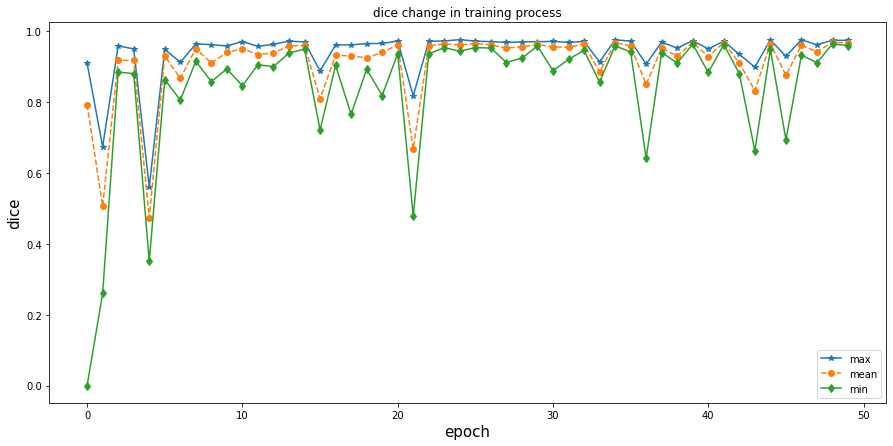

In [7]:
plt.figure(figsize=(15,7))
plt.plot(np.max(Dict_DL[0], axis=1), '-*', label='max')
plt.plot(np.mean(Dict_DL[0], axis=1), '--o', label='mean')
plt.plot(np.min(Dict_DL[0], axis=1), '-d', label='min')
plt.title('dice change in training process')
plt.xlabel('epoch', {'size':15})
plt.ylabel('dice', {'size':15})
plt.legend()
plt.show()

Text(0, 0.5, 'loss')

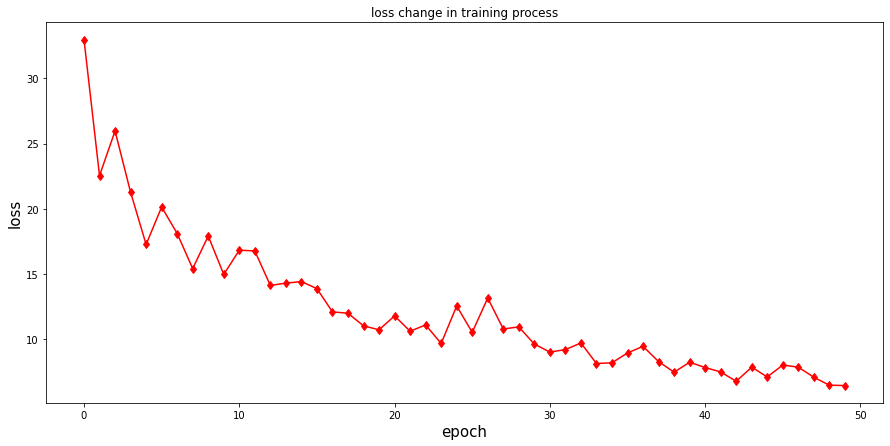

In [8]:
plt.figure(figsize=(15,7))
plt.title('loss change in training process')
plt.plot(Dict_DL[1], 'rd-')
plt.xlabel('epoch', {'size':15})
plt.ylabel('loss', {'size':15})

#### plot the testing results

In [ ]:
list(dice_dict.values())

[0.9437307879496948,
 0.9326509143396567,
 0.9325968150484968,
 0.9405126394458315,
 0.9245356325920436]

In [ ]:
y2

[0.9594531603821137,
 0.9595811966158684,
 0.9437467516837585,
 0.947463483081991,
 0.8613989191649729,
 0.9599963992431486]

In [14]:
li_di = list(dice_dict.values())
y1 = li_di[:13]
y2 = li_di[13:38]
y3 = li_di[38:]
y_temp = {}
id_in = 1
for i in y1:
    y_temp['kind'] = 'Adult Mice'
    y_temp['Dice Coefficient'] = i
    if id_in:
        y_result = pd.Series(y_temp)
        id_in = 0
    else:
        y_result = pd.concat((y_result, pd.Series(y_temp)),axis=1)

for i in y2:
    y_temp['kind'] = 'Baby Mice'
    y_temp['Dice Coefficient'] = i
    y_result = pd.concat((y_result, pd.Series(y_temp)),axis=1)
for i in y3:
    y_temp['kind'] = 'Rats'
    y_temp['Dice Coefficient'] = i
    y_result = pd.concat((y_result, pd.Series(y_temp)),axis=1)


In [15]:
y_result = y_result.T

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


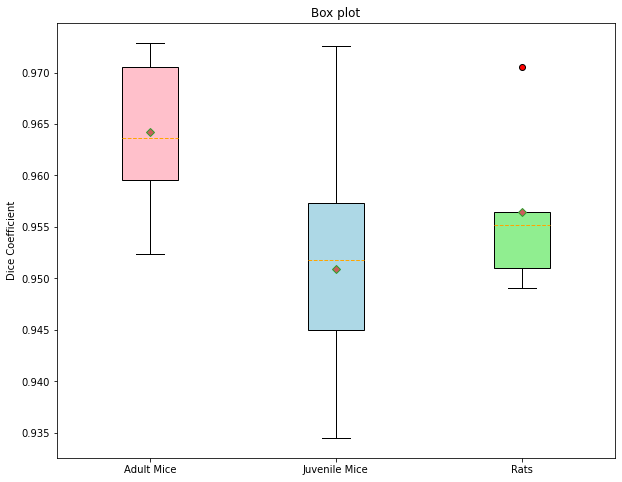

In [16]:
all_data = [y1, y2, y3]
 
fig = plt.figure(figsize=(10,8))
 
# bplot = plt.boxplot(all_data,
#             notch=False,  # notch shape
#             vert=True,   # vertical box aligmnent
#             patch_artist=True)   # fill with color

bplot = plt.boxplot(all_data, 
            patch_artist=True, 
            showmeans=True, 
            boxprops = {'facecolor':'#9999ff'}, 
            flierprops = {'marker':'o','markerfacecolor':'red','color':'black'}, 
            meanprops = {'marker':'D','markerfacecolor':'indianred'}, 
            medianprops = {'linestyle':'--','color':'orange'}) 
 
colors = ['pink', 'lightblue', 'lightgreen']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
 
plt.xticks([y+1 for y in range(len(all_data))], ['Adult Mice', 'Juvenile Mice', 'Rats'])
plt.ylabel('Dice Coefficient')
t = plt.title('Box plot')
plt.show()


In [ ]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")

KeyboardInterrupt: 

In [ ]:
tips

Text(0, 0.5, 'dice')

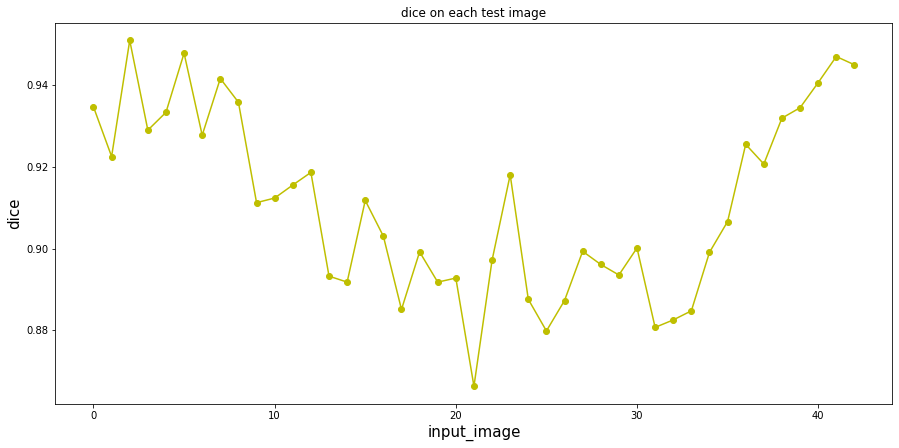

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(list(dice_dict.values()), 'yo-')
plt.title('dice on each test image')
plt.xlabel('input_image', {'size':15})
plt.ylabel('dice', {'size':15})

In [ ]:
file_msk = sorted([v for v in os.listdir(args_test.out_dir)  if '.nii' in v])
file_test = sorted(os.listdir(args_test.test_t1w))
file_test_msk = sorted(os.listdir(args_test.test_msk))

plt.figure(figsize=(25, 40))
for index in np.arange(len(file_msk)):
    plt.subplot(len(file_msk), 2, index*2+1)
    ax1 = plt.gca()
    msk = nib.load(os.path.join(args_test.out_dir, file_msk[index]))
    nii = nib.load(os.path.join(args_test.test_t1w, file_test[index]))
    nil.plotting.plot_roi(msk, nii, alpha=0.5, axes=ax1, dim=2)
    if index == 0:
        plt.title("Model result")
    
    plt.subplot(len(file_msk), 2, index*2+2)
    ax2 = plt.gca()
    msk_test = nib.load(os.path.join(args_test.test_msk, file_test_msk[index]))
    nil.plotting.plot_roi(msk_test, nii, alpha=0.5, axes=ax2)
    if index == 0:
        plt.title("Test result")

/konglab/apps/anaconda3/lib/python3.8/site-packages/nilearn/plotting/img_plotting.py:498: RuntimeWarning: overflow encountered in short_scalars
  ptp = .5 * (vmax - vmin)


ValueError: minvalue must be less than or equal to maxvalue

<Figure size 1800x2880 with 88 Axes>